## visit_ratio, frgn_ratio, youth_ratio, market_per_cnt, delivery_per_cnt

In [1]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
rc('font', family='AppleGothic')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [13]:
data=pd.read_csv("../final_dataset.csv")
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
data=data[['year','month','date','emd_nm','em_g','visit_ratio','frgn_ratio','youth_ratio','market_per_cnt','delivery_per_cnt']]

In [15]:
data['year']=data['year'].astype(str)
data['month']=data['month'].astype(str)
data['date']=data['date'].astype(str)
data['base_date']=data['year']+"-"+data['month']+"-"+data['date']
data['base_date']=pd.to_datetime(data['base_date'])

In [16]:
data.drop(['year','month','date'],axis=1,inplace=True)

In [17]:
data

,emd_nm,em_g,visit_ratio,frgn_ratio,youth_ratio,market_per_cnt,delivery_per_cnt,base_date
0,건입동,1708250,49.642958,0.038427,0.200261,0.326135,0.002769,2018-01-01
1,남원읍,1239600,41.452047,0.025900,0.177984,0.294750,0.015813,2018-01-01
2,노형동,9357900,25.674217,0.039271,0.195624,0.392180,0.009834,2018-01-01
3,대륜동,1717700,42.502310,0.014440,0.208504,0.422736,0.009843,2018-01-01
4,대정읍,1264950,28.652628,0.053508,0.168114,0.437912,0.017233,2018-01-01
...,...,...,...,...,...,...,...,...
50881,한경면,973850,35.350145,0.042559,0.171578,0.328927,0.031104,2021-06-30
50882,한림읍,3298100,35.614095,0.048140,0.197206,0.219777,0.084428,2021-06-30
50883,화북동,3749600,27.871984,0.010642,0.167519,0.291460,0.114103,2021-06-30
50884,효돈동,1011050,31.896263,0.014730,0.165783,0.450980,0.021008,2021-06-30


In [18]:
data_train=data.loc[data['base_date']<='2021-05-30']
data_test=data.loc[(data['base_date']>='2021-06-01')&(data['base_date']<='2021-06-18')]

In [47]:
data_train.set_index(['base_date'],inplace=True)

# visit ratio 예측


## 예시로 한 동만 예측

In [49]:
data_visit=data_train.loc[data_train['emd_nm']=='구좌읍',['visit_ratio']]

In [50]:
#data_visit_log=np.log1p(data_visit['visit_ratio'])

In [51]:
data_visit.to_dict('series')

{'visit_ratio': base_date
 2019-11-05    32.822102
 2019-11-06    32.893083
 2019-11-07    34.102484
 2019-11-08    35.010616
 2019-11-09    40.154659
                 ...    
 2021-05-26    36.494102
 2021-05-27    36.778700
 2021-05-28    38.286744
 2021-05-29    44.811592
 2021-05-30    44.702209
 Name: visit_ratio, Length: 569, dtype: float64}

In [52]:
data_visit.shape

(569, 1)

<AxesSubplot:xlabel='base_date'>

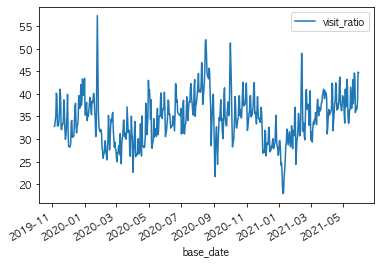

In [53]:
data_visit.plot()

<Figure size 432x288 with 0 Axes>

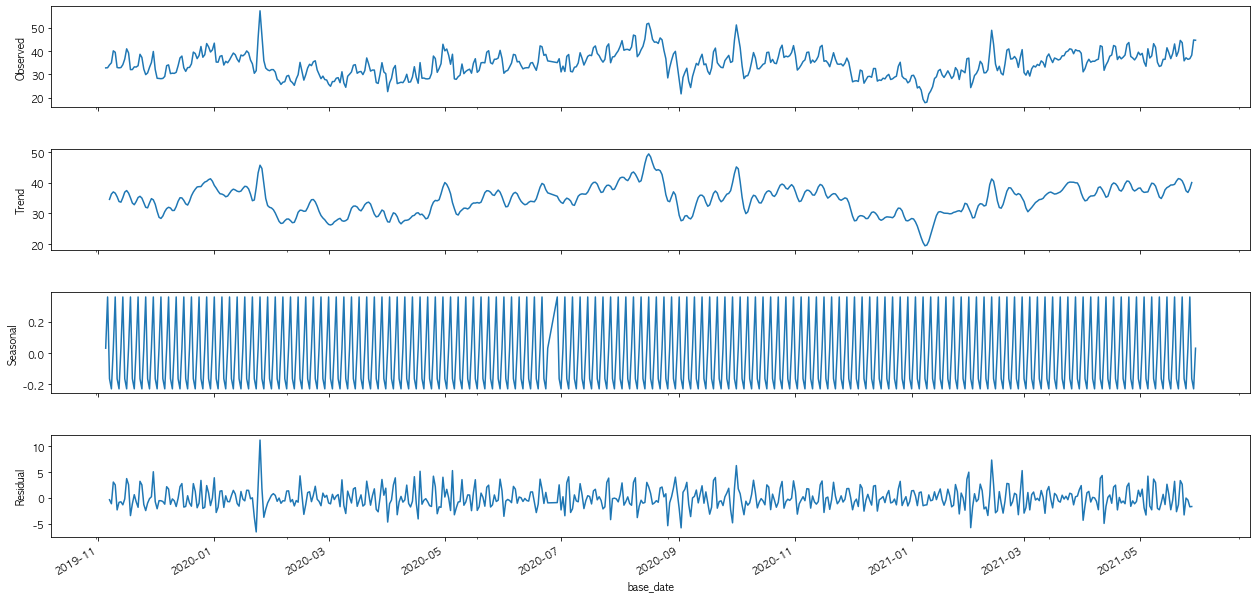

In [54]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_visit, model='additive', freq=4)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)

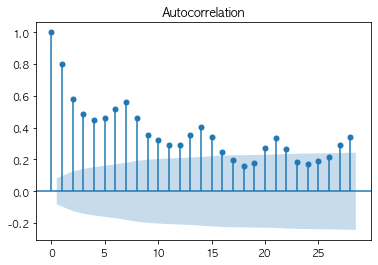

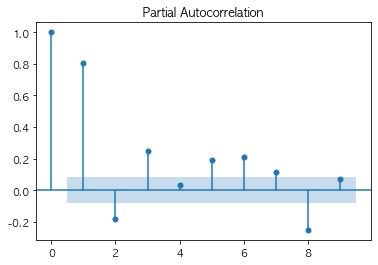

<Figure size 1440x288 with 0 Axes>

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_visit)
plot_pacf(data_visit, lags=9)
plt.figure(figsize=(20,4))
plt.show()

In [57]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_visit)
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s: %3f' % (key, value))

ValueError: too many values to unpack (expected 2)

In [59]:
model_arima= auto_arima(data_visit,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)

auto=model_arima.fit(data_visit)

Fit ARIMA(0,0,0)x(0,0,0,1) [intercept=True]; AIC=3522.482, BIC=3531.170, Time=0.014 seconds
Fit ARIMA(0,0,1)x(0,0,0,1) [intercept=True]; AIC=3075.437, BIC=3088.468, Time=0.038 seconds
Fit ARIMA(0,0,2)x(0,0,0,1) [intercept=True]; AIC=2976.250, BIC=2993.626, Time=0.060 seconds
Fit ARIMA(0,0,3)x(0,0,0,1) [intercept=True]; AIC=2940.404, BIC=2962.123, Time=0.066 seconds
Fit ARIMA(0,0,4)x(0,0,0,1) [intercept=True]; AIC=2920.368, BIC=2946.431, Time=0.127 seconds
Fit ARIMA(0,0,5)x(0,0,0,1) [intercept=True]; AIC=2905.014, BIC=2935.421, Time=0.139 seconds
Fit ARIMA(1,0,0)x(0,0,0,1) [intercept=True]; AIC=2934.632, BIC=2947.664, Time=0.027 seconds
Fit ARIMA(1,0,1)x(0,0,0,1) [intercept=True]; AIC=2901.671, BIC=2919.047, Time=0.068 seconds
Fit ARIMA(1,0,2)x(0,0,0,1) [intercept=True]; AIC=2872.615, BIC=2894.334, Time=0.127 seconds
Fit ARIMA(1,0,3)x(0,0,0,1) [intercept=True]; AIC=2865.723, BIC=2891.787, Time=0.222 seconds
Fit ARIMA(1,0,4)x(0,0,0,1) [intercept=True]; AIC=2865.558, BIC=2895.965, Time=0.

In [60]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1426.408
Date:                Sun, 12 Sep 2021   AIC                           2864.816
Time:                        20:49:30   BIC                           2890.879
Sample:                             0   HQIC                          2874.986
                                - 569                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8868      0.460      1.926      0.054      -0.016       1.789
ar.L1          1.2476      0.085     14.751      0.000       1.082       1.413
ar.L2         -0.2731      0.076     -3.570      0.000      -0.423      -0.123
ma.L1         -0.2949      0.081     -3.620      0.000      -0.455      -0.135
ma.L2         -0.4451      0.042    -10.553      0.000      -0.528      -0.362
sigma2         8.7872      0.415     21.193      0.000       7.975       9.600
===================================================================================
Ljung-Box (Q):                      269.55   Jarque-Bera (JB):                49.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.03
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

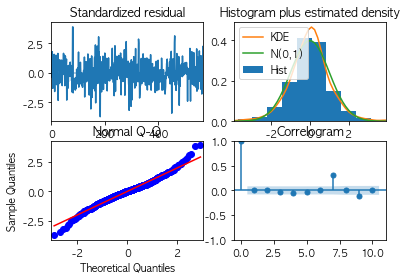

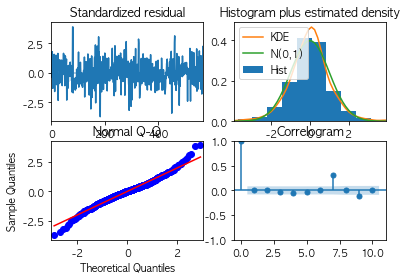

In [61]:
model_arima.plot_diagnostics()

In [62]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1426.408
Date:                Sun, 12 Sep 2021   AIC                           2864.816
Time:                        20:57:20   BIC                           2890.879
Sample:                             0   HQIC                          2874.986
                                - 569                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8868      0.460      1.926      0.054      -0.016       1.789
ar.L1          1.2476      0.085     14.751      0.000       1.082       1.413
ar.L2         -0.2731      0.076     -3.570      0.000      -0.423      -0.123
ma.L1         -0.2949      0.081     -3.620      0.000      -0.455      -0.135
ma.L2         -0.4451      0.042    -10.553      0.000      -0.528      -0.362
sigma2         8.7872      0.415     21.193      0.000       7.975       9.600
===================================================================================
Ljung-Box (Q):                      269.55   Jarque-Bera (JB):                49.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.03
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

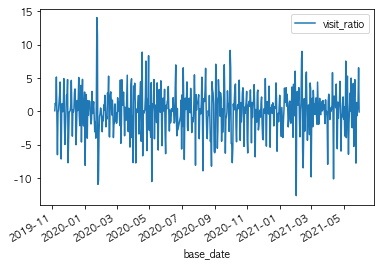

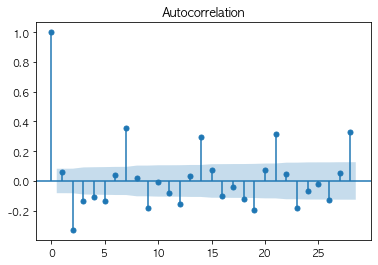

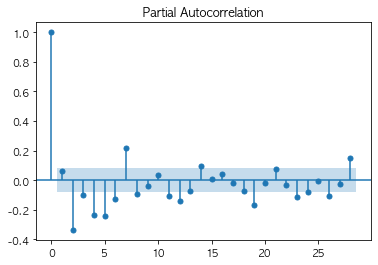

In [63]:
diff_1=data_visit.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [71]:
model=ARIMA(data_pop,order=(2,0,2))
                               
#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit=model.fit(trand='nc',full_output=True,disp=1)
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50688D+00    |proj g|=  1.00195D-03

At iterate    1    f=  2.50688D+00    |proj g|=  6.13154D-04

At iterate    2    f=  2.50687D+00    |proj g|=  4.34852D-04

At iterate    3    f=  2.50687D+00    |proj g|=  3.89200D-04

At iterate    4    f=  2.50687D+00    |proj g|=  1.44507D-04

At iterate    5    f=  2.50687D+00    |proj g|=  7.99805D-05

At iterate    6    f=  2.50687D+00    |proj g|=  2.06546D-04

At iterate    7    f=  2.50687D+00    |proj g|=  3.48566D-04

At iterate    8    f=  2.50687D+00    |proj g|=  3.19389D-04

At iterate    9    f=  2.50687D+00    |proj g|=  9.44134D-05

At iterate   10    f=  2.50687D+00    |proj g|=  1.06759D-04

At iterate   11    f=  2.50687D+00    |proj g|=  1.44817D-04

At iterate   12    f=  2.50687D+00    |proj g|=  1.32516D-04

At iterate   13    f=  2.5

 This problem is unconstrained.


In [72]:
fore=model_fit.forecast(steps=18)
print(fore[0])
# 예측값,stderr,upperbound,lowerbound

[41.26354652 39.90142717 39.39796743 39.1416941  38.95942674 38.80201523
 38.6554118  38.51550673 38.38100723 38.25142231 38.12649229 38.0060273
 37.88986131 37.77783911 37.66981236 37.56563841 37.4651798  37.36830403]


In [73]:
dates=pd.date_range('2021-06-01',periods=len(fore[0]))

In [74]:
dates

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18'],
              dtype='datetime64[ns]', freq='D')

In [79]:
forecast=pd.DataFrame(fore[0],columns=['data_visit_pred'],index=dates)


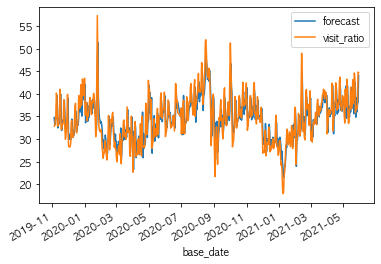

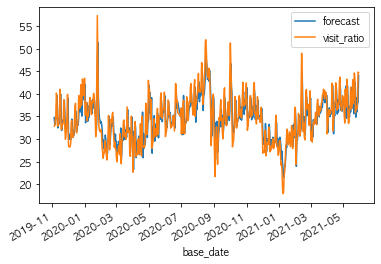

In [77]:
model_fit.plot_predict()

In [78]:
sub_test=data_test.loc[(data_test['emd_nm']=='구좌읍') &( data_test['base_date']>='2021-06-01')]
sub_test

,emd_nm,em_g,visit_ratio,frgn_ratio,youth_ratio,market_per_cnt,delivery_per_cnt,base_date
49639,구좌읍,1179950,33.720109,0.024223,0.203541,0.261893,0.045568,2021-06-01
49681,구좌읍,1181050,33.854148,0.022950,0.202531,0.241345,0.047478,2021-06-02
49723,구좌읍,1009750,32.592822,0.024836,0.203732,0.275706,0.065537,2021-06-03
49765,구좌읍,1148400,36.024315,0.023742,0.203447,0.214479,0.054565,2021-06-04
49807,구좌읍,1424100,42.409012,0.024130,0.208088,0.223240,0.046287,2021-06-05
49849,구좌읍,1359850,42.880084,0.024130,0.212553,0.215594,0.071167,2021-06-06
49891,구좌읍,1264300,37.016253,0.024399,0.209642,0.235839,0.049564,2021-06-07
49933,구좌읍,1143050,35.744873,0.023918,0.206008,0.200394,0.039389,2021-06-08
49975,구좌읍,1137550,35.279901,0.024712,0.204461,0.234472,0.075569,2021-06-09
50017,구좌읍,1116000,34.675915,0.024739,0.202362,0.240270,0.038921,2021-06-10


In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
##0.0058254274059394585 0.07510307669011312

print(mean_squared_error(sub_test['visit_ratio'],forecast['data_visit_pred']))
print(mean_absolute_error(sub_test['visit_ratio'],forecast['data_visit_pred']))

15.159146654642667
3.325713398295246


## 전체 읍면동 예측

In [82]:
test_df=pd.DataFrame(columns=['emd_nm'])

In [90]:
for region in data['emd_nm'].unique():
    data_visit = data_train.loc[data_train['emd_nm']==region,['visit_ratio']]
    data_visit = data_visit.astype('float32')
     #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    
    model=ARIMA(data_visit,order=(2,1,2))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['visit_ratio_pred'],index=dates)
    forecast['emd_nm']=region
    test_df=pd.concat([test_df,forecast])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95877D+00    |proj g|=  6.28875D-03

At iterate    1    f=  1.95876D+00    |proj g|=  1.72848D-03

At iterate    2    f=  1.95876D+00    |proj g|=  1.23341D-03

At iterate    3    f=  1.95876D+00    |proj g|=  1.81519D-03

At iterate    4    f=  1.95875D+00    |proj g|=  4.28531D-03

At iterate    5    f=  1.95874D+00    |proj g|=  5.76548D-03

At iterate    6    f=  1.95873D+00    |proj g|=  5.43781D-03

At iterate    7    f=  1.95869D+00    |proj g|=  8.06253D-03

At iterate    8    f=  1.95868D+00    |proj g|=  1.55989D-03

At iterate    9    f=  1.95868D+00    |proj g|=  6.60227D-04

At iterate   10    f=  1.95868D+00    |proj g|=  5.66169D-04

At iterate   11    f=  1.95868D+00    |proj g|=  4.33031D-04

At iterate   12    f=  1.95866D+00    |proj g|=  1.19802D-03

At iterate   13    f=  1.9


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47984D+00    |proj g|=  4.61320D-04

At iterate    1    f=  2.47984D+00    |proj g|=  3.98614D-04

At iterate    2    f=  2.47984D+00    |proj g|=  4.81304D-04

At iterate    3    f=  2.47984D+00    |proj g|=  4.31966D-04

At iterate    4    f=  2.47984D+00    |proj g|=  4.72644D-04

At iterate    5    f=  2.47984D+00    |proj g|=  5.02709D-04

At iterate    6    f=  2.47984D+00    |proj g|=  1.10507D-03

At iterate    7    f=  2.47984D+00    |proj g|=  1.61027D-04

At iterate    8    f=  2.47984D+00    |proj g|=  1.47926D-04

At iterate    9    f=  2.47984D+00    |proj g|=  8.07798D-05

At iterate   10    f=  2.47984D+00    |proj g|=  9.09495D-05

At iterate   11    f=  2.47984D+00    |proj g|=  2.23821D-04

At iterate   12    f=  2.47984D+00    |proj g|=  3.96438D-04

At iterate   13    f=  2.47984D+00    |proj g|=  4.50040D-04

At iterate   14    f=  2.47984D+00    |proj g|=  2.91900D-04

At iterate   15 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79516D+00    |proj g|=  2.31100D-03

At iterate    1    f=  1.79516D+00    |proj g|=  5.17475D-04

At iterate    2    f=  1.79516D+00    |proj g|=  3.94151D-04

At iterate    3    f=  1.79516D+00    |proj g|=  4.11249D-04

At iterate    4    f=  1.79515D+00    |proj g|=  6.31828D-04

At iterate    5    f=  1.79514D+00    |proj g|=  1.15044D-03

At iterate    6    f=  1.79512D+00    |proj g|=  1.55260D-03

At iterate    7    f=  1.79508D+00    |proj g|=  1.01752D-03

At iterate    8    f=  1.79506D+00    |proj g|=  1.95841D-03

At iterate    9    f=  1.79505D+00    |proj g|=  2.35412D-04

At iterate   10    f=  1.79505D+00    |proj g|=  2.04903D-04

At iterate   11    f=  1.79505D+00    |proj g|=  1.06981D-04

At iterate   12    f=  1.79505D+00    |proj g|=  3.19300D-05

At iterate   13    f=  1.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98800D+00    |proj g|=  2.09988D-03

At iterate    1    f=  1.98799D+00    |proj g|=  9.22462D-04

At iterate    2    f=  1.98799D+00    |proj g|=  8.86957D-04

At iterate    3    f=  1.98798D+00    |proj g|=  4.73375D-03

At iterate    4    f=  1.98797D+00    |proj g|=  6.81792D-03

At iterate    5    f=  1.98794D+00    |proj g|=  7.39004D-03

At iterate    6    f=  1.98794D+00    |proj g|=  1.34463D-02

At iterate    7    f=  1.98790D+00    |proj g|=  4.01112D-03

At iterate    8    f=  1.98790D+00    |proj g|=  9.78284D-04

At iterate    9    f=  1.98790D+00    |proj g|=  3.99236D-05

At iterate   10    f=  1.98790D+00    |proj g|=  2.57350D-05

At iterate   11    f=  1.98790D+00    |proj g|=  7.46070D-06

At iterate   12    f=  1.98790D+00    |proj g|=  4.55191D-06

At iterate   13    f=  1.9

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91356D+00    |proj g|=  2.73914D-04

At iterate    1    f=  1.91356D+00    |proj g|=  1.40310D-04

At iterate    2    f=  1.91356D+00    |proj g|=  1.34559D-04

At iterate    3    f=  1.91356D+00    |proj g|=  3.01292D-04

At iterate    4    f=  1.91356D+00    |proj g|=  2.03459D-04

At iterate    5    f=  1.91356D+00    |proj g|=  8.87512D-05

At iterate    6    f=  1.91356D+00    |proj g|=  1.41687D-04

At iterate    7    f=  1.91356D+00    |proj g|=  2.52265D-04

At iterate    8    f=  1.91356D+00    |proj g|=  3.33800D-04

At iterate    9    f=  1.91356D+00    |proj g|=  5.04508D-04

At iterate   10    f=  1.91356D+00    |proj g|=  5.53957D-04

At iterate   11    f=  1.91356D+00    |proj g|=  7.07545D-04

At iterate   12    f=  1.91356D+00    |proj g|=  1.35802D-04

At iterate   13    f=  1.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28526D+00    |proj g|=  1.35087D-03

At iterate    1    f=  2.28526D+00    |proj g|=  2.58140D-03

At iterate    2    f=  2.28525D+00    |proj g|=  2.46305D-03

At iterate    3    f=  2.28518D+00    |proj g|=  1.75921D-03

At iterate    4    f=  2.28516D+00    |proj g|=  1.62816D-03

At iterate    5    f=  2.28515D+00    |proj g|=  1.15721D-03

At iterate    6    f=  2.28514D+00    |proj g|=  5.82112D-04

At iterate    7    f=  2.28513D+00    |proj g|=  6.10578D-04

At iterate    8    f=  2.28513D+00    |proj g|=  5.34017D-04

At iterate    9    f=  2.28512D+00    |proj g|=  2.52287D-04

At iterate   10    f=  2.28512D+00    |proj g|=  1.32339D-05

At iterate   11    f=  2.28512D+00    |proj g|=  3.99680D-06

At iterate   12    f=  2.28512D+00    |proj g|=  6.21725D-07

At iterate   13    f=  2.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85203D+00    |proj g|=  1.05072D-03

At iterate    1    f=  1.85203D+00    |proj g|=  3.09552D-04

At iterate    2    f=  1.85203D+00    |proj g|=  2.79932D-04

At iterate    3    f=  1.85203D+00    |proj g|=  1.31961D-04

At iterate    4    f=  1.85203D+00    |proj g|=  1.82254D-04

At iterate    5    f=  1.85203D+00    |proj g|=  2.89768D-04

At iterate    6    f=  1.85203D+00    |proj g|=  3.10507D-04

At iterate    7    f=  1.85203D+00    |proj g|=  9.52793D-05

At iterate    8    f=  1.85203D+00    |proj g|=  1.60982D-05

At iterate    9    f=  1.85203D+00    |proj g|=  6.50591D-06

At iterate   10    f=  1.85203D+00    |proj g|=  7.86038D-06

At iterate   11    f=  1.85203D+00    |proj g|=  1.91624D-05

At iterate   12    f=  1.85203D+00    |proj g|=  3.16858D-05

At iterate   13    f=  1.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70352D+00    |proj g|=  1.20890D-03

At iterate    1    f=  2.70352D+00    |proj g|=  1.33968D-03

At iterate    2    f=  2.70352D+00    |proj g|=  3.32978D-04

At iterate    3    f=  2.70352D+00    |proj g|=  2.89813D-04

At iterate    4    f=  2.70351D+00    |proj g|=  2.14273D-04

At iterate    5    f=  2.70351D+00    |proj g|=  1.95399D-04

At iterate    6    f=  2.70351D+00    |proj g|=  2.15250D-04

At iterate    7    f=  2.70351D+00    |proj g|=  1.87850D-04

At iterate    8    f=  2.70351D+00    |proj g|=  6.35492D-05

At iterate    9    f=  2.70351D+00    |proj g|=  2.64677D-05

At iterate   10    f=  2.70351D+00    |proj g|=  3.70370D-05

At iterate   11    f=  2.70351D+00    |proj g|=  7.06102D-05

At iterate   12    f=  2.70351D+00    |proj g|=  8.89511D-05

At iterate   13    f=  2.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99535D+00    |proj g|=  4.54174D-03

At iterate    1    f=  1.99535D+00    |proj g|=  4.95937D-04

At iterate    2    f=  1.99535D+00    |proj g|=  3.66063D-04

At iterate    3    f=  1.99535D+00    |proj g|=  4.32632D-04

At iterate    4    f=  1.99535D+00    |proj g|=  5.93103D-04

At iterate    5    f=  1.99535D+00    |proj g|=  2.68541D-04

At iterate    6    f=  1.99535D+00    |proj g|=  1.29408D-04

At iterate    7    f=  1.99535D+00    |proj g|=  4.54969D-05

At iterate    8    f=  1.99535D+00    |proj g|=  2.14051D-05

At iterate    9    f=  1.99535D+00    |proj g|=  4.16778D-05

At iterate   10    f=  1.99535D+00    |proj g|=  8.10907D-05

At iterate   11    f=  1.99535D+00    |proj g|=  1.11622D-04

At iterate   12    f=  1.99535D+00    |proj g|=  9.50795D-05

At iterate   13    f=  1.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85119D+00    |proj g|=  2.20985D-03

At iterate    1    f=  1.85119D+00    |proj g|=  1.10705D-03

At iterate    2    f=  1.85119D+00    |proj g|=  3.64864D-04

At iterate    3    f=  1.85119D+00    |proj g|=  2.76579D-04

At iterate    4    f=  1.85119D+00    |proj g|=  2.83884D-04

At iterate    5    f=  1.85119D+00    |proj g|=  1.06826D-04

At iterate    6    f=  1.85119D+00    |proj g|=  1.66267D-04

At iterate    7    f=  1.85119D+00    |proj g|=  3.75744D-04

At iterate    8    f=  1.85119D+00    |proj g|=  6.43441D-04

At iterate    9    f=  1.85119D+00    |proj g|=  9.78195D-04

At iterate   10    f=  1.85118D+00    |proj g|=  1.44471D-03

At iterate   11    f=  1.85118D+00    |proj g|=  1.78795D-03

At iterate   12    f=  1.85118D+00    |proj g|=  1.19622D-03

At iterate   13    f=  1.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28148D+00    |proj g|=  9.00835D-03

At iterate    1    f=  2.28148D+00    |proj g|=  5.09734D-03

At iterate    2    f=  2.28148D+00    |proj g|=  9.79261D-04

At iterate    3    f=  2.28147D+00    |proj g|=  1.76428D-03

At iterate    4    f=  2.28147D+00    |proj g|=  3.98255D-03

At iterate    5    f=  2.28147D+00    |proj g|=  4.74025D-03

At iterate    6    f=  2.28146D+00    |proj g|=  4.43561D-03

At iterate    7    f=  2.28144D+00    |proj g|=  4.34630D-03

At iterate    8    f=  2.28144D+00    |proj g|=  9.81881D-04

At iterate    9    f=  2.28144D+00    |proj g|=  3.96128D-04

At iterate   10    f=  2.28144D+00    |proj g|=  6.79456D-05

At iterate   11    f=  2.28144D+00    |proj g|=  3.06422D-05

At iterate   12    f=  2.28144D+00    |proj g|=  7.05658D-05

At iterate   13    f=  2.2

 This problem is unconstrained.



At iterate   16    f=  2.28144D+00    |proj g|=  4.09273D-04

At iterate   17    f=  2.28144D+00    |proj g|=  5.53069D-04

At iterate   18    f=  2.28144D+00    |proj g|=  3.69305D-04

At iterate   19    f=  2.28144D+00    |proj g|=  1.12621D-04

At iterate   20    f=  2.28144D+00    |proj g|=  6.97220D-06

At iterate   21    f=  2.28144D+00    |proj g|=  1.82077D-06

At iterate   22    f=  2.28144D+00    |proj g|=  1.99840D-06

At iterate   23    f=  2.28144D+00    |proj g|=  3.10862D-07

At iterate   24    f=  2.28144D+00    |proj g|=  1.33227D-07

At iterate   25    f=  2.28144D+00    |proj g|=  4.44089D-08

At iterate   26    f=  2.28144D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35435D+00    |proj g|=  3.94773D-03

At iterate    1    f=  2.35434D+00    |proj g|=  1.56088D-03

At iterate    2    f=  2.35433D+00    |proj g|=  7.48157D-04

At iterate    3    f=  2.35433D+00    |proj g|=  1.59428D-04

At iterate    4    f=  2.35433D+00    |proj g|=  1.88427D-04

At iterate    5    f=  2.35433D+00    |proj g|=  3.15925D-04

At iterate    6    f=  2.35433D+00    |proj g|=  4.20242D-04

At iterate    7    f=  2.35433D+00    |proj g|=  3.64464D-04

At iterate    8    f=  2.35433D+00    |proj g|=  1.39222D-04

At iterate    9    f=  2.35433D+00    |proj g|=  3.98348D-05

At iterate   10    f=  2.35433D+00    |proj g|=  2.94431D-05

At iterate   11    f=  2.35433D+00    |proj g|=  4.17000D-05

At iterate   12    f=  2.35433D+00    |proj g|=  5.03597D-05

At iterate   13    f=  2.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54818D+00    |proj g|=  1.20089D-02

At iterate    1    f=  2.54817D+00    |proj g|=  5.45626D-03

At iterate    2    f=  2.54817D+00    |proj g|=  2.60720D-03

At iterate    3    f=  2.54816D+00    |proj g|=  2.46794D-03

At iterate    4    f=  2.54815D+00    |proj g|=  6.56741D-03

At iterate    5    f=  2.54814D+00    |proj g|=  8.92437D-03

At iterate    6    f=  2.54812D+00    |proj g|=  7.49352D-03

At iterate    7    f=  2.54808D+00    |proj g|=  5.23457D-03

At iterate    8    f=  2.54800D+00    |proj g|=  3.93086D-03

At iterate    9    f=  2.54791D+00    |proj g|=  3.71645D-03

At iterate   10    f=  2.54787D+00    |proj g|=  1.75437D-03

At iterate   11    f=  2.54786D+00    |proj g|=  9.93072D-04

At iterate   12    f=  2.54786D+00    |proj g|=  3.95550D-04

At iterate   13    f=  2.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40513D+00    |proj g|=  2.27831D-03

At iterate    1    f=  2.40512D+00    |proj g|=  3.77254D-04

At iterate    2    f=  2.40512D+00    |proj g|=  3.22720D-04

At iterate    3    f=  2.40512D+00    |proj g|=  3.03846D-04

At iterate    4    f=  2.40512D+00    |proj g|=  3.13438D-04

At iterate    5    f=  2.40512D+00    |proj g|=  4.77707D-04

At iterate    6    f=  2.40512D+00    |proj g|=  3.76366D-04

At iterate    7    f=  2.40512D+00    |proj g|=  1.18972D-04

At iterate    8    f=  2.40512D+00    |proj g|=  4.33875D-05

At iterate    9    f=  2.40512D+00    |proj g|=  6.04850D-05

At iterate   10    f=  2.40512D+00    |proj g|=  7.14984D-05

At iterate   11    f=  2.40512D+00    |proj g|=  7.94032D-05

At iterate   12    f=  2.40512D+00    |proj g|=  2.73559D-05

At iterate   13    f=  2.4

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16109D+00    |proj g|=  2.71942D-03

At iterate    1    f=  2.16109D+00    |proj g|=  1.01008D-03

At iterate    2    f=  2.16109D+00    |proj g|=  4.21796D-04

At iterate    3    f=  2.16109D+00    |proj g|=  3.86891D-04

At iterate    4    f=  2.16109D+00    |proj g|=  7.91456D-04

At iterate    5    f=  2.16109D+00    |proj g|=  8.59401D-04

At iterate    6    f=  2.16109D+00    |proj g|=  1.02318D-03

At iterate    7    f=  2.16109D+00    |proj g|=  8.07043D-04

At iterate    8    f=  2.16109D+00    |proj g|=  1.57461D-03

At iterate    9    f=  2.16109D+00    |proj g|=  2.17293D-04

At iterate   10    f=  2.16109D+00    |proj g|=  9.79661D-05

At iterate   11    f=  2.16109D+00    |proj g|=  9.63230D-05

At iterate   12    f=  2.16109D+00    |proj g|=  1.00409D-04

At iterate   13    f=  2.1

 This problem is unconstrained.



At iterate   22    f=  1.76190D+00    |proj g|=  3.77476D-07

At iterate   23    f=  1.76190D+00    |proj g|=  6.43929D-07

At iterate   24    f=  1.76190D+00    |proj g|=  4.88498D-07

At iterate   25    f=  1.76190D+00    |proj g|=  2.22045D-08

At iterate   26    f=  1.76190D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   0.000D+00   1.762D+00
  F =   1.7618999832661359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08624D+00    |proj g|=  9.02167D-04

At iterate    1    f=  2.08624D+00    |proj g|=  3.19567D-04

At iterate    2    f=  2.08624D+00    |proj g|=  2.15472D-04

At iterate    3    f=  2.08624D+00    |proj g|=  2.52509D-04

At iterate    4    f=  2.08624D+00    |proj g|=  4.21174D-04

At iterate    5    f=  2.08624D+00    |proj g|=  5.86065D-04

At iterate    6    f=  2.08624D+00    |proj g|=  3.41149D-04

At iterate    7    f=  2.08624D+00    |proj g|=  3.56337D-04

At iterate    8    f=  2.08624D+00    |proj g|=  4.78284D-05

At iterate    9    f=  2.08624D+00    |proj g|=  1.84741D-05

At iterate   10    f=  2.08624D+00    |proj g|=  1.37668D-05

At iterate   11    f=  2.08624D+00    |proj g|=  1.81632D-05

At iterate   12    f=  2.08624D+00    |proj g|=  2.43361D-05

At iterate   13    f=  2.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06746D+00    |proj g|=  2.00782D-03

At iterate    1    f=  2.06746D+00    |proj g|=  2.01172D-03

At iterate    2    f=  2.06746D+00    |proj g|=  3.11662D-04

At iterate    3    f=  2.06746D+00    |proj g|=  3.02203D-04

At iterate    4    f=  2.06745D+00    |proj g|=  7.19380D-04

At iterate    5    f=  2.06745D+00    |proj g|=  4.32543D-04

At iterate    6    f=  2.06745D+00    |proj g|=  2.07701D-04

At iterate    7    f=  2.06745D+00    |proj g|=  3.93641D-04

At iterate    8    f=  2.06745D+00    |proj g|=  6.44151D-04

At iterate    9    f=  2.06745D+00    |proj g|=  6.68665D-04

At iterate   10    f=  2.06745D+00    |proj g|=  9.43023D-04

At iterate   11    f=  2.06745D+00    |proj g|=  1.16396D-04

At iterate   12    f=  2.06745D+00    |proj g|=  1.11910D-05

At iterate   13    f=  2.0

 This problem is unconstrained.



At iterate   18    f=  1.75946D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     29      1     0     0   6.661D-08   1.759D+00
  F =   1.7594620592811079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03160D+00    |proj g|=  7.41851D-04

At iterate    1    f=  2.03160D+00    |proj g|=  1.26952D-03

At iterate    2    f=  2.03160D+00    |proj g|=  5.49560D-04

At iter

 This problem is unconstrained.



At iterate   21    f=  2.03150D+00    |proj g|=  6.21725D-07

At iterate   22    f=  2.03150D+00    |proj g|=  4.44089D-08

At iterate   23    f=  2.03150D+00    |proj g|=  8.88178D-08

At iterate   24    f=  2.03150D+00    |proj g|=  2.22045D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   2.220D-07   2.031D+00
  F =   2.0314955040953691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   18    f=  2.17562D+00    |proj g|=  2.93987D-05

At iterate   19    f=  2.17562D+00    |proj g|=  1.48770D-05

At iterate   20    f=  2.17562D+00    |proj g|=  6.61693D-06

At iterate   21    f=  2.17562D+00    |proj g|=  5.77316D-07

At iterate   22    f=  2.17562D+00    |proj g|=  1.77636D-07

At iterate   23    f=  2.17562D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   0.000D+00   2.176D+00
  F =   2.1756225378052987     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81521D+00    |proj g|=  1.02713D-03

At iterate    1    f=  1.81521D+00    |proj g|=  3.82627D-04

At iterate    2    f=  1.81521D+00    |proj g|=  3.51408D-04

At iterate    3    f=  1.81521D+00    |proj g|=  1.93445D-04

At iterate    4    f=  1.81521D+00    |proj g|=  2.63523D-04

At iterate    5    f=  1.81521D+00    |proj g|=  3.28471D-04

At iterate    6    f=  1.81521D+00    |proj g|=  8.69527D-05

At iterate    7    f=  1.81521D+00    |proj g|=  1.30784D-05

At iterate    8    f=  1.81521D+00    |proj g|=  1.50546D-05

At iterate    9    f=  1.81521D+00    |proj g|=  3.05089D-05

At iterate   10    f=  1.81521D+00    |proj g|=  4.90497D-05

At iterate   11    f=  1.81521D+00    |proj g|=  5.99742D-05

At iterate   12    f=  1.81521D+00    |proj g|=  3.67484D-05

At iterate   13    f=  1.8

 This problem is unconstrained.



At iterate   20    f=  2.12683D+00    |proj g|=  1.64313D-06

At iterate   21    f=  2.12683D+00    |proj g|=  2.66454D-07

At iterate   22    f=  2.12683D+00    |proj g|=  4.44089D-08

At iterate   23    f=  2.12683D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   4.441D-08   2.127D+00
  F =   2.1268344777051245     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10544D+00    |proj g|=  1.44182D-03

At iterate    1    f=  2.10544D+00    |proj g|=  1.04849D-03

At iterate    2    f=  2.10544D+00    |proj g|=  2.64588D-04

At iterate    3    f=  2.10544D+00    |proj g|=  2.38520D-04

At iterate    4    f=  2.10544D+00    |proj g|=  5.66613D-04

At iterate    5    f=  2.10544D+00    |proj g|=  4.30234D-04

At iterate    6    f=  2.10544D+00    |proj g|=  1.31495D-04

At iterate    7    f=  2.10544D+00    |proj g|=  1.18217D-04

At iterate    8    f=  2.10544D+00    |proj g|=  1.32294D-04

At iterate    9    f=  2.10544D+00    |proj g|=  7.89591D-05

At iterate   10    f=  2.10544D+00    |proj g|=  4.68070D-05

At iterate   11    f=  2.10544D+00    |proj g|=  1.39444D-05

At iterate   12    f=  2.10544D+00    |proj g|=  8.34888D-06

At iterate   13    f=  2.1

 This problem is unconstrained.



At iterate    1    f=  1.64355D+00    |proj g|=  3.02114D-04

At iterate    2    f=  1.64355D+00    |proj g|=  2.83706D-04

At iterate    3    f=  1.64355D+00    |proj g|=  1.95444D-04

At iterate    4    f=  1.64354D+00    |proj g|=  2.44071D-04

At iterate    5    f=  1.64354D+00    |proj g|=  2.53042D-04

At iterate    6    f=  1.64354D+00    |proj g|=  2.56084D-04

At iterate    7    f=  1.64354D+00    |proj g|=  1.20304D-04

At iterate    8    f=  1.64354D+00    |proj g|=  7.83817D-05

At iterate    9    f=  1.64354D+00    |proj g|=  1.03140D-04

At iterate   10    f=  1.64354D+00    |proj g|=  1.70930D-04

At iterate   11    f=  1.64354D+00    |proj g|=  2.60103D-04

At iterate   12    f=  1.64354D+00    |proj g|=  1.91491D-04

At iterate   13    f=  1.64354D+00    |proj g|=  6.16840D-05

At iterate   14    f=  1.64354D+00    |proj g|=  7.55906D-04

At iterate   15    f=  1.64354D+00    |proj g|=  4.26037D-04

At iterate   16    f=  1.64354D+00    |proj g|=  2.08722D-06

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15020D+00    |proj g|=  1.89346D-03

At iterate    1    f=  2.15020D+00    |proj g|=  6.41887D-04

At iterate    2    f=  2.15020D+00    |proj g|=  5.87086D-04

At iterate    3    f=  2.15019D+00    |proj g|=  1.64531D-03

At iterate    4    f=  2.15019D+00    |proj g|=  2.08500D-03

At iterate    5    f=  2.15018D+00    |proj g|=  2.62137D-03

At iterate    6    f=  2.15018D+00    |proj g|=  1.36140D-03

At iterate    7    f=  2.15017D+00    |proj g|=  6.81633D-04

At iterate    8    f=  2.15017D+00    |proj g|=  2.08100D-04

At iterate    9    f=  2.15017D+00    |proj g|=  3.04645D-05

At iterate   10    f=  2.15017D+00    |proj g|=  2.62457D-05

At iterate   11    f=  2.15017D+00    |proj g|=  3.47278D-05

At iterate   12    f=  2.15017D+00    |proj g|=  6.36824D-05

At iterate   13    f=  2.1

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01386D+00    |proj g|=  1.36753D-03

At iterate    1    f=  2.01386D+00    |proj g|=  1.02651D-03

At iterate    2    f=  2.01386D+00    |proj g|=  6.05205D-04

At iterate    3    f=  2.01385D+00    |proj g|=  1.97726D-03

At iterate    4    f=  2.01385D+00    |proj g|=  1.21929D-03

At iterate    5    f=  2.01385D+00    |proj g|=  7.10099D-04

At iterate    6    f=  2.01385D+00    |proj g|=  1.86029D-03

At iterate    7    f=  2.01385D+00    |proj g|=  2.99147D-03

At iterate    8    f=  2.01384D+00    |proj g|=  3.21125D-03

At iterate    9    f=  2.01384D+00    |proj g|=  5.38751D-03

At iterate   10    f=  2.01383D+00    |proj g|=  2.08464D-03

At iterate   11    f=  2.01383D+00    |proj g|=  9.05676D-04

At iterate   12    f=  2.01383D+00    |proj g|=  1.34324D-03

At iterate   13    f=  2.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09593D+00    |proj g|=  3.23799D-03

At iterate    1    f=  2.09593D+00    |proj g|=  1.69336D-03

At iterate    2    f=  2.09592D+00    |proj g|=  1.57612D-03

At iterate    3    f=  2.09592D+00    |proj g|=  3.41740D-03

At iterate    4    f=  2.09591D+00    |proj g|=  5.03069D-03

At iterate    5    f=  2.09589D+00    |proj g|=  5.19851D-03

At iterate    6    f=  2.09584D+00    |proj g|=  8.16742D-03

At iterate    7    f=  2.09582D+00    |proj g|=  1.15867D-03

At iterate    8    f=  2.09582D+00    |proj g|=  3.93818D-04

At iterate    9    f=  2.09582D+00    |proj g|=  1.70974D-04

At iterate   10    f=  2.09582D+00    |proj g|=  1.34159D-04

At iterate   11    f=  2.09582D+00    |proj g|=  1.59561D-04

At iterate   12    f=  2.09582D+00    |proj g|=  2.25686D-04

At iterate   13    f=  2.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.82714D+00    |proj g|=  1.29270D-03

At iterate    1    f=  1.82714D+00    |proj g|=  2.64855D-04

At iterate    2    f=  1.82714D+00    |proj g|=  2.23066D-04

At iterate    3    f=  1.82714D+00    |proj g|=  1.86229D-04

At iterate    4    f=  1.82714D+00    |proj g|=  2.32703D-04

At iterate    5    f=  1.82714D+00    |proj g|=  2.10165D-04

At iterate    6    f=  1.82714D+00    |proj g|=  2.83773D-05

At iterate    7    f=  1.82714D+00    |proj g|=  3.48832D-05

At iterate    8    f=  1.82714D+00    |proj g|=  7.95586D-05

At iterate    9    f=  1.82714D+00    |proj g|=  1.30251D-04

At iterate   10    f=  1.82714D+00    |proj g|=  1.61493D-04

At iterate   11    f=  1.82714D+00    |proj g|=  9.24816D-05

At iterate   12    f=  1.82714D+00    |proj g|=  6.73461D-05

At iterate   13    f=  1.8

 This problem is unconstrained.



At iterate   18    f=  2.25304D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     27      1     0     0   7.105D-07   2.253D+00
  F =   2.2530379432945749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81134D+00    |proj g|=  6.14815D-03

At iterate    1    f=  1.81134D+00    |proj g|=  3.67955D-03

At iterate    2    f=  1.81133D+00    |proj g|=  1.03242D-03

At iterate    3    f=  1.81133D+00    |proj g|=  1.00984D-03

At iterate    4    f=  1.81133D+00    |proj g|=  3.48275D-03

At iterate    5    f=  1.81133D+00    |proj g|=  5.60885D-03

At iterate    6    f=  1.81132D+00    |proj g|=  6.24840D-03

At iterate    7    f=  1.81131D+00    |proj g|=  8.19091D-03

At iterate    8    f=  1.81129D+00    |proj g|=  6.07157D-03

At iterate    9    f=  1.81127D+00    |proj g|=  1.67062D-03

At iterate   10    f=  1.81127D+00    |proj g|=  1.36307D-03

At iterate   11    f=  1.81127D+00    |proj g|=  1.47251D-03

At iterate   12    f=  1.81127D+00    |proj g|=  9.79883D-04

At iterate   13    f=  1.8

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   16    f=  2.31583D+00    |proj g|=  8.88178D-08

At iterate   17    f=  2.31583D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   4.441D-08   2.316D+00
  F =   2.3158283118814866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51320D+00    |proj g|=  1.32254D-03

At iterate    1    f=  2.51320D+00    |proj g|=  2.33853D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.10619D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   8.882D-08   2.106D+00
  F =   2.1061861834443665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54074D+00    |proj g|=  1.83487D-02

At iterate    1    f=  2.54069D+00    |proj g|=  4.43938D-03

At iterate    2    f=  2.54056D+00    |proj g|=  3.79430D-03

At iter

In [91]:
test_df.reset_index(inplace=True)

In [92]:
test_df.rename(columns={'index':'base_date'},inplace=True)

In [93]:
data_test_pop=data_test[['base_date','emd_nm','visit_ratio']]

In [94]:
merge1=pd.merge(data_test_pop,test_df,on=['base_date','emd_nm'])

In [97]:
merge1['diff']=merge1['visit_ratio']-merge1['visit_ratio_pred']

In [98]:
merge1

,base_date,emd_nm,visit_ratio,visit_ratio_pred,diff
0,2021-06-01,건입동,46.754812,48.046110,-1.291299
1,2021-06-01,건입동,46.754812,48.046110,-1.291299
2,2021-06-01,건입동,46.754812,47.958726,-1.203914
3,2021-06-01,구좌읍,33.720109,41.793915,-8.073806
4,2021-06-01,남원읍,30.510065,35.371659,-4.861595
...,...,...,...,...,...
1255,2021-06-18,한경면,34.086070,36.351112,-2.265042
1256,2021-06-18,한림읍,33.186550,33.699697,-0.513147
1257,2021-06-18,화북동,26.490117,23.846091,2.644025
1258,2021-06-18,효돈동,29.147308,29.492953,-0.345645


In [101]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge1['visit_ratio'],merge1['visit_ratio_pred']))
print(mean_absolute_error(merge1['visit_ratio'],merge1['visit_ratio_pred']))

7.3121983734451605
2.1541015555422


2,1,2 ->7.3121983734451605 /////  2.1541015555422

# frgn_ratio 예측

In [119]:
data_train['frgn_ratio'] = data_train['frgn_ratio']*100.
data_test['frgn_ratio'] = data_test['frgn_ratio']*100.

In [155]:
emd_list = data['emd_nm'].unique()
emd_list

array(['건입동', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍',
       '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동',
       '이호동', '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동',
       '효돈동', '전체', '조천읍', '구좌읍', '한림읍', '한경면'], dtype=object)

In [158]:
test_frgn_ratio=pd.DataFrame(columns=['emd_nm'])
for region in emd_list[:-2]:
    data_frgn_ratio=data_train.loc[data_train['emd_nm']==region,['frgn_ratio']]
    print(region)
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_frgn_ratio,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_frgn_ratio)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_frgn_ratio,order=(arima_p,arima_q,arima_d))
    
#     model=ARIMA(data_frgn_ratio,order=(2,1,3),start_ar_lags=2 * max(arima_p, arima_q))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['frgn_ratio_pred'],index=dates)
    forecast['emd_nm']=region
    test_frgn_ratio=pd.concat([test_frgn_ratio,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=2025.749, BIC=2036.001, Time=0.048 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=2022.489, BIC=2037.868, Time=0.048 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1948.695, BIC=1969.200, Time=0.081 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1894.163, BIC=1919.794, Time=0.165 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1868.167, BIC=1898.924, Time=0.513 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1861.324, BIC=1897.207, Time=0.697 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=2024.836, BIC=2040.214, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=2029.749, BIC=2050.253, Time=0.056 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1845.978, BIC=1871.608, Time=0.288 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1847.797, BIC=1878.554, Time=0.305 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1849.682, BIC=1885.565, Tim

 This problem is unconstrained.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=2687.377, BIC=2697.629, Time=0.044 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=2679.905, BIC=2695.283, Time=0.049 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=2428.641, BIC=2449.146, Time=0.129 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=2403.071, BIC=2428.701, Time=0.259 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=2400.167, BIC=2430.923, Time=0.478 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=2401.478, BIC=2437.361, Time=0.679 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=2685.903, BIC=2701.281, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=2455.068, BIC=2475.573, Time=0.160 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=2399.608, BIC=2425.238, Time=0.280 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=2401.546, BIC=2432.303, Time=0.340 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=2401.763, BIC=2437.646, Time=0.

 This problem is unconstrained.



At iterate    1    f=  9.60526D-01    |proj g|=  2.75210D-03

At iterate    2    f=  9.60500D-01    |proj g|=  3.36915D-03

At iterate    3    f=  9.60472D-01    |proj g|=  1.75675D-03

At iterate    4    f=  9.60463D-01    |proj g|=  1.82204D-03

At iterate    5    f=  9.60462D-01    |proj g|=  3.36287D-04

At iterate    6    f=  9.60462D-01    |proj g|=  5.78726D-04

At iterate    7    f=  9.60461D-01    |proj g|=  1.12411D-03

At iterate    8    f=  9.60460D-01    |proj g|=  1.96195D-03

At iterate    9    f=  9.60457D-01    |proj g|=  2.45081D-03

At iterate   10    f=  9.60455D-01    |proj g|=  1.81907D-03

At iterate   11    f=  9.60453D-01    |proj g|=  6.03539D-04

At iterate   12    f=  9.60453D-01    |proj g|=  8.22675D-05

At iterate   13    f=  9.60453D-01    |proj g|=  2.00950D-06

At iterate   14    f=  9.60453D-01    |proj g|=  7.84484D-05

At iterate   15    f=  9.60453D-01    |proj g|=  3.43281D-05

At iterate   16    f=  9.60453D-01    |proj g|=  0.00000D+00

       

 This problem is unconstrained.



At iterate    2    f= -8.19737D-01    |proj g|=  2.27702D-03

At iterate    3    f= -8.19737D-01    |proj g|=  1.00168D-02

At iterate    4    f= -8.19738D-01    |proj g|=  1.47593D-02

At iterate    5    f= -8.19738D-01    |proj g|=  1.14128D-02

At iterate    6    f= -8.19738D-01    |proj g|=  3.91167D-03

At iterate    7    f= -8.19738D-01    |proj g|=  3.71358D-04

At iterate    8    f= -8.19738D-01    |proj g|=  1.49025D-04

At iterate    9    f= -8.19738D-01    |proj g|=  1.47526D-04

At iterate   10    f= -8.19738D-01    |proj g|=  2.46292D-04

At iterate   11    f= -8.19738D-01    |proj g|=  5.56832D-04

At iterate   12    f= -8.19738D-01    |proj g|=  8.94773D-04

At iterate   13    f= -8.19738D-01    |proj g|=  1.21716D-03

At iterate   14    f= -8.19738D-01    |proj g|=  1.36710D-03

At iterate   15    f= -8.19738D-01    |proj g|=  3.85980D-03

At iterate   16    f= -8.19738D-01    |proj g|=  1.93134D-03

At iterate   17    f= -8.19738D-01    |proj g|=  1.22814D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -7.06706D-02    |proj g|=  5.30435D-03

At iterate    2    f= -7.06707D-02    |proj g|=  1.99882D-03

At iterate    3    f= -7.06707D-02    |proj g|=  1.99871D-03

At iterate    4    f= -7.06707D-02    |proj g|=  7.65171D-03

At iterate    5    f= -7.06708D-02    |proj g|=  1.52453D-02

At iterate    6    f= -7.06712D-02    |proj g|=  2.91738D-02

At iterate    7    f= -7.06721D-02    |proj g|=  5.01230D-02

At iterate    8    f= -7.06745D-02    |proj g|=  8.25000D-02

At iterate    9    f= -7.06801D-02    |proj g|=  1.25965D-01

At iterate   10    f= -7.06916D-02    |proj g|=  1.67734D-01

At iterate   11    f= -7.07081D-02    |proj g|=  1.68892D-01

At iterate   12    f= -7.07263D-02    |proj g|=  9.30462D-02

At iterate   13    f= -7.07298D-02    |proj g|=  3.62566D-02

At iterate   14    f= -7.07303D-02    |proj g|=  1.67409D-02

At iterate   15    f= -7.07306D-02    |proj g|=  4.74365D-03

At iterate   16    f= -7.07309D-02    |proj g|=  3.11557D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


대정읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=828.071, BIC=838.324, Time=0.037 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=826.002, BIC=841.380, Time=0.048 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=733.361, BIC=753.866, Time=0.110 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=705.661, BIC=731.291, Time=0.148 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=704.528, BIC=735.285, Time=0.434 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=706.525, BIC=742.407, Time=0.495 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=827.923, BIC=843.301, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=764.933, BIC=785.437, Time=0.371 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=704.434, BIC=730.064, Time=0.267 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=705.046, BIC=735.802, Time=0.303 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=706.526, BIC=742.408, Time=0.816 seconds
Fit AR

 This problem is unconstrained.



At iterate    2    f=  2.78705D-01    |proj g|=  8.12239D-05

At iterate    3    f=  2.78705D-01    |proj g|=  7.99638D-05

At iterate    4    f=  2.78705D-01    |proj g|=  9.30478D-05

At iterate    5    f=  2.78705D-01    |proj g|=  8.10074D-05

At iterate    6    f=  2.78705D-01    |proj g|=  3.80196D-05

At iterate    7    f=  2.78705D-01    |proj g|=  1.18794D-06

At iterate    8    f=  2.78705D-01    |proj g|=  1.05471D-07

At iterate    9    f=  2.78705D-01    |proj g|=  1.66533D-08

At iterate   10    f=  2.78705D-01    |proj g|=  1.66533D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     18   

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71395D-01    |proj g|=  2.13368D-01

At iterate    1    f=  4.71362D-01    |proj g|=  7.54314D-03

At iterate    2    f=  4.71362D-01    |proj g|=  1.66632D-03

At iterate    3    f=  4.71362D-01    |proj g|=  2.49846D-03

At iterate    4    f=  4.71362D-01    |proj g|=  8.54649D-03

At iterate    5    f=  4.71361D-01    |proj g|=  1.96641D-02

At iterate    6    f=  4.71361D-01    |proj g|=  3.59254D-02

At iterate    7    f=  4.71358D-01    |proj g|=  5.94058D-02

At iterate    8    f=  4.71354D-01    |proj g|=  8.49363D-02

At iterate    9    f=  4.71346D-01    |proj g|=  9.33615D-02

At iterate   10    f=  4.71339D-01    |proj g|=  6.18525D-02

At iterate   11    f=  4.71336D-01    |proj g|=  1.33848D-02

At iterate   12    f=  4.71336D-01    |proj g|=  4.55407D-03

At iterate   13    f=  4.71336D-01    |proj g|=  8.52021D-03

At iterat

 This problem is unconstrained.


ate   17    f=  1.66118D+00    |proj g|=  6.92779D-06

At iterate   18    f=  1.66118D+00    |proj g|=  5.55112D-07

At iterate   19    f=  1.66118D+00    |proj g|=  5.55112D-07

At iterate   20    f=  1.66118D+00    |proj g|=  1.77636D-07

At iterate   21    f=  1.66118D+00    |proj g|=  1.11022D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   1.110D-07   1.661D+00
  F =   1.6611841265008771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-1386.920, BIC=-1376.668, Time=0.038 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) 

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.43096D-01    |proj g|=  2.61391D-01

At iterate    1    f= -6.43108D-01    |proj g|=  2.19854D-02

At iterate    2    f= -6.43108D-01    |proj g|=  2.89032D-03

At iterate    3    f= -6.43108D-01    |proj g|=  2.89028D-03

At iterate    4    f= -6.43109D-01    |proj g|=  2.31350D-02

At iterate    5    f= -6.43109D-01    |proj g|=  4.84617D-02

At iterate    6    f= -6.43111D-01    |proj g|=  9.28885D-02

At iterate    7    f= -6.43114D-01    |proj g|=  1.57431D-01

At iterate    8    f= -6.43123D-01    |proj g|=  2.45071D-01

At iterate    9    f= -6.43141D-01    |proj g|=  3.24819D-01

At iterate   10    f= -6.43165D-01    |proj g|=  3.12002D-01

At iterate   11    f= -6.43184D-01    |proj g|=  1.64419D-01

At iterate   12    f= -6.43190D-01    |proj g|=  1.68017D-02

At iterate   13    f= -6.43190D-01    |proj g|=  2.02646D-02

At iterat

 This problem is unconstrained.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-1264.968, BIC=-1254.714, Time=0.037 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-1296.200, BIC=-1280.819, Time=0.141 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-1355.150, BIC=-1334.643, Time=0.171 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-1401.657, BIC=-1376.022, Time=0.266 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-1413.382, BIC=-1382.621, Time=0.707 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-1418.135, BIC=-1382.247, Time=0.969 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-1285.699, BIC=-1270.318, Time=0.064 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-1424.490, BIC=-1403.983, Time=0.387 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-1424.159, BIC=-1398.525, Time=0.315 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-1422.700, BIC=-1391.938, Time=0.551 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-1418.432, 

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.75297D-01    |proj g|=  5.71503D-02

At iterate    1    f= -5.75297D-01    |proj g|=  3.83260D-04

At iterate    2    f= -5.75297D-01    |proj g|=  4.70068D-05

At iterate    3    f= -5.75297D-01    |proj g|=  4.69735D-05

At iterate    4    f= -5.75297D-01    |proj g|=  3.99158D-04

At iterate    5    f= -5.75297D-01    |proj g|=  8.36986D-04

At iterate    6    f= -5.75297D-01    |proj g|=  1.59809D-03

At iterate    7    f= -5.75297D-01    |proj g|=  2.68751D-03

At iterate    8    f= -5.75297D-01    |proj g|=  4.09244D-03

At iterate    9    f= -5.75297D-01    |proj g|=  5.13823D-03

At iterate   10    f= -5.75297D-01    |proj g|=  4.46346D-03

At iterate   11    f= -5.75297D-01    |proj g|=  2.04567D-03

At iterate   12    f= -5.75297D-01    |proj g|=  3.16969D-04

At iterate   13    f= -5.75297D-01    |proj g|=  4.90497D-05

At iterat

 This problem is unconstrained.



At iterate    3    f=  7.42233D-01    |proj g|=  4.43801D-04

At iterate    4    f=  7.42232D-01    |proj g|=  1.42332D-03

At iterate    5    f=  7.42232D-01    |proj g|=  2.67553D-04

At iterate    6    f=  7.42231D-01    |proj g|=  2.33011D-03

At iterate    7    f=  7.42231D-01    |proj g|=  4.27385D-03

At iterate    8    f=  7.42229D-01    |proj g|=  6.16575D-03

At iterate    9    f=  7.42228D-01    |proj g|=  5.18467D-03

At iterate   10    f=  7.42228D-01    |proj g|=  1.95642D-03

At iterate   11    f=  7.42228D-01    |proj g|=  2.66065D-04

At iterate   12    f=  7.42228D-01    |proj g|=  9.76996D-07

At iterate   13    f=  7.42228D-01    |proj g|=  1.58762D-06

At iterate   14    f=  7.42228D-01    |proj g|=  1.59872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    2    f= -1.30434D+00    |proj g|=  3.63827D-03

At iterate    3    f= -1.30434D+00    |proj g|=  1.11603D-02

At iterate    4    f= -1.30434D+00    |proj g|=  3.57892D-02

At iterate    5    f= -1.30434D+00    |proj g|=  8.62308D-02

At iterate    6    f= -1.30434D+00    |proj g|=  1.57586D-01

At iterate    7    f= -1.30435D+00    |proj g|=  2.62986D-01

At iterate    8    f= -1.30436D+00    |proj g|=  3.79911D-01

At iterate    9    f= -1.30437D+00    |proj g|=  4.29667D-01

At iterate   10    f= -1.30439D+00    |proj g|=  3.09511D-01

At iterate   11    f= -1.30439D+00    |proj g|=  1.08997D-01

At iterate   12    f= -1.30440D+00    |proj g|=  1.15210D-02

At iterate   13    f= -1.30440D+00    |proj g|=  2.93592D-03

At iterate   14    f= -1.30440D+00    |proj g|=  2.92963D-03

At iterate   15    f= -1.30440D+00    |proj g|=  3.54343D-03

At iterate   16    f= -1.30440D+00    |proj g|=  1.41609D-02

At iterate   17    f= -1.30441D+00    |proj g|=  3.19955D-02

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89292D+00    |proj g|=  3.62514D-03

At iterate    1    f=  1.89292D+00    |proj g|=  5.22093D-04

At iterate    2    f=  1.89292D+00    |proj g|=  4.38005D-04

At iterate    3    f=  1.89292D+00    |proj g|=  1.74505D-04

At iterate    4    f=  1.89292D+00    |proj g|=  2.12341D-04

At iterate    5    f=  1.89292D+00    |proj g|=  1.94000D-04

At iterate    6    f=  1.89292D+00    |proj g|=  1.84497D-04

At iterate    7    f=  1.89292D+00    |proj g|=  5.79092D-05

At iterate    8    f=  1.89292D+00    |proj g|=  2.32259D-05

At iterate    9    f=  1.89292D+00    |proj g|=  3.74811D-05

At iterate   10    f=  1.89292D+00    |proj g|=  5.66658D-05

At iterate   11    f=  1.89292D+00    |proj g|=  5.19362D-05

At iterate   12    f=  1.89292D+00    |proj g|=  1.04805D-05

At iterate   13    f=  1.89292D+00    |proj g|=  1.17684D-06

At iterat

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09704D-01    |proj g|=  9.30622D-04

At iterate    1    f=  4.09703D-01    |proj g|=  2.19856D-02

At iterate    2    f=  4.09701D-01    |proj g|=  7.08989D-03

At iterate    3    f=  4.09701D-01    |proj g|=  1.92973D-04

At iterate    4    f=  4.09701D-01    |proj g|=  1.11877D-04

At iterate    5    f=  4.09701D-01    |proj g|=  1.11855D-04

At iterate    6    f=  4.09701D-01    |proj g|=  4.55752D-04

At iterate    7    f=  4.09701D-01    |proj g|=  8.51663D-04

At iterate    8    f=  4.09701D-01    |proj g|=  1.28964D-03

At iterate    9    f=  4.09701D-01    |proj g|=  1.27934D-03

At iterate   10    f=  4.09701D-01    |proj g|=  1.17588D-03

At iterate   11    f=  4.09701D-01    |proj g|=  4.76778D-03

At iterate   12    f=  4.09700D-01    |proj g|=  1.31823D-03

At iterate   13    f=  4.09700D-01    |proj g|=  2.0

 This problem is unconstrained.



At iterate    4    f=  2.01143D+00    |proj g|=  2.55462D-03

At iterate    5    f=  2.01139D+00    |proj g|=  1.76601D-03

At iterate    6    f=  2.01123D+00    |proj g|=  2.06284D-03

At iterate    7    f=  2.01117D+00    |proj g|=  1.83591D-03

At iterate    8    f=  2.01115D+00    |proj g|=  1.62790D-03

At iterate    9    f=  2.01113D+00    |proj g|=  4.59366D-04

At iterate   10    f=  2.01113D+00    |proj g|=  3.89999D-04

At iterate   11    f=  2.01112D+00    |proj g|=  5.02576D-04

At iterate   12    f=  2.01112D+00    |proj g|=  1.54543D-04

At iterate   13    f=  2.01112D+00    |proj g|=  1.90514D-05

At iterate   14    f=  2.01112D+00    |proj g|=  1.73195D-06

At iterate   15    f=  2.01112D+00    |proj g|=  1.46549D-06

At iterate   16    f=  2.01112D+00    |proj g|=  6.21725D-07

At iterate   17    f=  2.01112D+00    |proj g|=  1.33227D-07

At iterate   18    f=  2.01112D+00    |proj g|=  8.88178D-08

At iterate   19    f=  2.01112D+00    |proj g|=  4.44089D-08

       

 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=1662.922, BIC=1678.300, Time=0.086 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1609.507, BIC=1630.011, Time=0.084 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1578.569, BIC=1604.200, Time=0.117 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1579.208, BIC=1609.964, Time=0.381 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1574.954, BIC=1610.836, Time=0.475 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1680.755, BIC=1696.133, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1643.760, BIC=1664.264, Time=0.097 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1562.873, BIC=1588.504, Time=0.226 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1560.437, BIC=1591.193, Time=0.629 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1554.225, BIC=1590.107, Time=1.048 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1599.682, BIC=1620.187, Time=0.

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20114D-01    |proj g|=  1.17436D-01

At iterate    1    f=  6.20048D-01    |proj g|=  6.04817D-03

At iterate    2    f=  6.20023D-01    |proj g|=  3.17306D-02

At iterate    3    f=  6.19953D-01    |proj g|=  6.22769D-02

At iterate    4    f=  6.19872D-01    |proj g|=  5.59246D-02

At iterate    5    f=  6.19816D-01    |proj g|=  3.24475D-02

At iterate    6    f=  6.19756D-01    |proj g|=  1.30578D-02

At iterate    7    f=  6.19741D-01    |proj g|=  2.49445D-02

At iterate    8    f=  6.19731D-01    |proj g|=  2.27512D-02

At iterate    9    f=  6.19722D-01    |proj g|=  1.00160D-02

At iterate   10    f=  6.19714D-01    |proj g|=  1.16066D-02

At iterate   11    f=  6.19712D-01    |proj g|=  1.56187D-02

At iterate   12    f=  6.19708D-01    |proj g|=  1.47122D-02

At iterate   13    f=  6.19699D-01    |proj g|=  1.20606D-02

At iterat

 This problem is unconstrained.



At iterate    6    f=  5.46525D-01    |proj g|=  1.18749D-04

At iterate    7    f=  5.46525D-01    |proj g|=  1.40687D-04

At iterate    8    f=  5.46524D-01    |proj g|=  1.93334D-04

At iterate    9    f=  5.46524D-01    |proj g|=  1.47138D-04

At iterate   10    f=  5.46524D-01    |proj g|=  4.81282D-05

At iterate   11    f=  5.46523D-01    |proj g|=  1.41775D-05

At iterate   12    f=  5.46523D-01    |proj g|=  2.99760D-06

At iterate   13    f=  5.46523D-01    |proj g|=  6.77236D-07

At iterate   14    f=  5.46523D-01    |proj g|=  1.55542D-05

At iterate   15    f=  5.46523D-01    |proj g|=  1.66533D-07

At iterate   16    f=  5.46523D-01    |proj g|=  1.83187D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    8    f=  9.15729D-03    |proj g|=  5.26420D-03

At iterate    9    f=  8.88162D-03    |proj g|=  5.71066D-03

At iterate   10    f=  8.33628D-03    |proj g|=  1.14185D-02

At iterate   11    f=  7.82253D-03    |proj g|=  4.41387D-02

At iterate   12    f=  6.63311D-03    |proj g|=  3.00619D-02

At iterate   13    f=  5.78507D-03    |proj g|=  3.31466D-02

At iterate   14    f=  3.64751D-03    |proj g|=  8.20454D-02

At iterate   15    f=  2.12262D-03    |proj g|=  1.43825D-01

At iterate   16    f=  4.14683D-04    |proj g|=  1.89355D-01

At iterate   17    f= -8.27524D-04    |proj g|=  1.79288D-01

At iterate   18    f= -2.63266D-03    |proj g|=  1.17790D-01

At iterate   19    f= -4.32550D-03    |proj g|=  4.84822D-02

At iterate   20    f= -5.58143D-03    |proj g|=  1.22017D-01

At iterate   21    f= -7.57307D-03    |proj g|=  7.56819D-02

At iterate   22    f= -1.01376D-02    |proj g|=  3.40037D-01

At iterate   23    f= -1.12906D-02    |proj g|=  1.27866D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=2959.551, BIC=2974.929, Time=0.052 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=2756.772, BIC=2777.276, Time=0.098 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=2719.028, BIC=2744.658, Time=0.174 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=2712.279, BIC=2743.035, Time=0.451 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=2711.932, BIC=2747.815, Time=0.519 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=2959.552, BIC=2974.931, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=2784.447, BIC=2804.951, Time=0.143 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=2708.713, BIC=2734.343, Time=0.154 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=2710.188, BIC=2740.944, Time=0.304 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=2712.048, BIC=2747.931, Time=0.679 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=2843.517, BIC=2864.021, Time=0.

 This problem is unconstrained.


At iterate    2    f=  1.08471D+00    |proj g|=  8.30536D-04

At iterate    3    f=  1.08470D+00    |proj g|=  4.35496D-04

At iterate    4    f=  1.08470D+00    |proj g|=  4.44000D-04

At iterate    5    f=  1.08469D+00    |proj g|=  1.99485D-04

At iterate    6    f=  1.08469D+00    |proj g|=  1.50790D-04

At iterate    7    f=  1.08469D+00    |proj g|=  1.41887D-05

At iterate    8    f=  1.08469D+00    |proj g|=  4.88498D-07

At iterate    9    f=  1.08469D+00    |proj g|=  4.44089D-08

At iterate   10    f=  1.08469D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     19    

 This problem is unconstrained.


At iterate    4    f=  8.68430D-01    |proj g|=  4.10705D-04

At iterate    5    f=  8.68428D-01    |proj g|=  3.66374D-04

At iterate    6    f=  8.68428D-01    |proj g|=  6.62359D-05

At iterate    7    f=  8.68428D-01    |proj g|=  5.55112D-05

At iterate    8    f=  8.68427D-01    |proj g|=  1.18949D-04

At iterate    9    f=  8.68427D-01    |proj g|=  1.06648D-04

At iterate   10    f=  8.68427D-01    |proj g|=  2.09277D-05

At iterate   11    f=  8.68427D-01    |proj g|=  2.16493D-06

At iterate   12    f=  8.68427D-01    |proj g|=  1.11022D-07

At iterate   13    f=  8.68427D-01    |proj g|=  7.77156D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.


nction evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     39      1     0     0   1.710D-06  -7.754D-01
  F = -0.77536880431030164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-1366.258, BIC=-1356.004, Time=0.128 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-1461.416, BIC=-1446.036, Time=0.064 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-1578.784, BIC=-1558.277, Time=0.117 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-1590.511, BIC=-1564.876, Time=0.367 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-1590.114, BIC=-1559.353, Time=0.628 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [inter

 This problem is unconstrained.



At iterate    2    f= -6.43653D-01    |proj g|=  1.11331D-03

At iterate    3    f= -6.43653D-01    |proj g|=  1.46253D-03

At iterate    4    f= -6.43653D-01    |proj g|=  4.00358D-03

At iterate    5    f= -6.43653D-01    |proj g|=  7.97199D-03

At iterate    6    f= -6.43653D-01    |proj g|=  1.43768D-02

At iterate    7    f= -6.43653D-01    |proj g|=  2.43372D-02

At iterate    8    f= -6.43654D-01    |proj g|=  3.89193D-02

At iterate    9    f= -6.43655D-01    |proj g|=  5.67636D-02

At iterate   10    f= -6.43657D-01    |proj g|=  6.83560D-02

At iterate   11    f= -6.43660D-01    |proj g|=  5.59894D-02

At iterate   12    f= -6.43661D-01    |proj g|=  2.35496D-02

At iterate   13    f= -6.43662D-01    |proj g|=  2.19863D-03

At iterate   14    f= -6.43662D-01    |proj g|=  1.94978D-03

At iterate   15    f= -6.43662D-01    |proj g|=  2.55418D-03

At iterate   16    f= -6.43662D-01    |proj g|=  4.66406D-03

At iterate   17    f= -6.43662D-01    |proj g|=  8.47894D-03

At iter

 This problem is unconstrained.



At iterate    8    f= -6.77664D-01    |proj g|=  1.54379D-01

At iterate    9    f= -6.77669D-01    |proj g|=  2.20762D-01

At iterate   10    f= -6.77677D-01    |proj g|=  2.50318D-01

At iterate   11    f= -6.77686D-01    |proj g|=  1.77062D-01

At iterate   12    f= -6.77689D-01    |proj g|=  5.55561D-02

At iterate   13    f= -6.77690D-01    |proj g|=  5.19655D-03

At iterate   14    f= -6.77690D-01    |proj g|=  1.60247D-03

At iterate   15    f= -6.77690D-01    |proj g|=  1.59227D-03

At iterate   16    f= -6.77690D-01    |proj g|=  1.51047D-03

At iterate   17    f= -6.77692D-01    |proj g|=  2.59776D-03

At iterate   18    f= -6.77696D-01    |proj g|=  1.48158D-03

At iterate   19    f= -6.77707D-01    |proj g|=  5.23029D-02

At iterate   20    f= -6.77722D-01    |proj g|=  3.65746D-02

At iterate   21    f= -6.77736D-01    |proj g|=  1.97921D-01

At iterate   22    f= -6.77745D-01    |proj g|=  1.18260D-02

At iterate   23    f= -6.77747D-01    |proj g|=  8.32963D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  8.83842D-01    |proj g|=  3.18309D-03

At iterate    3    f=  8.83728D-01    |proj g|=  3.38232D-03

At iterate    4    f=  8.83654D-01    |proj g|=  3.35123D-03

At iterate    5    f=  8.83617D-01    |proj g|=  2.08538D-03

At iterate    6    f=  8.83595D-01    |proj g|=  7.36466D-04

At iterate    7    f=  8.83593D-01    |proj g|=  1.18561D-04

At iterate    8    f=  8.83593D-01    |proj g|=  1.21680D-04

At iterate    9    f=  8.83592D-01    |proj g|=  2.69373D-04

At iterate   10    f=  8.83592D-01    |proj g|=  4.40825D-04

At iterate   11    f=  8.83591D-01    |proj g|=  3.71336D-04

At iterate   12    f=  8.83591D-01    |proj g|=  1.42963D-04

At iterate   13    f=  8.83591D-01    |proj g|=  6.22835D-06

At iterate   14    f=  8.83591D-01    |proj g|=  6.81233D-05

At iterate   15    f=  8.83591D-01    |proj g|=  2.85327D-06

At iterate   16    f=  8.83591D-01    |proj g|=  4.44089D-08

At iterate   17    f=  8.83591D-01    |proj g|=  3.33067D-08

       

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.48858D-01    |proj g|=  4.44121D-02

At iterate    1    f= -4.48858D-01    |proj g|=  2.67547D-04

At iterate    2    f= -4.48858D-01    |proj g|=  2.67514D-04

At iterate    3    f= -4.48858D-01    |proj g|=  6.26971D-04

At iterate    4    f= -4.48858D-01    |proj g|=  1.52144D-03

At iterate    5    f= -4.48858D-01    |proj g|=  3.03088D-03

At iterate    6    f= -4.48858D-01    |proj g|=  5.40543D-03

At iterate    7    f= -4.48858D-01    |proj g|=  9.15050D-03

At iterate    8    f= -4.48858D-01    |proj g|=  1.47475D-02

At iterate    9    f= -4.48858D-01    |proj g|=  2.19461D-02

At iterate   10    f= -4.48858D-01    |proj g|=  2.77885D-02

At iterate   11    f= -4.48859D-01    |proj g|=  2.50810D-02

At iterate   12    f= -4.48859D-01    |proj g|=  1.23502D-02

At iterate   13    f= -4.48859D-01    |proj g|=  2.22501D-03

At iterat

 This problem is unconstrained.



At iterate    1    f= -1.59932D+00    |proj g|=  4.26181D-03

At iterate    2    f= -1.59932D+00    |proj g|=  2.27611D-03

At iterate    3    f= -1.59932D+00    |proj g|=  2.27607D-03

At iterate    4    f= -1.59932D+00    |proj g|=  8.57772D-03

At iterate    5    f= -1.59932D+00    |proj g|=  1.70369D-02

At iterate    6    f= -1.59932D+00    |proj g|=  3.18932D-02

At iterate    7    f= -1.59932D+00    |proj g|=  5.51029D-02

At iterate    8    f= -1.59932D+00    |proj g|=  9.26917D-02

At iterate    9    f= -1.59932D+00    |proj g|=  1.51508D-01

At iterate   10    f= -1.59932D+00    |proj g|=  2.39638D-01

At iterate   11    f= -1.59932D+00    |proj g|=  3.54839D-01

At iterate   12    f= -1.59933D+00    |proj g|=  4.53069D-01

At iterate   13    f= -1.59933D+00    |proj g|=  4.21752D-01

At iterate   14    f= -1.59934D+00    |proj g|=  2.21545D-01

At iterate   15    f= -1.59934D+00    |proj g|=  4.70003D-02

At iterate   16    f= -1.59934D+00    |proj g|=  1.11593D-03

At iter

 This problem is unconstrained.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=2295.964, BIC=2306.216, Time=0.037 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=2294.668, BIC=2310.046, Time=0.107 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=2192.742, BIC=2213.247, Time=0.099 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=2103.164, BIC=2128.795, Time=0.203 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=2077.268, BIC=2108.025, Time=0.676 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=2078.473, BIC=2114.355, Time=1.005 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=2296.049, BIC=2311.427, Time=0.030 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=2098.237, BIC=2118.741, Time=0.275 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=2071.269, BIC=2096.900, Time=0.356 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=2073.091, BIC=2103.848, Time=0.369 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=2079.547, BIC=2115.430, Time=0.

 This problem is unconstrained.



At iterate    1    f=  8.26482D-01    |proj g|=  3.03573D-03

At iterate    2    f=  8.26482D-01    |proj g|=  2.64729D-03

At iterate    3    f=  8.26481D-01    |proj g|=  4.29994D-03

At iterate    4    f=  8.26481D-01    |proj g|=  1.16214D-02

At iterate    5    f=  8.26481D-01    |proj g|=  2.30833D-02

At iterate    6    f=  8.26479D-01    |proj g|=  4.15101D-02

At iterate    7    f=  8.26476D-01    |proj g|=  6.98616D-02

At iterate    8    f=  8.26468D-01    |proj g|=  1.10338D-01

At iterate    9    f=  8.26451D-01    |proj g|=  1.56002D-01

At iterate   10    f=  8.26423D-01    |proj g|=  1.73942D-01

At iterate   11    f=  8.26394D-01    |proj g|=  1.14135D-01

At iterate   12    f=  8.26384D-01    |proj g|=  2.58875D-02

At iterate   13    f=  8.26383D-01    |proj g|=  4.52997D-03

At iterate   14    f=  8.26383D-01    |proj g|=  6.38319D-03

At iterate   15    f=  8.26383D-01    |proj g|=  8.57727D-03

At iterate   16    f=  8.26381D-01    |proj g|=  1.97229D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.46424D+00    |proj g|=  1.50562D-02

At iterate    2    f= -1.46424D+00    |proj g|=  5.26224D-04

At iterate    3    f= -1.46424D+00    |proj g|=  1.81175D-03

At iterate    4    f= -1.46424D+00    |proj g|=  1.47495D-02

At iterate    5    f= -1.46424D+00    |proj g|=  2.97839D-02

At iterate    6    f= -1.46424D+00    |proj g|=  4.96257D-02

At iterate    7    f= -1.46424D+00    |proj g|=  6.06522D-02

At iterate    8    f= -1.46424D+00    |proj g|=  4.62090D-02

At iterate    9    f= -1.46424D+00    |proj g|=  1.67638D-02

At iterate   10    f= -1.46424D+00    |proj g|=  1.89548D-03

At iterate   11    f= -1.46424D+00    |proj g|=  4.28790D-04

At iterate   12    f= -1.46424D+00    |proj g|=  4.28013D-04

At iterate   13    f= -1.46425D+00    |proj g|=  1.21054D-02

At iterate   14    f= -1.46425D+00    |proj g|=  1.16015D-02

At iterate   15    f= -1.46425D+00    |proj g|=  6.60427D-04

At iterate   16    f= -1.46425D+00    |proj g|=  1.12799D-04

At iter

 This problem is unconstrained.



At iterate    1    f=  1.56288D+00    |proj g|=  6.12965D-03

At iterate    2    f=  1.56277D+00    |proj g|=  5.59206D-03

At iterate    3    f=  1.56257D+00    |proj g|=  5.58187D-03

At iterate    4    f=  1.56232D+00    |proj g|=  7.34608D-03

At iterate    5    f=  1.56137D+00    |proj g|=  6.13511D-03

At iterate    6    f=  1.56116D+00    |proj g|=  1.22854D-02

At iterate    7    f=  1.56096D+00    |proj g|=  8.51048D-03

At iterate    8    f=  1.56094D+00    |proj g|=  3.58196D-02

At iterate    9    f=  1.56094D+00    |proj g|=  1.47227D-03

At iterate   10    f=  1.56094D+00    |proj g|=  6.34182D-04

At iterate   11    f=  1.56094D+00    |proj g|=  3.32490D-04

At iterate   12    f=  1.56094D+00    |proj g|=  2.33924D-04

At iterate   13    f=  1.56094D+00    |proj g|=  1.84941D-04

At iterate   14    f=  1.56094D+00    |proj g|=  7.33191D-05

At iterate   15    f=  1.56094D+00    |proj g|=  4.30767D-06

At iterate   16    f=  1.56094D+00    |proj g|=  4.44089D-08

At iter

 This problem is unconstrained.



At iterate    1    f=  9.28759D-01    |proj g|=  4.60998D-04

At iterate    2    f=  9.28759D-01    |proj g|=  6.83542D-04

At iterate    3    f=  9.28756D-01    |proj g|=  1.81510D-04

At iterate    4    f=  9.28754D-01    |proj g|=  1.03202D-03

At iterate    5    f=  9.28753D-01    |proj g|=  1.53799D-04

At iterate    6    f=  9.28753D-01    |proj g|=  2.10942D-05

At iterate    7    f=  9.28753D-01    |proj g|=  1.01030D-06

At iterate    8    f=  9.28753D-01    |proj g|=  6.55032D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     17      1     0     0   6.550D-07   9.288D-01
  F =  0.928753247609

 This problem is unconstrained.



At iterate   12    f=  1.28356D-01    |proj g|=  1.10333D-03

At iterate   13    f=  1.28356D-01    |proj g|=  6.70330D-04

At iterate   14    f=  1.28356D-01    |proj g|=  6.61249D-04

At iterate   15    f=  1.28353D-01    |proj g|=  9.91675D-03

At iterate   16    f=  1.28353D-01    |proj g|=  6.22774D-04

At iterate   17    f=  1.28353D-01    |proj g|=  3.26694D-04

At iterate   18    f=  1.28353D-01    |proj g|=  8.07321D-04

At iterate   19    f=  1.28353D-01    |proj g|=  1.87430D-03

At iterate   20    f=  1.28353D-01    |proj g|=  3.47437D-03

At iterate   21    f=  1.28353D-01    |proj g|=  5.88017D-03

At iterate   22    f=  1.28353D-01    |proj g|=  8.99579D-03

At iterate   23    f=  1.28353D-01    |proj g|=  1.14714D-02

At iterate   24    f=  1.28353D-01    |proj g|=  1.01917D-02

At iterate   25    f=  1.28352D-01    |proj g|=  3.63487D-03

At iterate   26    f=  1.28352D-01    |proj g|=  1.05272D-03

At iterate   27    f=  1.28352D-01    |proj g|=  7.74733D-04

At iter

 This problem is unconstrained.



At iterate    2    f=  1.26115D+00    |proj g|=  2.51801D-03

At iterate    3    f=  1.26115D+00    |proj g|=  9.67892D-04

At iterate    4    f=  1.26114D+00    |proj g|=  2.22014D-03

At iterate    5    f=  1.26114D+00    |proj g|=  5.46030D-04

At iterate    6    f=  1.26114D+00    |proj g|=  4.10316D-04

At iterate    7    f=  1.26114D+00    |proj g|=  2.46247D-04

At iterate    8    f=  1.26114D+00    |proj g|=  2.61191D-04

At iterate    9    f=  1.26114D+00    |proj g|=  5.10414D-04

At iterate   10    f=  1.26114D+00    |proj g|=  9.05320D-04

At iterate   11    f=  1.26113D+00    |proj g|=  1.47298D-03

At iterate   12    f=  1.26112D+00    |proj g|=  1.77776D-03

At iterate   13    f=  1.26111D+00    |proj g|=  1.38136D-03

At iterate   14    f=  1.26111D+00    |proj g|=  5.51243D-03

At iterate   15    f=  1.26111D+00    |proj g|=  2.77653D-03

At iterate   16    f=  1.26111D+00    |proj g|=  1.85505D-03

At iterate   17    f=  1.26111D+00    |proj g|=  4.93605D-05

At iter

 This problem is unconstrained.


At iterate    6    f=  1.35881D-01    |proj g|=  8.89335D-02

At iterate    7    f=  1.35863D-01    |proj g|=  3.47102D-02

At iterate    8    f=  1.35861D-01    |proj g|=  2.38583D-03

At iterate    9    f=  1.35861D-01    |proj g|=  7.96082D-03

At iterate   10    f=  1.35860D-01    |proj g|=  1.38793D-02

At iterate   11    f=  1.35860D-01    |proj g|=  1.83848D-02

At iterate   12    f=  1.35859D-01    |proj g|=  1.85515D-02

At iterate   13    f=  1.35858D-01    |proj g|=  1.55091D-03

At iterate   14    f=  1.35858D-01    |proj g|=  1.44998D-04

At iterate   15    f=  1.35858D-01    |proj g|=  4.80310D-05

At iterate   16    f=  1.35858D-01    |proj g|=  8.51819D-06

At iterate   17    f=  1.35858D-01    |proj g|=  2.33980D-06

At iterate   18    f=  1.35858D-01    |proj g|=  2.04836D-06

At iterate   19    f=  1.35858D-01    |proj g|=  3.76366D-06

At iterate   20    f=  1.35858D-01    |proj g|=  5.88418D-06

At iterate   21    f=  1.35858D-01    |proj g|=  1.31228D-05

At itera

 This problem is unconstrained.



At iterate    5    f= -1.24235D+00    |proj g|=  1.03040D-02

At iterate    6    f= -1.24235D+00    |proj g|=  1.88656D-02

At iterate    7    f= -1.24235D+00    |proj g|=  3.33552D-02

At iterate    8    f= -1.24235D+00    |proj g|=  5.50304D-02

At iterate    9    f= -1.24235D+00    |proj g|=  8.54857D-02

At iterate   10    f= -1.24235D+00    |proj g|=  1.17366D-01

At iterate   11    f= -1.24235D+00    |proj g|=  1.24651D-01

At iterate   12    f= -1.24235D+00    |proj g|=  8.05016D-02

At iterate   13    f= -1.24235D+00    |proj g|=  2.20644D-02

At iterate   14    f= -1.24235D+00    |proj g|=  1.07547D-03

At iterate   15    f= -1.24235D+00    |proj g|=  1.82285D-03

At iterate   16    f= -1.24235D+00    |proj g|=  1.93123D-03

At iterate   17    f= -1.24235D+00    |proj g|=  3.22711D-03

At iterate   18    f= -1.24235D+00    |proj g|=  7.20093D-03

At iterate   19    f= -1.24235D+00    |proj g|=  1.25564D-02

At iterate   20    f= -1.24235D+00    |proj g|=  2.06736D-02

At iter

 This problem is unconstrained.



At iterate    7    f= -1.23890D-01    |proj g|=  2.62637D-05

At iterate    8    f= -1.23890D-01    |proj g|=  1.02723D-05

At iterate    9    f= -1.23890D-01    |proj g|=  1.48076D-06

At iterate   10    f= -1.23890D-01    |proj g|=  7.35523D-08

At iterate   11    f= -1.23890D-01    |proj g|=  1.80411D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     19      1     0     0   1.804D-08  -1.239D-01
  F = -0.12389047509023343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
전체
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-2902.434, BIC=-2892.180, Time=0.071 seconds
Fit ARIMA(0,1,1)

 This problem is unconstrained.



At iterate    7    f= -1.20175D+00    |proj g|=  2.78022D-02

At iterate    8    f= -1.20175D+00    |proj g|=  4.11438D-02

At iterate    9    f= -1.20175D+00    |proj g|=  5.02780D-02

At iterate   10    f= -1.20175D+00    |proj g|=  4.19668D-02

At iterate   11    f= -1.20175D+00    |proj g|=  1.83791D-02

At iterate   12    f= -1.20175D+00    |proj g|=  2.45461D-03

At iterate   13    f= -1.20175D+00    |proj g|=  6.95288D-04

At iterate   14    f= -1.20175D+00    |proj g|=  7.55573D-04

At iterate   15    f= -1.20175D+00    |proj g|=  1.14344D-03

At iterate   16    f= -1.20175D+00    |proj g|=  3.03080D-03

At iterate   17    f= -1.20175D+00    |proj g|=  5.10840D-03

At iterate   18    f= -1.20175D+00    |proj g|=  7.57583D-03

At iterate   19    f= -1.20176D+00    |proj g|=  7.95721D-03

At iterate   20    f= -1.20176D+00    |proj g|=  1.96297D-02

At iterate   21    f= -1.20176D+00    |proj g|=  1.66617D-02

At iterate   22    f= -1.20176D+00    |proj g|=  1.18753D-02

At iter

 This problem is unconstrained.



At iterate   25    f= -1.95693D-01    |proj g|=  2.30757D-03

At iterate   26    f= -1.95693D-01    |proj g|=  4.09029D-03

At iterate   27    f= -1.95693D-01    |proj g|=  6.86442D-03

At iterate   28    f= -1.95693D-01    |proj g|=  1.02102D-02

At iterate   29    f= -1.95694D-01    |proj g|=  1.23494D-02

At iterate   30    f= -1.95695D-01    |proj g|=  9.83683D-03

At iterate   31    f= -1.95695D-01    |proj g|=  1.10240D-03

At iterate   32    f= -1.95695D-01    |proj g|=  2.05408D-04

At iterate   33    f= -1.95695D-01    |proj g|=  7.99913D-04

At iterate   34    f= -1.95695D-01    |proj g|=  7.96974D-05

At iterate   35    f= -1.95695D-01    |proj g|=  1.24817D-05

At iterate   36    f= -1.95695D-01    |proj g|=  9.10660D-06

At iterate   37    f= -1.95695D-01    |proj g|=  2.36200D-06

At iterate   38    f= -1.95695D-01    |proj g|=  1.31006D-06

At iterate   39    f= -1.95695D-01    |proj g|=  3.88578D-08

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   31    f= -3.57857D-01    |proj g|=  1.26645D-02

At iterate   32    f= -3.57858D-01    |proj g|=  3.76205D-03

At iterate   33    f= -3.57858D-01    |proj g|=  6.53477D-04

At iterate   34    f= -3.57858D-01    |proj g|=  1.46488D-04

At iterate   35    f= -3.57858D-01    |proj g|=  4.06342D-06

At iterate   36    f= -3.57858D-01    |proj g|=  6.10623D-08

At iterate   37    f= -3.57858D-01    |proj g|=  2.38698D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     42      1     0     0   2.387D-07  -3.579D-01
  F = -0.35785808433307709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [161]:
for region in emd_list[-2:]:
    data_frgn_ratio=data_train.loc[data_train['emd_nm']==region,['frgn_ratio']]
    print(region)
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_frgn_ratio,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_frgn_ratio)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_frgn_ratio,order=(3,1,2))
    
#     model=ARIMA(data_frgn_ratio,order=(2,1,3),start_ar_lags=2 * max(arima_p, arima_q))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['frgn_ratio_pred'],index=dates)
    forecast['emd_nm']=region
    test_frgn_ratio=pd.concat([test_frgn_ratio,forecast])

한림읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=1139.433, BIC=1148.114, Time=0.036 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=1053.305, BIC=1066.326, Time=0.035 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1037.404, BIC=1054.765, Time=0.037 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=964.004, BIC=985.706, Time=0.143 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=937.424, BIC=963.466, Time=0.290 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=945.532, BIC=975.915, Time=0.362 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1097.026, BIC=1110.047, Time=0.017 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1048.040, BIC=1065.401, Time=0.091 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=947.265, BIC=968.967, Time=0.192 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=944.531, BIC=970.573, Time=0.276 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=938.612, BIC=968.995, Time=0.288 seco

 This problem is unconstrained.



At iterate   21    f=  8.14670D-01    |proj g|=  3.32512D-05

At iterate   22    f=  8.14670D-01    |proj g|=  2.31593D-05

At iterate   23    f=  8.14670D-01    |proj g|=  2.14273D-06

At iterate   24    f=  8.14670D-01    |proj g|=  4.72955D-06

At iterate   25    f=  8.14670D-01    |proj g|=  2.47580D-06

At iterate   26    f=  8.14670D-01    |proj g|=  5.88418D-07

At iterate   27    f=  8.14670D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     35      1     0     0   2.220D-08   8.147D-01
  F =  0.81467015079271510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   11    f=  5.52676D-01    |proj g|=  1.70641D-04

At iterate   12    f=  5.52676D-01    |proj g|=  1.03861D-04

At iterate   13    f=  5.52676D-01    |proj g|=  1.73239D-04

At iterate   14    f=  5.52676D-01    |proj g|=  1.08870D-03

At iterate   15    f=  5.52676D-01    |proj g|=  2.96795D-03

At iterate   16    f=  5.52676D-01    |proj g|=  1.49887D-03

At iterate   17    f=  5.52674D-01    |proj g|=  4.52245D-03

At iterate   18    f=  5.52672D-01    |proj g|=  1.00684D-02

At iterate   19    f=  5.52669D-01    |proj g|=  1.35377D-02

At iterate   20    f=  5.52667D-01    |proj g|=  9.68551D-03

At iterate   21    f=  5.52666D-01    |proj g|=  2.83509D-03

At iterate   22    f=  5.52666D-01    |proj g|=  1.06337D-04

At iterate   23    f=  5.52666D-01    |proj g|=  2.92455D-04

At iterate   24    f=  5.52666D-01    |proj g|=  4.03300D-04

At iterate   25    f=  5.52666D-01    |proj g|=  6.06637D-04

At iterate   26    f=  5.52666D-01    |proj g|=  5.19185D-04

At iter

In [165]:
test_frgn_ratio.reset_index(inplace=True)

In [166]:
test_frgn_ratio.rename(columns={'index':'base_date'},inplace=True)

In [167]:
test_frgn_ratio

,base_date,emd_nm,frgn_ratio_pred
0,2021-06-01,건입동,2.547311
1,2021-06-02,건입동,2.478141
2,2021-06-03,건입동,2.436879
3,2021-06-04,건입동,2.412171
4,2021-06-05,건입동,2.397283
...,...,...,...
751,2021-06-14,한경면,4.187103
752,2021-06-15,한경면,4.161314
753,2021-06-16,한경면,4.186508
754,2021-06-17,한경면,4.161022


In [174]:
data_test_ratio=data_test[['base_date','emd_nm','frgn_ratio']]

In [175]:
merge2=pd.merge(data_test_ratio,test_frgn_ratio,on=['base_date','emd_nm'])

In [176]:
merge2

,base_date,emd_nm,frgn_ratio,frgn_ratio_pred
0,2021-06-01,건입동,1.880708,2.547311
1,2021-06-01,구좌읍,2.422332,2.480350
2,2021-06-01,남원읍,2.810026,3.059747
3,2021-06-01,노형동,3.115092,3.238089
4,2021-06-01,대륜동,1.397214,1.658456
...,...,...,...,...
751,2021-06-18,한경면,3.867617,4.185919
752,2021-06-18,한림읍,4.927534,4.820911
753,2021-06-18,화북동,1.050586,1.092846
754,2021-06-18,효돈동,1.319327,1.503527


In [177]:
merge2['diff']=merge2['frgn_ratio']-merge2['frgn_ratio_pred']

In [178]:
merge2

,base_date,emd_nm,frgn_ratio,frgn_ratio_pred,diff
0,2021-06-01,건입동,1.880708,2.547311,-0.666603
1,2021-06-01,구좌읍,2.422332,2.480350,-0.058019
2,2021-06-01,남원읍,2.810026,3.059747,-0.249721
3,2021-06-01,노형동,3.115092,3.238089,-0.122997
4,2021-06-01,대륜동,1.397214,1.658456,-0.261243
...,...,...,...,...,...
751,2021-06-18,한경면,3.867617,4.185919,-0.318302
752,2021-06-18,한림읍,4.927534,4.820911,0.106622
753,2021-06-18,화북동,1.050586,1.092846,-0.042260
754,2021-06-18,효돈동,1.319327,1.503527,-0.184200


In [179]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge2['frgn_ratio'],merge2['frgn_ratio_pred']))
print(mean_absolute_error(merge2['frgn_ratio'],merge2['frgn_ratio_pred']))

0.1505896711557889
0.24255399630637903


In [ ]:
##5,1,0 일때, 0.0006122465060201161
0.01879588284442535

# youth_ratio 예측

In [182]:
data_train['youth_ratio'] = data_train['youth_ratio']*100.
data_test['youth_ratio'] = data_test['youth_ratio']*100.

In [185]:
test_youth_ratio=pd.DataFrame(columns=['emd_nm'])
for region in emd_list:
    data_youth_ratio=data_train.loc[data_train['emd_nm']==region,['youth_ratio']]
    print(region)
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_youth_ratio,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_youth_ratio)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_youth_ratio,order=(arima_p,arima_q,arima_d))
    
#     model=ARIMA(data_frgn_ratio,order=(2,1,3),start_ar_lags=2 * max(arima_p, arima_q))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['youth_ratio_pred'],index=dates)
    forecast['emd_nm']=region
    test_youth_ratio=pd.concat([test_youth_ratio,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=872.859, BIC=883.111, Time=0.059 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=791.932, BIC=807.310, Time=0.054 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=681.691, BIC=702.195, Time=0.096 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=668.272, BIC=693.902, Time=0.204 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=668.028, BIC=698.784, Time=0.489 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=662.583, BIC=698.465, Time=0.705 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=833.057, BIC=848.436, Time=0.040 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=667.827, BIC=688.331, Time=0.203 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=664.130, BIC=689.761, Time=0.165 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=665.380, BIC=696.137, Time=0.510 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=667.356, BIC=703.239, Time=0.775 seconds
Fit AR

 This problem is unconstrained.



At iterate    5    f=  2.60424D-01    |proj g|=  4.26431D-04

At iterate    6    f=  2.60419D-01    |proj g|=  8.19125D-03

At iterate    7    f=  2.60413D-01    |proj g|=  6.68722D-03

At iterate    8    f=  2.60410D-01    |proj g|=  4.06416D-03

At iterate    9    f=  2.60404D-01    |proj g|=  2.56929D-03

At iterate   10    f=  2.60403D-01    |proj g|=  1.50681D-03

At iterate   11    f=  2.60403D-01    |proj g|=  4.65677D-04

At iterate   12    f=  2.60403D-01    |proj g|=  1.83946D-03

At iterate   13    f=  2.60403D-01    |proj g|=  3.43566D-03

At iterate   14    f=  2.60402D-01    |proj g|=  2.38609D-03

At iterate   15    f=  2.60402D-01    |proj g|=  1.43209D-02

At iterate   16    f=  2.60401D-01    |proj g|=  3.45516D-03

At iterate   17    f=  2.60401D-01    |proj g|=  2.86116D-04

At iterate   18    f=  2.60401D-01    |proj g|=  3.54566D-04

At iterate   19    f=  2.60401D-01    |proj g|=  1.72695D-05

At iterate   20    f=  2.60401D-01    |proj g|=  8.27671D-06

At iter

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-304.909, BIC=-284.401, Time=0.250 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-302.946, BIC=-277.311, Time=0.295 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-305.625, BIC=-274.864, Time=1.047 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-304.289, BIC=-268.400, Time=0.937 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-12.169, BIC=3.211, Time=0.053 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-234.751, BIC=-214.244, Time=0.155 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-302.939, BIC=-277.304, Time=0.300 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-300.942, BIC=-270.181, Time=0.255 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-305.255, BIC=-269.366, Time=0.940 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-186.567, BIC=-166.059, Time=0.073 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=-296.454, BIC=-270.819, Time=0.404 

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=992.060, BIC=1012.565, Time=0.116 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=879.007, BIC=904.637, Time=0.216 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=852.499, BIC=883.256, Time=0.484 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=853.521, BIC=889.403, Time=0.702 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1095.233, BIC=1110.612, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1070.565, BIC=1091.070, Time=0.131 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=890.277, BIC=915.907, Time=0.277 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=865.576, BIC=896.332, Time=0.514 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=878.798, BIC=914.681, Time=0.897 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1017.261, BIC=1037.765, Time=0.033 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=814.987, BIC=840.618, Time=0.300 seconds
Fit

 This problem is unconstrained.


explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   3.886D-08   2.773D-01
  F =  0.27734691980077519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
대정읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=199.073, BIC=209.325, Time=0.051 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=200.415, BIC=215.794, Time=0.076 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=79.771, BIC=100.276, Time=0.224 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=17.446, BIC=43.076, Time=0.239 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=2.834, BIC=33.590, Time=0.853 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=3.067, BIC=38.949, Time=0.681 seconds
Fit ARIMA(1,1,0)x(0,

 This problem is unconstrained.



At iterate    1    f= -4.82190D-03    |proj g|=  4.45682D-04

At iterate    2    f= -4.82211D-03    |proj g|=  2.88110D-04

At iterate    3    f= -4.82231D-03    |proj g|=  1.44064D-04

At iterate    4    f= -4.82239D-03    |proj g|=  9.95582D-05

At iterate    5    f= -4.82250D-03    |proj g|=  5.06107D-05

At iterate    6    f= -4.82251D-03    |proj g|=  3.32470D-05

At iterate    7    f= -4.82251D-03    |proj g|=  6.21439D-06

At iterate    8    f= -4.82251D-03    |proj g|=  5.62944D-06

At iterate    9    f= -4.82252D-03    |proj g|=  9.72373D-06

At iterate   10    f= -4.82252D-03    |proj g|=  1.60478D-05

At iterate   11    f= -4.82252D-03    |proj g|=  2.41447D-05

At iterate   12    f= -4.82253D-03    |proj g|=  2.07999D-05

At iterate   13    f= -4.82253D-03    |proj g|=  1.76014D-05

At iterate   14    f= -4.82253D-03    |proj g|=  1.02903D-05

At iterate   15    f= -4.82253D-03    |proj g|=  1.40920D-05

At iterate   16    f= -4.82253D-03    |proj g|=  6.98200D-06

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53777D-01    |proj g|=  7.28148D-03

At iterate    1    f=  3.53776D-01    |proj g|=  2.37912D-03

At iterate    2    f=  3.53771D-01    |proj g|=  2.30101D-03

At iterate    3    f=  3.53749D-01    |proj g|=  1.28651D-03

At iterate    4    f=  3.53740D-01    |proj g|=  1.33266D-03

At iterate    5    f=  3.53720D-01    |proj g|=  1.83933D-03

At iterate    6    f=  3.53701D-01    |proj g|=  3.21113D-03

At iterate    7    f=  3.53663D-01    |proj g|=  6.13002D-03

At iterate    8    f=  3.53632D-01    |proj g|=  3.39979D-03

At iterate    9    f=  3.53625D-01    |proj g|=  2.36844D-04

At iterate   10    f=  3.53625D-01    |proj g|=  2.71694D-04

At iterate   11    f=  3.53625D-01    |proj g|=  1.57463D-04

At iterate   12    f=  3.53625D-01    |proj g|=  9.15934D-06

At iterate   13    f=  3.5

 This problem is unconstrained.



At iterate   22    f=  1.29506D+00    |proj g|=  1.77636D-07

At iterate   23    f=  1.29506D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     25      1     0     0   1.332D-07   1.295D+00
  F =   1.2950629482093368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
동홍동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=100.690, BIC=110.942, Time=0.039 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=81.379, BIC=96.757, Time=0.090 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=14.216, BIC=34.720, Time=0.125 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [i

 This problem is unconstrained.


during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     19      1     0     0   3.643D-08  -1.614D-02
  F =  -1.6137835045213295E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Fit ARIMA(0,0,0)x(0,0,0,1) [intercept=True]; AIC=3844.020, BIC=3854.275, Time=0.010 seconds
Fit ARIMA(0,0,1)x(0,0,0,1) [intercept=True]; AIC=3138.873, BIC=3154.256, Time=0.053 seconds
Fit ARIMA(0,0,2)x(0,0,0,1) [intercept=True]; AIC=2994.993, BIC=3015.504, Time=0.072 seconds
Fit ARIMA(0,0,3)x(0,0,0,1) [intercept=True]; AIC=2990.783, BIC=3016.422, Time=0.095 seconds
Fit ARIMA(0,0,4)x(0,0,0,1) [intercept=True]; AIC=2976.741, BIC=3007.507, Time=0.384 seconds
Fit ARIMA(0,0,5)x(0,0,0,1) [intercept=True]; AIC=2978.401, BIC=3014.295, Time=0.463 seconds
Fit ARIMA(1,

 This problem is unconstrained.



At iterate    2    f=  1.14982D+00    |proj g|=  2.13940D-04

At iterate    3    f=  1.14982D+00    |proj g|=  1.46683D-04

At iterate    4    f=  1.14982D+00    |proj g|=  9.85434D-05

At iterate    5    f=  1.14982D+00    |proj g|=  7.55396D-05

At iterate    6    f=  1.14982D+00    |proj g|=  6.94111D-05

At iterate    7    f=  1.14982D+00    |proj g|=  5.04707D-05

At iterate    8    f=  1.14982D+00    |proj g|=  1.80744D-05

At iterate    9    f=  1.14982D+00    |proj g|=  5.32907D-07

At iterate   10    f=  1.14982D+00    |proj g|=  2.22045D-08

At iterate   11    f=  1.14982D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    2    f=  6.23046D-02    |proj g|=  2.68712D-03

At iterate    3    f=  6.23017D-02    |proj g|=  3.00694D-03

At iterate    4    f=  6.22967D-02    |proj g|=  1.12665D-02

At iterate    5    f=  6.22830D-02    |proj g|=  1.77579D-02

At iterate    6    f=  6.22803D-02    |proj g|=  7.89841D-03

At iterate    7    f=  6.22775D-02    |proj g|=  1.14905D-02

At iterate    8    f=  6.22757D-02    |proj g|=  1.95809D-02

At iterate    9    f=  6.22688D-02    |proj g|=  3.81828D-02

At iterate   10    f=  6.22599D-02    |proj g|=  4.56794D-02

At iterate   11    f=  6.22508D-02    |proj g|=  3.14955D-02

At iterate   12    f=  6.22479D-02    |proj g|=  9.21404D-03

At iterate   13    f=  6.22476D-02    |proj g|=  8.77517D-04

At iterate   14    f=  6.22476D-02    |proj g|=  5.25240D-05

At iterate   15    f=  6.22476D-02    |proj g|=  9.84351D-06

At iterate   16    f=  6.22476D-02    |proj g|=  4.91274D-06

At iterate   17    f=  6.22476D-02    |proj g|=  9.15934D-08

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72817D-01    |proj g|=  2.62683D-02

At iterate    1    f=  3.72813D-01    |proj g|=  3.59511D-03

At iterate    2    f=  3.72789D-01    |proj g|=  3.15388D-03

At iterate    3    f=  3.72721D-01    |proj g|=  3.79020D-03

At iterate    4    f=  3.72672D-01    |proj g|=  2.50904D-03

At iterate    5    f=  3.72654D-01    |proj g|=  1.97479D-03

At iterate    6    f=  3.72618D-01    |proj g|=  2.43287D-03

At iterate    7    f=  3.72565D-01    |proj g|=  3.08841D-03

At iterate    8    f=  3.72351D-01    |proj g|=  4.91547D-03

At iterate    9    f=  3.71999D-01    |proj g|=  1.44478D-02

At iterate   10    f=  3.71778D-01    |proj g|=  1.89995D-02

At iterate   11    f=  3.71630D-01    |proj g|=  1.10287D-02

At iterate   12    f=  3.71548D-01    |proj g|=  4.59300D-03

At iterate   13    f=  3.71543D-01    |proj g|=  1.60466D-03

At iterat

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1280.126, BIC=1300.630, Time=0.203 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1262.289, BIC=1287.920, Time=0.497 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1263.407, BIC=1294.164, Time=0.582 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1261.781, BIC=1297.663, Time=0.743 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1503.710, BIC=1519.088, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1273.531, BIC=1294.036, Time=0.205 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1260.091, BIC=1285.721, Time=0.189 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1261.905, BIC=1292.661, Time=0.395 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1263.807, BIC=1299.689, Time=0.947 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1415.611, BIC=1436.115, Time=0.056 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=1261.893, BIC=1287.523, Time=0.

 This problem is unconstrained.



At iterate    2    f=  5.02459D-01    |proj g|=  1.76976D-03

At iterate    3    f=  5.02458D-01    |proj g|=  8.36718D-03

At iterate    4    f=  5.02458D-01    |proj g|=  1.00577D-02

At iterate    5    f=  5.02457D-01    |proj g|=  5.92885D-03

At iterate    6    f=  5.02457D-01    |proj g|=  6.82043D-04

At iterate    7    f=  5.02457D-01    |proj g|=  2.14905D-03

At iterate    8    f=  5.02457D-01    |proj g|=  4.17660D-03

At iterate    9    f=  5.02457D-01    |proj g|=  7.42375D-03

At iterate   10    f=  5.02457D-01    |proj g|=  1.23601D-02

At iterate   11    f=  5.02456D-01    |proj g|=  1.96059D-02

At iterate   12    f=  5.02455D-01    |proj g|=  2.83715D-02

At iterate   13    f=  5.02453D-01    |proj g|=  3.38342D-02

At iterate   14    f=  5.02450D-01    |proj g|=  2.73368D-02

At iterate   15    f=  5.02449D-01    |proj g|=  1.05098D-02

At iterate   16    f=  5.02449D-01    |proj g|=  1.46370D-03

At iterate   17    f=  5.02448D-01    |proj g|=  1.87295D-04

At iter

 This problem is unconstrained.



At iterate    3    f=  5.96412D-01    |proj g|=  2.09179D-02

At iterate    4    f=  5.96234D-01    |proj g|=  6.23678D-03

At iterate    5    f=  5.96032D-01    |proj g|=  6.19613D-03

At iterate    6    f=  5.95415D-01    |proj g|=  7.51919D-03

At iterate    7    f=  5.94951D-01    |proj g|=  5.97553D-03

At iterate    8    f=  5.94690D-01    |proj g|=  9.57040D-03

At iterate    9    f=  5.94562D-01    |proj g|=  3.28721D-03

At iterate   10    f=  5.94559D-01    |proj g|=  1.32050D-03

At iterate   11    f=  5.94559D-01    |proj g|=  1.08369D-04

At iterate   12    f=  5.94559D-01    |proj g|=  2.16382D-05

At iterate   13    f=  5.94559D-01    |proj g|=  7.99361D-07

At iterate   14    f=  5.94559D-01    |proj g|=  1.82077D-06

At iterate   15    f=  5.94559D-01    |proj g|=  2.55351D-07

At iterate   16    f=  5.94559D-01    |proj g|=  8.88178D-08

At iterate   17    f=  5.94559D-01    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12632D+00    |proj g|=  2.08688D-02

At iterate    1    f=  1.12631D+00    |proj g|=  1.95339D-03

At iterate    2    f=  1.12630D+00    |proj g|=  1.76452D-03

At iterate    3    f=  1.12626D+00    |proj g|=  1.65326D-03

At iterate    4    f=  1.12623D+00    |proj g|=  1.35014D-03

At iterate    5    f=  1.12623D+00    |proj g|=  1.10021D-03

At iterate    6    f=  1.12622D+00    |proj g|=  1.00076D-04

At iterate    7    f=  1.12622D+00    |proj g|=  2.36922D-05

At iterate    8    f=  1.12622D+00    |proj g|=  4.52971D-06

At iterate    9    f=  1.12622D+00    |proj g|=  6.88338D-07

At iterate   10    f=  1.12622D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   34    f=  1.40927D-01    |proj g|=  3.90271D-05

At iterate   35    f=  1.40927D-01    |proj g|=  1.58706D-05

At iterate   36    f=  1.40927D-01    |proj g|=  6.73905D-06

At iterate   37    f=  1.40927D-01    |proj g|=  4.12725D-06

At iterate   38    f=  1.40927D-01    |proj g|=  1.04361D-06

At iterate   39    f=  1.40927D-01    |proj g|=  1.57097D-06

At iterate   40    f=  1.40927D-01    |proj g|=  5.10703D-07

At iterate   41    f=  1.40927D-01    |proj g|=  1.83187D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     76      2     0     0   1.832D-07   1.409D-01
  F =  0.140926743830


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=1396.673, BIC=1412.052, Time=0.061 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1382.348, BIC=1402.852, Time=0.107 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1296.979, BIC=1322.610, Time=0.167 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1269.899, BIC=1300.655, Time=0.462 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1268.594, BIC=1304.477, Time=0.575 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1429.748, BIC=1445.126, Time=0.046 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1394.576, BIC=1415.080, Time=0.091 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1297.193, BIC=1322.823, Time=0.176 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1278.609, BIC=1309.366, Time=0.355 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1270.910, BIC=1306.793, Time=0.620 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1345.541, BIC=1366.045, Time=0.

 This problem is unconstrained.



At iterate    8    f=  4.47961D-01    |proj g|=  1.01432D-02

At iterate    9    f=  4.47901D-01    |proj g|=  5.33151D-03

At iterate   10    f=  4.47846D-01    |proj g|=  4.94684D-03

At iterate   11    f=  4.47753D-01    |proj g|=  1.19061D-02

At iterate   12    f=  4.47657D-01    |proj g|=  1.14160D-02

At iterate   13    f=  4.47600D-01    |proj g|=  2.93783D-03

At iterate   14    f=  4.47599D-01    |proj g|=  1.81288D-03

At iterate   15    f=  4.47598D-01    |proj g|=  2.02627D-04

At iterate   16    f=  4.47598D-01    |proj g|=  2.33441D-04

At iterate   17    f=  4.47598D-01    |proj g|=  2.67347D-04

At iterate   18    f=  4.47598D-01    |proj g|=  1.88993D-04

At iterate   19    f=  4.47598D-01    |proj g|=  2.60847D-05

At iterate   20    f=  4.47598D-01    |proj g|=  2.63678D-06

At iterate   21    f=  4.47598D-01    |proj g|=  9.54792D-07

At iterate   22    f=  4.47598D-01    |proj g|=  1.37113D-06

At iterate   23    f=  4.47598D-01    |proj g|=  9.43690D-08

At iter

 This problem is unconstrained.



At iterate    3    f=  5.31621D-02    |proj g|=  8.23620D-04

At iterate    4    f=  5.31615D-02    |proj g|=  2.90969D-03

At iterate    5    f=  5.31610D-02    |proj g|=  3.55438D-03

At iterate    6    f=  5.31604D-02    |proj g|=  2.11630D-03

At iterate    7    f=  5.31601D-02    |proj g|=  4.78437D-04

At iterate    8    f=  5.31599D-02    |proj g|=  1.54887D-03

At iterate    9    f=  5.31598D-02    |proj g|=  2.46780D-03

At iterate   10    f=  5.31595D-02    |proj g|=  2.64867D-03

At iterate   11    f=  5.31593D-02    |proj g|=  7.05921D-04

At iterate   12    f=  5.31592D-02    |proj g|=  3.80416D-04

At iterate   13    f=  5.31592D-02    |proj g|=  7.01854D-04

At iterate   14    f=  5.31592D-02    |proj g|=  1.38390D-03

At iterate   15    f=  5.31591D-02    |proj g|=  2.25485D-03

At iterate   16    f=  5.31589D-02    |proj g|=  3.61480D-03

At iterate   17    f=  5.31583D-02    |proj g|=  5.22881D-03

At iterate   18    f=  5.31573D-02    |proj g|=  6.39964D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


연동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=167.212, BIC=177.466, Time=0.041 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=161.362, BIC=176.742, Time=0.061 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-30.630, BIC=-10.123, Time=0.136 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-61.017, BIC=-35.383, Time=0.333 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-62.174, BIC=-31.413, Time=0.538 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-71.109, BIC=-35.221, Time=0.712 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=165.018, BIC=180.398, Time=0.091 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-16.340, BIC=4.168, Time=0.226 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-56.563, BIC=-30.929, Time=0.288 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-59.951, BIC=-29.190, Time=0.446 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-57.032, BIC=-21.144, Time=0.795 seconds
Fit ARIMA

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -9.49537D-02    |proj g|=  5.59386D-05

At iterate   36    f= -9.49537D-02    |proj g|=  3.22159D-05

At iterate   37    f= -9.49537D-02    |proj g|=  9.91707D-06

At iterate   38    f= -9.49537D-02    |proj g|=  1.66561D-05

At iterate   39    f= -9.49537D-02    |proj g|=  1.51212D-05

At iterate   40    f= -9.49537D-02    |proj g|=  1.30576D-05

At iterate   41    f= -9.49537D-02    |proj g|=  8.07271D-06

At iterate   42    f= -9.49537D-02    |proj g|=  6.15480D-06

At iterate   43    f= -9.49537D-02    |proj g|=  6.31856D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     77   

 This problem is unconstrained.



At iterate    2    f=  6.40317D-01    |proj g|=  7.32281D-04

At iterate    3    f=  6.40315D-01    |proj g|=  2.28539D-04

At iterate    4    f=  6.40314D-01    |proj g|=  2.07978D-04

At iterate    5    f=  6.40314D-01    |proj g|=  2.03360D-04

At iterate    6    f=  6.40313D-01    |proj g|=  3.25806D-04

At iterate    7    f=  6.40313D-01    |proj g|=  1.11211D-04

At iterate    8    f=  6.40312D-01    |proj g|=  2.78222D-05

At iterate    9    f=  6.40312D-01    |proj g|=  1.46549D-06

At iterate   10    f=  6.40312D-01    |proj g|=  2.99760D-07

At iterate   11    f=  6.40312D-01    |proj g|=  5.55112D-08

At iterate   12    f=  6.40312D-01    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=1466.753, BIC=1482.133, Time=0.099 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1177.816, BIC=1198.323, Time=0.175 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1179.736, BIC=1205.371, Time=0.234 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1147.976, BIC=1178.737, Time=0.651 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1140.266, BIC=1176.155, Time=1.119 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1615.838, BIC=1631.219, Time=0.025 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1279.921, BIC=1300.429, Time=0.149 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1179.763, BIC=1205.397, Time=0.226 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1181.765, BIC=1212.526, Time=0.262 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1141.839, BIC=1177.727, Time=0.816 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1431.068, BIC=1451.575, Time=0.

 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=746.303, BIC=761.684, Time=0.073 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=575.714, BIC=596.222, Time=0.162 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=577.034, BIC=602.668, Time=0.290 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=577.198, BIC=607.959, Time=0.711 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=578.301, BIC=614.189, Time=0.921 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=895.543, BIC=910.924, Time=0.038 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=619.674, BIC=640.182, Time=0.199 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=577.113, BIC=602.747, Time=0.255 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=574.376, BIC=605.137, Time=0.624 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=574.814, BIC=610.702, Time=0.944 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=739.416, BIC=759.923, Time=0.074 seconds
Fit ARIMA(

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=285.549, BIC=306.054, Time=0.136 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=278.802, BIC=304.432, Time=0.229 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=280.285, BIC=311.042, Time=0.546 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=281.455, BIC=317.337, Time=0.859 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=447.149, BIC=462.527, Time=0.055 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=278.258, BIC=298.762, Time=0.189 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=278.367, BIC=303.997, Time=0.306 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=280.039, BIC=310.796, Time=0.445 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=282.039, BIC=317.922, Time=0.979 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=391.869, BIC=412.374, Time=0.069 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=278.145, BIC=303.776, Time=0.295 seconds
Fit ARIMA(

 This problem is unconstrained.



At iterate    2    f=  1.07779D-01    |proj g|=  4.30256D-04

At iterate    3    f=  1.07778D-01    |proj g|=  2.24998D-04

At iterate    4    f=  1.07778D-01    |proj g|=  2.11708D-04

At iterate    5    f=  1.07776D-01    |proj g|=  2.80544D-04

At iterate    6    f=  1.07776D-01    |proj g|=  1.03123D-04

At iterate    7    f=  1.07776D-01    |proj g|=  3.56229D-05

At iterate    8    f=  1.07776D-01    |proj g|=  2.28428D-06

At iterate    9    f=  1.07776D-01    |proj g|=  9.15934D-08

At iterate   10    f=  1.07776D-01    |proj g|=  3.74700D-08

At iterate   11    f=  1.07776D-01    |proj g|=  1.80411D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    1    f=  9.48985D-01    |proj g|=  3.33259D-03

At iterate    2    f=  9.48985D-01    |proj g|=  1.66422D-03

At iterate    3    f=  9.48984D-01    |proj g|=  6.92857D-04

At iterate    4    f=  9.48984D-01    |proj g|=  1.04433D-03

At iterate    5    f=  9.48984D-01    |proj g|=  2.77428D-03

At iterate    6    f=  9.48983D-01    |proj g|=  4.83903D-03

At iterate    7    f=  9.48982D-01    |proj g|=  6.17006D-03

At iterate    8    f=  9.48980D-01    |proj g|=  4.57724D-03

At iterate    9    f=  9.48979D-01    |proj g|=  1.67243D-03

At iterate   10    f=  9.48979D-01    |proj g|=  6.70686D-04

At iterate   11    f=  9.48978D-01    |proj g|=  1.53604D-03

At iterate   12    f=  9.48978D-01    |proj g|=  2.46371D-03

At iterate   13    f=  9.48978D-01    |proj g|=  3.39930D-03

At iterate   14    f=  9.48977D-01    |proj g|=  3.51031D-03

At iterate   15    f=  9.48976D-01    |proj g|=  8.68247D-03

At iterate   16    f=  9.48973D-01    |proj g|=  4.24242D-03

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20283D-01    |proj g|=  2.98943D-03

At iterate    1    f=  3.20282D-01    |proj g|=  8.62272D-03

At iterate    2    f=  3.20280D-01    |proj g|=  7.48523D-03

At iterate    3    f=  3.20268D-01    |proj g|=  2.95599D-03

At iterate    4    f=  3.20265D-01    |proj g|=  1.86154D-03

At iterate    5    f=  3.20261D-01    |proj g|=  1.18486D-03

At iterate    6    f=  3.20258D-01    |proj g|=  2.07710D-03

At iterate    7    f=  3.20249D-01    |proj g|=  3.98941D-03

At iterate    8    f=  3.20236D-01    |proj g|=  4.35478D-03

At iterate    9    f=  3.20209D-01    |proj g|=  4.15663D-03

At iterate   10    f=  3.20113D-01    |proj g|=  8.10630D-03

At iterate   11    f=  3.19967D-01    |proj g|=  9.20403D-03

At iterate   12    f=  3.19777D-01    |proj g|=  2.11532D-02

At iterate   13    f=  3.19625D-01    |proj g|=  8.72888D-03

At iterat

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03453D-01    |proj g|=  3.40380D-02

At iterate    1    f= -1.03455D-01    |proj g|=  1.06312D-03

At iterate    2    f= -1.03456D-01    |proj g|=  9.23417D-03

At iterate    3    f= -1.03459D-01    |proj g|=  1.15069D-02

At iterate    4    f= -1.03459D-01    |proj g|=  3.64671D-03

At iterate    5    f= -1.03459D-01    |proj g|=  4.26144D-03

At iterate    6    f= -1.03459D-01    |proj g|=  6.97027D-03

At iterate    7    f= -1.03460D-01    |proj g|=  1.05675D-02

At iterate    8    f= -1.03460D-01    |proj g|=  8.06357D-03

At iterate    9    f= -1.03460D-01    |proj g|=  2.50741D-03

At iterate   10    f= -1.03460D-01    |proj g|=  4.78689D-04

At iterate   11    f= -1.03460D-01    |proj g|=  7.21824D-04

At iterate   12    f= -1.03460D-01    |proj g|=  1.21177D-03

At iterate   13    f= -1.03460D-01    |proj g|=  2.18233D-03

At iterat

 This problem is unconstrained.



At iterate    1    f=  5.76693D-01    |proj g|=  1.60751D-03

At iterate    2    f=  5.76692D-01    |proj g|=  1.42475D-03

At iterate    3    f=  5.76687D-01    |proj g|=  7.02127D-04

At iterate    4    f=  5.76684D-01    |proj g|=  1.04178D-03

At iterate    5    f=  5.76669D-01    |proj g|=  2.05118D-03

At iterate    6    f=  5.76650D-01    |proj g|=  2.59190D-03

At iterate    7    f=  5.76640D-01    |proj g|=  3.27555D-03

At iterate    8    f=  5.76620D-01    |proj g|=  1.25514D-03

At iterate    9    f=  5.76617D-01    |proj g|=  5.54978D-04

At iterate   10    f=  5.76616D-01    |proj g|=  1.85985D-04

At iterate   11    f=  5.76616D-01    |proj g|=  1.72107D-04

At iterate   12    f=  5.76615D-01    |proj g|=  3.86191D-04

At iterate   13    f=  5.76614D-01    |proj g|=  5.53324D-04

At iterate   14    f=  5.76613D-01    |proj g|=  1.36301D-03

At iterate   15    f=  5.76613D-01    |proj g|=  1.63121D-03

At iterate   16    f=  5.76612D-01    |proj g|=  2.46658D-04

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.97660D-01    |proj g|=  3.12644D-02

At iterate    1    f=  7.97656D-01    |proj g|=  8.01126D-04

At iterate    2    f=  7.97655D-01    |proj g|=  7.56328D-04

At iterate    3    f=  7.97651D-01    |proj g|=  9.95470D-04

At iterate    4    f=  7.97647D-01    |proj g|=  3.74548D-03

At iterate    5    f=  7.97644D-01    |proj g|=  9.71911D-04

At iterate    6    f=  7.97642D-01    |proj g|=  2.44859D-03

At iterate    7    f=  7.97634D-01    |proj g|=  8.24395D-03

At iterate    8    f=  7.97631D-01    |proj g|=  4.94301D-03

At iterate    9    f=  7.97629D-01    |proj g|=  1.47057D-03

At iterate   10    f=  7.97627D-01    |proj g|=  5.17507D-03

At iterate   11    f=  7.97626D-01    |proj g|=  8.14359D-03

At iterate   12    f=  7.97623D-01    |proj g|=  7.55196D-03

At iterate   13    f=  7.97622D-01    |proj g|=  9.05531D-04

At iterat

 This problem is unconstrained.



At iterate    1    f= -1.61814D-01    |proj g|=  1.10809D-03

At iterate    2    f= -1.61815D-01    |proj g|=  2.58401D-03

At iterate    3    f= -1.61816D-01    |proj g|=  1.89637D-02

At iterate    4    f= -1.61818D-01    |proj g|=  3.89940D-02

At iterate    5    f= -1.61823D-01    |proj g|=  6.63330D-02

At iterate    6    f= -1.61833D-01    |proj g|=  8.53713D-02

At iterate    7    f= -1.61843D-01    |proj g|=  7.17777D-02

At iterate    8    f= -1.61849D-01    |proj g|=  3.01838D-02

At iterate    9    f= -1.61850D-01    |proj g|=  2.34394D-03

At iterate   10    f= -1.61850D-01    |proj g|=  3.22549D-03

At iterate   11    f= -1.61850D-01    |proj g|=  4.42294D-03

At iterate   12    f= -1.61851D-01    |proj g|=  7.79347D-03

At iterate   13    f= -1.61852D-01    |proj g|=  1.31428D-02

At iterate   14    f= -1.61853D-01    |proj g|=  2.13750D-02

At iterate   15    f= -1.61858D-01    |proj g|=  3.25041D-02

At iterate   16    f= -1.61867D-01    |proj g|=  4.33131D-02

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.77183D-01    |proj g|=  3.71414D-04

At iterate    1    f=  9.77182D-01    |proj g|=  1.11654D-03

At iterate    2    f=  9.77182D-01    |proj g|=  4.66283D-04

At iterate    3    f=  9.77182D-01    |proj g|=  5.66058D-04

At iterate    4    f=  9.77182D-01    |proj g|=  9.81470D-04

At iterate    5    f=  9.77182D-01    |proj g|=  5.63538D-04

At iterate    6    f=  9.77181D-01    |proj g|=  7.84484D-05

At iterate    7    f=  9.77181D-01    |proj g|=  7.78044D-05

At iterate    8    f=  9.77181D-01    |proj g|=  2.25442D-04

At iterate    9    f=  9.77181D-01    |proj g|=  4.06974D-04

At iterate   10    f=  9.77181D-01    |proj g|=  6.82454D-04

At iterate   11    f=  9.77181D-01    |proj g|=  9.22640D-04

At iterate   12    f=  9.77181D-01    |proj g|=  8.94418D-04

At iterate   13    f=  9.77181D-01    |proj g|=  8.98659D-04

At iterat

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1457.400, BIC=1477.905, Time=0.114 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1446.093, BIC=1471.724, Time=0.148 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1447.579, BIC=1478.336, Time=0.579 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1449.515, BIC=1485.397, Time=0.571 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1673.087, BIC=1688.465, Time=0.047 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1450.908, BIC=1471.412, Time=0.281 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1448.596, BIC=1474.226, Time=0.328 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1447.696, BIC=1478.453, Time=0.373 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1448.775, BIC=1484.658, Time=0.945 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1614.338, BIC=1634.842, Time=0.062 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=1447.318, BIC=1472.949, Time=0.

 This problem is unconstrained.



At iterate    6    f=  5.76153D-01    |proj g|=  4.04687D-04

At iterate    7    f=  5.76153D-01    |proj g|=  1.21891D-04

At iterate    8    f=  5.76153D-01    |proj g|=  3.13083D-06

At iterate    9    f=  5.76153D-01    |proj g|=  2.44249D-07

At iterate   10    f=  5.76153D-01    |proj g|=  2.22045D-08

At iterate   11    f=  5.76153D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     19      1     0     0   2.220D-08   5.762D-01
  F =  0.57615259975064270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
천지동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AI

 This problem is unconstrained.



At iterate    1    f=  1.12752D+00    |proj g|=  4.90408D-04

At iterate    2    f=  1.12752D+00    |proj g|=  4.76841D-04

At iterate    3    f=  1.12752D+00    |proj g|=  6.91469D-04

At iterate    4    f=  1.12751D+00    |proj g|=  7.31748D-04

At iterate    5    f=  1.12751D+00    |proj g|=  8.49032D-04

At iterate    6    f=  1.12751D+00    |proj g|=  1.14075D-03

At iterate    7    f=  1.12750D+00    |proj g|=  1.58185D-04

At iterate    8    f=  1.12750D+00    |proj g|=  4.98268D-05

At iterate    9    f=  1.12750D+00    |proj g|=  1.73195D-06

At iterate   10    f=  1.12750D+00    |proj g|=  3.99680D-07

At iterate   11    f=  1.12750D+00    |proj g|=  1.55431D-07

At iterate   12    f=  1.12750D+00    |proj g|=  6.66134D-08

At iterate   13    f=  1.12750D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    3    f=  3.50631D-01    |proj g|=  1.48624D-03

At iterate    4    f=  3.50630D-01    |proj g|=  2.54322D-03

At iterate    5    f=  3.50627D-01    |proj g|=  3.60731D-03

At iterate    6    f=  3.50624D-01    |proj g|=  2.32097D-03

At iterate    7    f=  3.50623D-01    |proj g|=  4.08618D-04

At iterate    8    f=  3.50622D-01    |proj g|=  2.17720D-04

At iterate    9    f=  3.50622D-01    |proj g|=  3.06788D-04

At iterate   10    f=  3.50622D-01    |proj g|=  2.45359D-04

At iterate   11    f=  3.50622D-01    |proj g|=  1.06337D-04

At iterate   12    f=  3.50622D-01    |proj g|=  2.06607D-04

At iterate   13    f=  3.50622D-01    |proj g|=  2.87598D-04

At iterate   14    f=  3.50622D-01    |proj g|=  2.33957D-04

At iterate   15    f=  3.50622D-01    |proj g|=  6.44945D-04

At iterate   16    f=  3.50622D-01    |proj g|=  2.94637D-04

At iterate   17    f=  3.50622D-01    |proj g|=  2.36988D-04

At iterate   18    f=  3.50622D-01    |proj g|=  5.67479D-04

At iter

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1356.999, BIC=1377.503, Time=0.112 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1306.231, BIC=1331.861, Time=0.204 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1307.059, BIC=1337.816, Time=0.559 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1306.725, BIC=1342.608, Time=0.461 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1523.840, BIC=1539.219, Time=0.059 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1343.450, BIC=1363.955, Time=0.359 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1307.431, BIC=1333.061, Time=0.211 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1306.466, BIC=1337.222, Time=0.172 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1308.421, BIC=1344.304, Time=0.756 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1457.692, BIC=1478.197, Time=0.045 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=1303.666, BIC=1329.297, Time=0.

 This problem is unconstrained.



At iterate    4    f=  5.19962D-01    |proj g|=  4.07674D-05

At iterate    5    f=  5.19962D-01    |proj g|=  1.22113D-04

At iterate    6    f=  5.19962D-01    |proj g|=  3.56604D-05

At iterate    7    f=  5.19962D-01    |proj g|=  1.99840D-07

At iterate    8    f=  5.19962D-01    |proj g|=  5.55112D-08

At iterate    9    f=  5.19962D-01    |proj g|=  5.55112D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     16      1     0     0   5.551D-08   5.200D-01
  F =  0.51996231578379026     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
전체
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC

 This problem is unconstrained.


At iterate    9    f= -5.41589D-01    |proj g|=  1.48004D-04

At iterate   10    f= -5.41590D-01    |proj g|=  3.69493D-04

At iterate   11    f= -5.41590D-01    |proj g|=  6.26599D-04

At iterate   12    f= -5.41591D-01    |proj g|=  7.80853D-04

At iterate   13    f= -5.41591D-01    |proj g|=  4.58078D-04

At iterate   14    f= -5.41591D-01    |proj g|=  7.87903D-04

At iterate   15    f= -5.41591D-01    |proj g|=  2.55573D-04

At iterate   16    f= -5.41591D-01    |proj g|=  1.20826D-04

At iterate   17    f= -5.41591D-01    |proj g|=  5.74651D-05

At iterate   18    f= -5.41591D-01    |proj g|=  1.60982D-06

At iterate   19    f= -5.41591D-01    |proj g|=  1.11022D-07

At iterate   20    f= -5.41591D-01    |proj g|=  9.99201D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=633.836, BIC=651.205, Time=0.054 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=571.722, BIC=593.432, Time=0.103 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=561.840, BIC=587.893, Time=0.149 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=563.359, BIC=593.754, Time=0.159 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=664.468, BIC=677.495, Time=0.021 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=645.707, BIC=663.076, Time=0.047 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=578.289, BIC=599.999, Time=0.138 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=565.542, BIC=591.594, Time=0.187 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=555.440, BIC=585.835, Time=0.321 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=616.339, BIC=633.708, Time=0.031 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=545.092, BIC=566.803, Time=0.121 seconds
Fit ARIMA(

 This problem is unconstrained.


한림읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=695.070, BIC=703.751, Time=0.052 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=666.131, BIC=679.152, Time=0.026 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=619.967, BIC=637.328, Time=0.064 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=559.755, BIC=581.456, Time=0.097 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=555.007, BIC=581.049, Time=0.124 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=556.482, BIC=586.865, Time=0.329 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=678.727, BIC=691.748, Time=0.024 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=662.653, BIC=680.015, Time=0.048 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=563.023, BIC=584.725, Time=0.164 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=556.118, BIC=582.161, Time=0.261 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=556.829, BIC=587.212, Time=0.258 seconds
Fit AR

 This problem is unconstrained.


한경면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=625.973, BIC=634.646, Time=0.023 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=626.053, BIC=639.063, Time=0.030 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=577.587, BIC=594.935, Time=0.049 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=568.717, BIC=590.401, Time=0.075 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=556.658, BIC=582.679, Time=0.131 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=556.211, BIC=586.569, Time=0.212 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=626.836, BIC=639.846, Time=0.019 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=569.963, BIC=587.311, Time=0.079 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=560.102, BIC=581.786, Time=0.213 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=561.929, BIC=587.950, Time=0.229 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=557.609, BIC=587.967, Time=0.299 seconds
Fit AR

 This problem is unconstrained.


In [186]:
test_youth_ratio.reset_index(inplace=True)

In [187]:
test_youth_ratio.rename(columns={'index':'base_date'},inplace=True)

In [188]:
test_youth_ratio

,base_date,emd_nm,youth_ratio_pred
0,2021-06-01,건입동,19.856658
1,2021-06-02,건입동,19.798796
2,2021-06-03,건입동,19.798702
3,2021-06-04,건입동,19.776647
4,2021-06-05,건입동,19.774888
...,...,...,...
751,2021-06-14,한경면,17.030266
752,2021-06-15,한경면,17.038880
753,2021-06-16,한경면,17.029108
754,2021-06-17,한경면,17.017783


In [189]:
data_test_youth_ratio=data_test[['base_date','emd_nm','youth_ratio']]

In [191]:
merge3=pd.merge(data_test_youth_ratio,test_youth_ratio,on=['base_date','emd_nm'])

In [192]:
merge3['diff']=merge3['youth_ratio']-merge3['youth_ratio_pred']

In [193]:
merge3

,base_date,emd_nm,youth_ratio,youth_ratio_pred,diff
0,2021-06-01,건입동,19.386907,19.856658,-0.469751
1,2021-06-01,구좌읍,20.354128,20.747907,-0.393779
2,2021-06-01,남원읍,15.380986,15.729070,-0.348083
3,2021-06-01,노형동,20.623354,20.652157,-0.028803
4,2021-06-01,대륜동,20.936534,21.197419,-0.260885
...,...,...,...,...,...
751,2021-06-18,한경면,16.951675,17.015818,-0.064143
752,2021-06-18,한림읍,19.735128,19.724620,0.010509
753,2021-06-18,화북동,16.512440,16.789540,-0.277100
754,2021-06-18,효돈동,16.426498,16.438365,-0.011867


In [194]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge3['youth_ratio'],merge3['youth_ratio_pred']))
print(mean_absolute_error(merge3['youth_ratio'],merge3['youth_ratio_pred']))

0.16867275929121808
0.3083489488257964


# market_per_cnt 예측

In [196]:
data_train['market_per_cnt_log'] = np.log1p(data_train['market_per_cnt'])
data_test['market_per_cnt_log'] = np.log1p(data_test['market_per_cnt'])

In [199]:
test_market_per_cnt=pd.DataFrame(columns=['emd_nm'])
for region in emd_list:
    data_market_per_cnt=data_train.loc[data_train['emd_nm']==region,['market_per_cnt']]
    print(region)
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_market_per_cnt,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_market_per_cnt)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_market_per_cnt,order=(arima_p,arima_q,arima_d))
    
#     model=ARIMA(data_frgn_ratio,order=(2,1,3),start_ar_lags=2 * max(arima_p, arima_q))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['market_per_cnt_pred'],index=dates)
    forecast['emd_nm']=region
    test_market_per_cnt=pd.concat([test_market_per_cnt,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-4472.921, BIC=-4462.669, Time=0.056 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-5121.701, BIC=-5106.323, Time=0.277 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-5136.065, BIC=-5115.560, Time=0.343 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-5135.666, BIC=-5110.036, Time=0.448 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-5134.007, BIC=-5103.251, Time=0.600 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-5102.208, BIC=-5066.325, Time=0.654 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-4699.930, BIC=-4684.552, Time=0.055 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-5133.894, BIC=-5113.390, Time=0.486 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-5136.611, BIC=-5110.980, Time=0.423 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-5135.582, BIC=-5104.826, Time=0.354 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-5115.7

 This problem is unconstrained.



At iterate    1    f= -2.07098D+00    |proj g|=  1.51132D-02

At iterate    2    f= -2.07098D+00    |proj g|=  7.12803D-03

At iterate    3    f= -2.07098D+00    |proj g|=  7.12808D-03

At iterate    4    f= -2.07098D+00    |proj g|=  2.23916D-02

At iterate    5    f= -2.07098D+00    |proj g|=  4.47512D-02

At iterate    6    f= -2.07098D+00    |proj g|=  8.58747D-02

At iterate    7    f= -2.07098D+00    |proj g|=  1.49318D-01

At iterate    8    f= -2.07098D+00    |proj g|=  2.53827D-01

At iterate    9    f= -2.07098D+00    |proj g|=  4.21426D-01

At iterate   10    f= -2.07098D+00    |proj g|=  6.92129D-01

At iterate   11    f= -2.07098D+00    |proj g|=  1.12421D+00

At iterate   12    f= -2.07099D+00    |proj g|=  1.80162D+00

At iterate   13    f= -2.07101D+00    |proj g|=  2.80714D+00

At iterate   14    f= -2.07106D+00    |proj g|=  4.09503D+00

At iterate   15    f= -2.07115D+00    |proj g|=  5.08898D+00

At iterate   16    f= -2.07127D+00    |proj g|=  4.22259D+00

At iter

 This problem is unconstrained.



At iterate    1    f= -1.91784D+00    |proj g|=  1.33245D-03

At iterate    2    f= -1.91784D+00    |proj g|=  7.69851D-04

At iterate    3    f= -1.91784D+00    |proj g|=  7.69784D-04

At iterate    4    f= -1.91784D+00    |proj g|=  2.27673D-03

At iterate    5    f= -1.91784D+00    |proj g|=  4.55940D-03

At iterate    6    f= -1.91784D+00    |proj g|=  8.63880D-03

At iterate    7    f= -1.91784D+00    |proj g|=  1.50026D-02

At iterate    8    f= -1.91784D+00    |proj g|=  2.54551D-02

At iterate    9    f= -1.91784D+00    |proj g|=  4.22383D-02

At iterate   10    f= -1.91784D+00    |proj g|=  6.94780D-02

At iterate   11    f= -1.91784D+00    |proj g|=  1.13438D-01

At iterate   12    f= -1.91784D+00    |proj g|=  1.84379D-01

At iterate   13    f= -1.91784D+00    |proj g|=  2.98035D-01

At iterate   14    f= -1.91784D+00    |proj g|=  4.77412D-01

At iterate   15    f= -1.91784D+00    |proj g|=  7.50335D-01

At iterate   16    f= -1.91784D+00    |proj g|=  1.12064D+00

At iter

 This problem is unconstrained.



At iterate    6    f= -2.20232D+00    |proj g|=  4.35294D-02

At iterate    7    f= -2.20232D+00    |proj g|=  7.82817D-02

At iterate    8    f= -2.20232D+00    |proj g|=  1.32448D-01

At iterate    9    f= -2.20232D+00    |proj g|=  2.20195D-01

At iterate   10    f= -2.20232D+00    |proj g|=  3.57278D-01

At iterate   11    f= -2.20232D+00    |proj g|=  5.62252D-01

At iterate   12    f= -2.20232D+00    |proj g|=  8.27920D-01

At iterate   13    f= -2.20233D+00    |proj g|=  1.04818D+00

At iterate   14    f= -2.20233D+00    |proj g|=  9.60169D-01

At iterate   15    f= -2.20233D+00    |proj g|=  4.89881D-01

At iterate   16    f= -2.20233D+00    |proj g|=  9.90088D-02

At iterate   17    f= -2.20233D+00    |proj g|=  1.83578D-03

At iterate   18    f= -2.20233D+00    |proj g|=  1.08065D-03

At iterate   19    f= -2.20233D+00    |proj g|=  4.60787D-04

At iterate   20    f= -2.20233D+00    |proj g|=  8.07066D-03

At iterate   21    f= -2.20233D+00    |proj g|=  1.63230D-02

At iter

 This problem is unconstrained.



At iterate   38    f= -1.71947D+00    |proj g|=  1.65332D-02

At iterate   39    f= -1.71947D+00    |proj g|=  1.83623D-02

At iterate   40    f= -1.71947D+00    |proj g|=  8.53893D-02

At iterate   41    f= -1.71947D+00    |proj g|=  6.89604D-02

At iterate   42    f= -1.71947D+00    |proj g|=  3.69692D-02

At iterate   43    f= -1.71947D+00    |proj g|=  4.20908D-03

At iterate   44    f= -1.71947D+00    |proj g|=  2.68916D-01

At iterate   45    f= -1.71947D+00    |proj g|=  2.70564D-01

At iterate   46    f= -1.71948D+00    |proj g|=  4.40580D-02

At iterate   47    f= -1.71948D+00    |proj g|=  4.55773D-02

At iterate   48    f= -1.71948D+00    |proj g|=  4.65354D-02

At iterate   49    f= -1.71948D+00    |proj g|=  7.04639D-03

At iterate   50    f= -1.71948D+00    |proj g|=  2.76779D-04

At iterate   51    f= -1.71948D+00    |proj g|=  2.76779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-4773.240, BIC=-4762.988, Time=0.072 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-5157.901, BIC=-5142.523, Time=0.146 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-5230.124, BIC=-5209.619, Time=0.404 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-5225.967, BIC=-5200.336, Time=0.310 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-5221.207, BIC=-5190.450, Time=0.768 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-5220.693, BIC=-5184.810, Time=0.611 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-4908.339, BIC=-4892.960, Time=0.059 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-5225.917, BIC=-5205.413, Time=0.337 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-5224.814, BIC=-5199.183, Time=0.262 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-5220.810, BIC=-5190.053, Time=0.243 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-5214.933, 

 This problem is unconstrained.



At iterate    1    f= -2.11378D+00    |proj g|=  8.76102D-02

At iterate    2    f= -2.11378D+00    |proj g|=  6.68310D-04

At iterate    3    f= -2.11378D+00    |proj g|=  1.20054D-02

At iterate    4    f= -2.11378D+00    |proj g|=  7.55893D-02

At iterate    5    f= -2.11378D+00    |proj g|=  1.20076D-01

At iterate    6    f= -2.11378D+00    |proj g|=  1.12172D-01

At iterate    7    f= -2.11378D+00    |proj g|=  5.04182D-02

At iterate    8    f= -2.11378D+00    |proj g|=  7.94471D-03

At iterate    9    f= -2.11378D+00    |proj g|=  1.71863D-04

At iterate   10    f= -2.11378D+00    |proj g|=  2.06368D-04

At iterate   11    f= -2.11378D+00    |proj g|=  4.96048D-04

At iterate   12    f= -2.11378D+00    |proj g|=  4.35207D-03

At iterate   13    f= -2.11378D+00    |proj g|=  7.98468D-03

At iterate   14    f= -2.11378D+00    |proj g|=  9.77649D-03

At iterate   15    f= -2.11378D+00    |proj g|=  1.48983D-03

At iterate   16    f= -2.11378D+00    |proj g|=  2.23852D-03

At iter

 This problem is unconstrained.



At iterate    1    f= -1.79036D+00    |proj g|=  5.05653D-03

At iterate    2    f= -1.79036D+00    |proj g|=  5.34217D-04

At iterate    3    f= -1.79036D+00    |proj g|=  1.50115D-03

At iterate    4    f= -1.79036D+00    |proj g|=  5.20346D-03

At iterate    5    f= -1.79036D+00    |proj g|=  1.24069D-02

At iterate    6    f= -1.79036D+00    |proj g|=  2.33171D-02

At iterate    7    f= -1.79036D+00    |proj g|=  4.13762D-02

At iterate    8    f= -1.79036D+00    |proj g|=  7.00249D-02

At iterate    9    f= -1.79036D+00    |proj g|=  1.15653D-01

At iterate   10    f= -1.79036D+00    |proj g|=  1.85105D-01

At iterate   11    f= -1.79036D+00    |proj g|=  2.81332D-01

At iterate   12    f= -1.79036D+00    |proj g|=  3.80835D-01

At iterate   13    f= -1.79036D+00    |proj g|=  3.98667D-01

At iterate   14    f= -1.79036D+00    |proj g|=  2.54272D-01

At iterate   15    f= -1.79036D+00    |proj g|=  7.26671D-02

At iterate   16    f= -1.79036D+00    |proj g|=  4.99265D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -1.61431D+00    |proj g|=  3.19406D-02

At iterate    4    f= -1.61431D+00    |proj g|=  7.91796D-02

At iterate    5    f= -1.61431D+00    |proj g|=  1.94694D-01

At iterate    6    f= -1.61431D+00    |proj g|=  3.04729D-01

At iterate    7    f= -1.61431D+00    |proj g|=  3.56320D-01

At iterate    8    f= -1.61431D+00    |proj g|=  2.49362D-01

At iterate    9    f= -1.61431D+00    |proj g|=  8.06175D-02

At iterate   10    f= -1.61431D+00    |proj g|=  7.07185D-03

At iterate   11    f= -1.61431D+00    |proj g|=  4.69180D-04

At iterate   12    f= -1.61431D+00    |proj g|=  4.67892D-04

At iterate   13    f= -1.61431D+00    |proj g|=  1.24714D-03

At iterate   14    f= -1.61431D+00    |proj g|=  3.72431D-03

At iterate   15    f= -1.61431D+00    |proj g|=  8.49347D-03

At iterate   16    f= -1.61431D+00    |proj g|=  1.65195D-02

At iterate   17    f= -1.61431D+00    |proj g|=  2.78995D-02

At iterate   18    f= -1.61431D+00    |proj g|=  4.33696D-02

At iter

 This problem is unconstrained.



At iterate   21    f= -1.96159D+00    |proj g|=  9.17991D+00

At iterate   22    f= -1.96159D+00    |proj g|=  1.08185D+01

At iterate   23    f= -1.96161D+00    |proj g|=  2.90001D+00

At iterate   24    f= -1.96162D+00    |proj g|=  6.65888D-01

At iterate   25    f= -1.96163D+00    |proj g|=  3.91125D-01

At iterate   26    f= -1.96163D+00    |proj g|=  4.76911D-02

At iterate   27    f= -1.96163D+00    |proj g|=  4.90477D-03

At iterate   28    f= -1.96163D+00    |proj g|=  4.19011D-03

At iterate   29    f= -1.96163D+00    |proj g|=  3.63403D-03

At iterate   30    f= -1.96163D+00    |proj g|=  2.08783D-02

At iterate   31    f= -1.96163D+00    |proj g|=  2.91557D-02

At iterate   32    f= -1.96163D+00    |proj g|=  1.09857D-02

At iterate   33    f= -1.96163D+00    |proj g|=  4.08399D-02

At iterate   34    f= -1.96163D+00    |proj g|=  5.62496D-02

At iterate   35    f= -1.96163D+00    |proj g|=  1.26468D-01

At iterate   36    f= -1.96163D+00    |proj g|=  1.26947D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


봉개동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-3880.323, BIC=-3870.069, Time=0.037 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-4273.053, BIC=-4257.672, Time=0.143 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-4333.637, BIC=-4313.130, Time=0.297 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-4351.300, BIC=-4325.665, Time=0.416 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-4348.328, BIC=-4317.567, Time=0.709 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-4349.114, BIC=-4313.225, Time=0.962 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-4083.866, BIC=-4068.486, Time=0.093 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-4353.587, BIC=-4333.079, Time=0.438 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-4359.712, BIC=-4334.077, Time=0.410 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-4349.858, BIC=-4319.097, Time=0.550 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-4350.4

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.75522D+00    |proj g|=  4.28310D+00

At iterate    1    f= -1.75524D+00    |proj g|=  3.82823D-01

At iterate    2    f= -1.75524D+00    |proj g|=  2.09128D-03

At iterate    3    f= -1.75525D+00    |proj g|=  3.37053D-01

At iterate    4    f= -1.75528D+00    |proj g|=  7.92509D-01

At iterate    5    f= -1.75528D+00    |proj g|=  1.65171D-01

At iterate    6    f= -1.75528D+00    |proj g|=  3.57825D-03

At iterate    7    f= -1.75528D+00    |proj g|=  3.57583D-03

At iterate    8    f= -1.75528D+00    |proj g|=  3.68594D-03

At iterate    9    f= -1.75528D+00    |proj g|=  1.35930D-02

At iterate   10    f= -1.75528D+00    |proj g|=  2.63328D-02

At iterate   11    f= -1.75528D+00    |proj g|=  4.68441D-02

At iterate   12    f= -1.75528D+00    |proj g|=  8.05942D-02

At iterate   13    f= -1.7

 This problem is unconstrained.



At iterate    3    f= -2.06778D+00    |proj g|=  1.59890D-03

At iterate    4    f= -2.06778D+00    |proj g|=  4.38396D-03

At iterate    5    f= -2.06778D+00    |proj g|=  8.76623D-03

At iterate    6    f= -2.06778D+00    |proj g|=  1.59369D-02

At iterate    7    f= -2.06778D+00    |proj g|=  2.74613D-02

At iterate    8    f= -2.06778D+00    |proj g|=  4.61592D-02

At iterate    9    f= -2.06778D+00    |proj g|=  7.62721D-02

At iterate   10    f= -2.06778D+00    |proj g|=  1.24474D-01

At iterate   11    f= -2.06778D+00    |proj g|=  2.00699D-01

At iterate   12    f= -2.06778D+00    |proj g|=  3.16245D-01

At iterate   13    f= -2.06778D+00    |proj g|=  4.72529D-01

At iterate   14    f= -2.06778D+00    |proj g|=  6.24372D-01

At iterate   15    f= -2.06778D+00    |proj g|=  6.25707D-01

At iterate   16    f= -2.06778D+00    |proj g|=  5.00238D-02

At iterate   17    f= -2.06778D+00    |proj g|=  5.42095D-03

At iterate   18    f= -2.06778D+00    |proj g|=  4.80287D-03

At iter

 This problem is unconstrained.



At iterate    6    f= -1.99763D+00    |proj g|=  1.98427D+00

At iterate    7    f= -1.99765D+00    |proj g|=  2.42797D+00

At iterate    8    f= -1.99767D+00    |proj g|=  1.93185D+00

At iterate    9    f= -1.99767D+00    |proj g|=  7.52796D-01

At iterate   10    f= -1.99768D+00    |proj g|=  9.71914D-02

At iterate   11    f= -1.99768D+00    |proj g|=  1.18824D-02

At iterate   12    f= -1.99768D+00    |proj g|=  1.18818D-02

At iterate   13    f= -1.99769D+00    |proj g|=  1.40432D-01

At iterate   14    f= -1.99776D+00    |proj g|=  2.36135D-01

At iterate   15    f= -1.99777D+00    |proj g|=  5.47088D-01

At iterate   16    f= -1.99780D+00    |proj g|=  1.95985D+00

At iterate   17    f= -1.99785D+00    |proj g|=  3.90212D+00

At iterate   18    f= -1.99799D+00    |proj g|=  6.95276D+00

At iterate   19    f= -1.99831D+00    |proj g|=  1.09991D+01

At iterate   20    f= -1.99896D+00    |proj g|=  1.48996D+01

At iterate   21    f= -2.00005D+00    |proj g|=  1.35040D+01

At iter

Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-5675.620, BIC=-5655.112, Time=0.383 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-5678.744, BIC=-5653.110, Time=0.430 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-5674.106, BIC=-5643.345, Time=0.191 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-5648.268, BIC=-5612.380, Time=0.510 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-5417.594, BIC=-5397.086, Time=0.050 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=-5681.183, BIC=-5655.549, Time=0.458 seconds
Fit ARIMA(2,1,2)x(0,0,0,1) [intercept=True]; AIC=-5673.324, BIC=-5642.562, Time=0.614 seconds
Fit ARIMA(2,1,3)x(0,0,0,1) [intercept=True]; AIC=-5660.294, BIC=-5624.406, Time=0.639 seconds
Fit ARIMA(3,1,0)x(0,0,0,1) [intercept=True]; AIC=-5460.546, BIC=-5434.911, Time=0.130 seconds
Fit ARIMA(3,1,1)x(0,0,0,1) [intercept=True]; AIC=-5670.453, BIC=-5639.691, Time=0.459 seconds
Fit ARIMA(3,1,2)x(0,0,0,1) [intercept=True]; AIC=-5647.332, 

 This problem is unconstrained.



At iterate   62    f= -2.28505D+00    |proj g|=  1.89715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     62     86      1     0     0   1.897D-04  -2.285D+00
  F =  -2.2850476976741367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
서홍동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-2718.605, BIC=-2708.353, Time=0.037 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3606.679, BIC=-3591.300, Time=0.234 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3608.677, BIC=-3588.173, Time=0.371 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3602.112, BIC=-3576.482, 

 This problem is unconstrained.



At iterate    1    f= -1.49651D+00    |proj g|=  1.71376D-01

At iterate    2    f= -1.49653D+00    |proj g|=  3.55431D-01

At iterate    3    f= -1.49661D+00    |proj g|=  1.58888D-01

At iterate    4    f= -1.49667D+00    |proj g|=  6.80184D-02

At iterate    5    f= -1.49691D+00    |proj g|=  3.82864D-02

At iterate    6    f= -1.49693D+00    |proj g|=  6.87055D-03

At iterate    7    f= -1.49694D+00    |proj g|=  1.71316D-03

At iterate    8    f= -1.49694D+00    |proj g|=  2.80946D-03

At iterate    9    f= -1.49694D+00    |proj g|=  8.24696D-04

At iterate   10    f= -1.49694D+00    |proj g|=  1.74092D-03

At iterate   11    f= -1.49694D+00    |proj g|=  4.97284D-03

At iterate   12    f= -1.49694D+00    |proj g|=  1.07842D-02

At iterate   13    f= -1.49694D+00    |proj g|=  1.81745D-02

At iterate   14    f= -1.49694D+00    |proj g|=  2.14559D-01

At iterate   15    f= -1.49695D+00    |proj g|=  3.47375D-01

At iterate   16    f= -1.49697D+00    |proj g|=  1.51001D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


성산읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-4337.133, BIC=-4326.880, Time=0.063 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-4939.635, BIC=-4924.256, Time=0.162 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-4963.759, BIC=-4943.254, Time=0.240 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-4966.090, BIC=-4940.460, Time=0.592 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-4955.931, BIC=-4925.175, Time=0.488 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-4954.846, BIC=-4918.963, Time=0.934 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-4577.243, BIC=-4561.865, Time=0.055 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-4968.137, BIC=-4947.633, Time=0.282 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-4943.020, BIC=-4917.390, Time=0.337 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-4934.815, BIC=-4904.058, Time=0.155 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-4951.6

 This problem is unconstrained.



At iterate    3    f= -1.99787D+00    |proj g|=  1.54383D-01

At iterate    4    f= -1.99787D+00    |proj g|=  5.03508D-01

At iterate    5    f= -1.99787D+00    |proj g|=  1.22786D+00

At iterate    6    f= -1.99788D+00    |proj g|=  2.29339D+00

At iterate    7    f= -1.99791D+00    |proj g|=  4.05017D+00

At iterate    8    f= -1.99798D+00    |proj g|=  6.73145D+00

At iterate    9    f= -1.99814D+00    |proj g|=  1.05977D+01

At iterate   10    f= -1.99849D+00    |proj g|=  1.50315D+01

At iterate   11    f= -1.99914D+00    |proj g|=  1.57409D+01

At iterate   12    f= -1.99961D+00    |proj g|=  2.66546D-01

At iterate   13    f= -1.99961D+00    |proj g|=  9.67652D-01

At iterate   14    f= -1.99962D+00    |proj g|=  1.60008D-01

At iterate   15    f= -1.99962D+00    |proj g|=  1.24462D-02

At iterate   16    f= -1.99962D+00    |proj g|=  1.96472D-02

At iterate   17    f= -1.99962D+00    |proj g|=  4.78430D-02

At iterate   18    f= -1.99962D+00    |proj g|=  1.20349D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.61731D+00    |proj g|=  1.57758D-01

At iterate    2    f= -1.61731D+00    |proj g|=  1.36327D-03

At iterate    3    f= -1.61731D+00    |proj g|=  2.89073D-02

At iterate    4    f= -1.61731D+00    |proj g|=  1.83279D-01

At iterate    5    f= -1.61731D+00    |proj g|=  3.92791D-01

At iterate    6    f= -1.61731D+00    |proj g|=  7.16316D-01

At iterate    7    f= -1.61731D+00    |proj g|=  1.09598D+00

At iterate    8    f= -1.61731D+00    |proj g|=  1.32099D+00

At iterate    9    f= -1.61732D+00    |proj g|=  1.01716D+00

At iterate   10    f= -1.61732D+00    |proj g|=  3.70548D-01

At iterate   11    f= -1.61732D+00    |proj g|=  4.44775D-02

At iterate   12    f= -1.61732D+00    |proj g|=  1.51612D-03

At iterate   13    f= -1.61732D+00    |proj g|=  3.92730D-04

At iterate   14    f= -1.61732D+00    |proj g|=  1.51201D-03

At iterate   15    f= -1.61732D+00    |proj g|=  8.56826D-03

At iterate   16    f= -1.61732D+00    |proj g|=  1.89224D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.33623D+00    |proj g|=  7.45937D-04

At iterate    2    f= -2.33623D+00    |proj g|=  4.44711D-04

At iterate    3    f= -2.33623D+00    |proj g|=  5.83711D-04

At iterate    4    f= -2.33623D+00    |proj g|=  1.91616D-03

At iterate    5    f= -2.33623D+00    |proj g|=  3.82241D-03

At iterate    6    f= -2.33623D+00    |proj g|=  7.06661D-03

At iterate    7    f= -2.33623D+00    |proj g|=  1.22220D-02

At iterate    8    f= -2.33623D+00    |proj g|=  2.05896D-02

At iterate    9    f= -2.33623D+00    |proj g|=  3.40297D-02

At iterate   10    f= -2.33623D+00    |proj g|=  5.54549D-02

At iterate   11    f= -2.33623D+00    |proj g|=  8.90143D-02

At iterate   12    f= -2.33623D+00    |proj g|=  1.37927D-01

At iterate   13    f= -2.33623D+00    |proj g|=  1.98360D-01

At iterate   14    f= -2.33623D+00    |proj g|=  2.38966D-01

At iterate   15    f= -2.33623D+00    |proj g|=  1.98325D-01

At iterate   16    f= -2.33623D+00    |proj g|=  8.53233D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   35    f= -2.33623D+00    |proj g|=  2.48601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     54      1     0     0   2.486D-04  -2.336D+00
  F =  -2.3362342498688244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
안덕면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-4179.533, BIC=-4169.281, Time=0.056 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-4934.893, BIC=-4919.515, Time=0.340 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-4935.686, BIC=-4915.182, Time=0.325 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-4923.651, BIC=-4898.020, 

 This problem is unconstrained.



At iterate    1    f= -1.98587D+00    |proj g|=  5.89266D-01

At iterate    2    f= -1.98587D+00    |proj g|=  1.45091D-02

At iterate    3    f= -1.98587D+00    |proj g|=  1.26918D-01

At iterate    4    f= -1.98587D+00    |proj g|=  6.44607D-01

At iterate    5    f= -1.98588D+00    |proj g|=  1.44145D+00

At iterate    6    f= -1.98588D+00    |proj g|=  2.73075D+00

At iterate    7    f= -1.98590D+00    |proj g|=  4.70676D+00

At iterate    8    f= -1.98595D+00    |proj g|=  7.51751D+00

At iterate    9    f= -1.98604D+00    |proj g|=  1.06393D+01

At iterate   10    f= -1.98620D+00    |proj g|=  1.17352D+01

At iterate   11    f= -1.98635D+00    |proj g|=  7.52896D+00

At iterate   12    f= -1.98640D+00    |proj g|=  1.90796D+00

At iterate   13    f= -1.98640D+00    |proj g|=  1.72129D-01

At iterate   14    f= -1.98640D+00    |proj g|=  1.08121D-02

At iterate   15    f= -1.98640D+00    |proj g|=  4.13352D-03

At iterate   16    f= -1.98640D+00    |proj g|=  4.13374D-03

At iter

 This problem is unconstrained.


At iterate    1    f= -2.33134D+00    |proj g|=  6.45598D-02

At iterate    2    f= -2.33134D+00    |proj g|=  1.72222D-03

At iterate    3    f= -2.33134D+00    |proj g|=  1.65180D-02

At iterate    4    f= -2.33134D+00    |proj g|=  6.54072D-02

At iterate    5    f= -2.33134D+00    |proj g|=  1.52300D-01

At iterate    6    f= -2.33134D+00    |proj g|=  2.86125D-01

At iterate    7    f= -2.33134D+00    |proj g|=  4.97368D-01

At iterate    8    f= -2.33134D+00    |proj g|=  8.03781D-01

At iterate    9    f= -2.33134D+00    |proj g|=  1.17444D+00

At iterate   10    f= -2.33134D+00    |proj g|=  1.40002D+00

At iterate   11    f= -2.33134D+00    |proj g|=  1.10875D+00

At iterate   12    f= -2.33134D+00    |proj g|=  4.33206D-01

At iterate   13    f= -2.33134D+00    |proj g|=  5.76822D-02

At iterate   14    f= -2.33134D+00    |proj g|=  1.63913D-03

At iterate   15    f= -2.33134D+00    |proj g|=  5.80291D-04

At iterate   16    f= -2.33134D+00    |proj g|=  2.24656D-03

At itera

 This problem is unconstrained.



At iterate    9    f= -2.35420D+00    |proj g|=  5.68798D-02

At iterate   10    f= -2.35420D+00    |proj g|=  9.26542D-02

At iterate   11    f= -2.35420D+00    |proj g|=  1.48699D-01

At iterate   12    f= -2.35420D+00    |proj g|=  2.32312D-01

At iterate   13    f= -2.35420D+00    |proj g|=  3.39750D-01

At iterate   14    f= -2.35420D+00    |proj g|=  4.26377D-01

At iterate   15    f= -2.35420D+00    |proj g|=  3.84850D-01

At iterate   16    f= -2.35420D+00    |proj g|=  1.90831D-01

At iterate   17    f= -2.35420D+00    |proj g|=  3.66590D-02

At iterate   18    f= -2.35420D+00    |proj g|=  4.82547D-04

At iterate   19    f= -2.35420D+00    |proj g|=  3.98614D-04

At iterate   20    f= -2.35420D+00    |proj g|=  1.41065D-03

At iterate   21    f= -2.35420D+00    |proj g|=  7.25988D-03

At iterate   22    f= -2.35420D+00    |proj g|=  1.64586D-02

At iterate   23    f= -2.35420D+00    |proj g|=  3.08658D-02

At iterate   24    f= -2.35420D+00    |proj g|=  5.38170D-02

At iter

 This problem is unconstrained.



At iterate   33    f= -1.69829D+00    |proj g|=  1.63876D-02

At iterate   34    f= -1.69829D+00    |proj g|=  4.70268D-02

At iterate   35    f= -1.69829D+00    |proj g|=  1.24194D-01

At iterate   36    f= -1.69829D+00    |proj g|=  2.25438D-01

At iterate   37    f= -1.69830D+00    |proj g|=  3.85984D-01

At iterate   38    f= -1.69831D+00    |proj g|=  5.81137D-01

At iterate   39    f= -1.69834D+00    |proj g|=  6.93649D-01

At iterate   40    f= -1.69837D+00    |proj g|=  1.41558D+00

At iterate   41    f= -1.69838D+00    |proj g|=  1.14865D-02

At iterate   42    f= -1.69840D+00    |proj g|=  7.33421D-02

At iterate   43    f= -1.69840D+00    |proj g|=  2.25961D-01

At iterate   44    f= -1.69840D+00    |proj g|=  4.48486D-03

At iterate   45    f= -1.69840D+00    |proj g|=  8.85847D-04

At iterate   46    f= -1.69840D+00    |proj g|=  8.86091D-04

At iterate   47    f= -1.69840D+00    |proj g|=  4.28340D-03

At iterate   48    f= -1.69840D+00    |proj g|=  8.13647D-03

At iter

Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-4035.874, BIC=-4015.369, Time=0.350 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-4034.218, BIC=-4008.587, Time=0.435 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-4027.074, BIC=-3996.317, Time=0.839 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-4015.404, BIC=-3979.521, Time=0.859 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-3605.631, BIC=-3590.253, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-4034.663, BIC=-4014.159, Time=0.342 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-4030.166, BIC=-4004.536, Time=0.434 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-4032.322, BIC=-4001.565, Time=0.394 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-4030.966, BIC=-3995.083, Time=0.899 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-3749.879, BIC=-3729.374, Time=0.051 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=-4033.619, 

 This problem is unconstrained.



At iterate    1    f= -1.62556D+00    |proj g|=  1.63270D-02

At iterate    2    f= -1.62556D+00    |proj g|=  5.19007D-04

At iterate    3    f= -1.62556D+00    |proj g|=  3.24119D-03

At iterate    4    f= -1.62556D+00    |proj g|=  1.64698D-02

At iterate    5    f= -1.62556D+00    |proj g|=  3.68596D-02

At iterate    6    f= -1.62556D+00    |proj g|=  7.03361D-02

At iterate    7    f= -1.62556D+00    |proj g|=  1.23406D-01

At iterate    8    f= -1.62556D+00    |proj g|=  2.06707D-01

At iterate    9    f= -1.62556D+00    |proj g|=  3.29371D-01

At iterate   10    f= -1.62556D+00    |proj g|=  4.83439D-01

At iterate   11    f= -1.62556D+00    |proj g|=  5.94424D-01

At iterate   12    f= -1.62556D+00    |proj g|=  5.08097D-01

At iterate   13    f= -1.62556D+00    |proj g|=  2.29449D-01

At iterate   14    f= -1.62556D+00    |proj g|=  3.78591D-02

At iterate   15    f= -1.62556D+00    |proj g|=  5.27023D-04

At iterate   16    f= -1.62556D+00    |proj g|=  5.26978D-04

At iter

 This problem is unconstrained.



At iterate    2    f= -2.12757D+00    |proj g|=  1.64975D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     18      1     0     0   1.650D-03  -2.128D+00
  F =  -2.1275725101219978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
외도동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-4806.213, BIC=-4795.959, Time=0.046 seconds



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-5195.793, BIC=-5180.412, Time=0.199 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-5316.502, BIC=-5295.995, Time=0.502 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-5315.209, BIC=-5289.575, Time=0.252 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-5311.345, BIC=-5280.584, Time=0.521 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-5314.106, BIC=-5278.217, Time=1.005 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-4884.056, BIC=-4868.676, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-5285.233, BIC=-5264.726, Time=0.266 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-5312.988, BIC=-5287.354, Time=0.296 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-5308.834, BIC=-5278.073, Time=0.555 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-5309.375, BIC=-5273.486, Time=0.522 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-5018.782, 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.14657D+00    |proj g|=  1.71482D+00

At iterate    1    f= -2.14658D+00    |proj g|=  4.96696D-03

At iterate    2    f= -2.14658D+00    |proj g|=  2.35572D-03

At iterate    3    f= -2.14658D+00    |proj g|=  2.69087D-03

At iterate    4    f= -2.14658D+00    |proj g|=  1.03464D-02

At iterate    5    f= -2.14658D+00    |proj g|=  2.06899D-02

At iterate    6    f= -2.14658D+00    |proj g|=  3.86720D-02

At iterate    7    f= -2.14658D+00    |proj g|=  6.69804D-02

At iterate    8    f= -2.14658D+00    |proj g|=  1.13185D-01

At iterate    9    f= -2.14658D+00    |proj g|=  1.87151D-01

At iterate   10    f= -2.14658D+00    |proj g|=  3.05382D-01

At iterate   11    f= -2.14658D+00    |proj g|=  4.89142D-01

At iterate   12    f= -2.14658D+00    |proj g|=  7.57144D-01

At iterate   13    f= -2.1

 This problem is unconstrained.



At iterate    2    f= -1.89519D+00    |proj g|=  5.27258D-03

At iterate    3    f= -1.89519D+00    |proj g|=  4.82930D-02

At iterate    4    f= -1.89520D+00    |proj g|=  3.71514D-01

At iterate    5    f= -1.89520D+00    |proj g|=  7.94181D-01

At iterate    6    f= -1.89520D+00    |proj g|=  1.51897D+00

At iterate    7    f= -1.89522D+00    |proj g|=  2.57800D+00

At iterate    8    f= -1.89525D+00    |proj g|=  4.00675D+00

At iterate    9    f= -1.89531D+00    |proj g|=  5.28249D+00

At iterate   10    f= -1.89539D+00    |proj g|=  4.92061D+00

At iterate   11    f= -1.89545D+00    |proj g|=  2.11878D+00

At iterate   12    f= -1.89546D+00    |proj g|=  3.59792D-01

At iterate   13    f= -1.89546D+00    |proj g|=  9.75104D-03

At iterate   14    f= -1.89546D+00    |proj g|=  9.68765D-03

At iterate   15    f= -1.89546D+00    |proj g|=  1.09315D-01

At iterate   16    f= -1.89547D+00    |proj g|=  3.30475D-01

At iterate   17    f= -1.89550D+00    |proj g|=  8.20738D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -2.05548D+00    |proj g|=  1.80960D-01

At iterate    2    f= -2.05548D+00    |proj g|=  6.31450D-04

At iterate    3    f= -2.05548D+00    |proj g|=  2.09757D-02

At iterate    4    f= -2.05548D+00    |proj g|=  1.47249D-01

At iterate    5    f= -2.05548D+00    |proj g|=  2.22212D-01

At iterate    6    f= -2.05548D+00    |proj g|=  1.89339D-01

At iterate    7    f= -2.05548D+00    |proj g|=  7.48728D-02

At iterate    8    f= -2.05548D+00    |proj g|=  9.75851D-03

At iterate    9    f= -2.05548D+00    |proj g|=  3.06954D-04

At iterate   10    f= -2.05548D+00    |proj g|=  3.05977D-04

At iterate   11    f= -2.05548D+00    |proj g|=  2.37872D-03

At iterate   12    f= -2.05548D+00    |proj g|=  1.37672D-03

At iterate   13    f= -2.05548D+00    |proj g|=  3.83515D-03

At iterate   14    f= -2.05548D+00    |proj g|=  3.42057D-02

At iterate   15    f= -2.05548D+00    |proj g|=  2.73256D-02

At iterate   16    f= -2.05548D+00    |proj g|=  1.27073D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


이도1동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-4497.601, BIC=-4487.347, Time=0.065 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-5074.344, BIC=-5058.963, Time=0.177 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-5098.922, BIC=-5078.415, Time=0.277 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-5094.887, BIC=-5069.252, Time=0.208 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-5093.943, BIC=-5063.182, Time=0.531 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-5078.376, BIC=-5042.487, Time=1.431 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-4700.204, BIC=-4684.823, Time=0.030 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-5096.095, BIC=-5075.587, Time=0.371 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-5097.961, BIC=-5072.327, Time=0.492 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-5095.645, BIC=-5064.884, Time=0.591 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-5091.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f= -2.05137D+00    |proj g|=  6.00764D-04

At iterate    2    f= -2.05137D+00    |proj g|=  4.00480D-04

At iterate    3    f= -2.05137D+00    |proj g|=  6.26432D-04

At iterate    4    f= -2.05137D+00    |proj g|=  1.85323D-03

At iterate    5    f= -2.05137D+00    |proj g|=  3.70619D-03

At iterate    6    f= -2.05137D+00    |proj g|=  6.79528D-03

At iterate    7    f= -2.05137D+00    |proj g|=  1.17064D-02

At iterate    8    f= -2.05137D+00    |proj g|=  1.97153D-02

At iterate    9    f= -2.05137D+00    |proj g|=  3.25869D-02

At iterate   10    f= -2.05137D+00    |proj g|=  5.31479D-02

At iterate   11    f= -2.05137D+00    |proj g|=  8.55507D-02

At iterate   12    f= -2.05137D+00    |proj g|=  1.33782D-01

At iterate   13    f= -2.05137D+00    |proj g|=  1.96886D-01

At iterate   14    f= -2.05137D+00    |proj g|=  2.49916D-01

At iterate   15    f= -2.05137D+00    |proj g|=  2.30480D-01

At iterate   16    f= -2.05138D+00    |proj g|=  1.17142D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.45124D+00    |proj g|=  1.44936D+00

At iterate    1    f= -2.45124D+00    |proj g|=  3.20393D-03

At iterate    2    f= -2.45124D+00    |proj g|=  1.38853D-03

At iterate    3    f= -2.45124D+00    |proj g|=  1.38849D-03

At iterate    4    f= -2.45124D+00    |proj g|=  4.50378D-03

At iterate    5    f= -2.45124D+00    |proj g|=  9.00884D-03

At iterate    6    f= -2.45124D+00    |proj g|=  1.73746D-02

At iterate    7    f= -2.45124D+00    |proj g|=  3.02065D-02

At iterate    8    f= -2.45124D+00    |proj g|=  5.14072D-02

At iterate    9    f= -2.45124D+00    |proj g|=  8.53514D-02

At iterate   10    f= -2.45124D+00    |proj g|=  1.40008D-01

At iterate   11    f= -2.45124D+00    |proj g|=  2.26599D-01

At iterate   12    f= -2.45124D+00    |proj g|=  3.60067D-01

At iterate   13    f= -2.4

 This problem is unconstrained.



At iterate    1    f= -1.75791D+00    |proj g|=  1.45812D-03

At iterate    2    f= -1.75791D+00    |proj g|=  6.31490D-02

At iterate    3    f= -1.75791D+00    |proj g|=  2.52076D-01

At iterate    4    f= -1.75791D+00    |proj g|=  4.77814D-01

At iterate    5    f= -1.75792D+00    |proj g|=  5.74844D-01

At iterate    6    f= -1.75792D+00    |proj g|=  3.81276D-01

At iterate    7    f= -1.75792D+00    |proj g|=  1.06591D-01

At iterate    8    f= -1.75792D+00    |proj g|=  8.55205D-03

At iterate    9    f= -1.75792D+00    |proj g|=  6.59983D-04

At iterate   10    f= -1.75792D+00    |proj g|=  6.60338D-04

At iterate   11    f= -1.75792D+00    |proj g|=  6.60916D-04

At iterate   12    f= -1.75792D+00    |proj g|=  2.48548D-03

At iterate   13    f= -1.75792D+00    |proj g|=  5.36462D-03

At iterate   14    f= -1.75792D+00    |proj g|=  9.89311D-03

At iterate   15    f= -1.75792D+00    |proj g|=  1.70059D-02

At iterate   16    f= -1.75792D+00    |proj g|=  2.82639D-02

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.71104D+00    |proj g|=  3.42070D+00

At iterate    1    f= -1.71109D+00    |proj g|=  1.80298D-01

At iterate    2    f= -1.71109D+00    |proj g|=  4.57780D-03

At iterate    3    f= -1.71109D+00    |proj g|=  2.69500D-02

At iterate    4    f= -1.71109D+00    |proj g|=  1.90805D-01

At iterate    5    f= -1.71109D+00    |proj g|=  4.11339D-01

At iterate    6    f= -1.71109D+00    |proj g|=  7.89455D-01

At iterate    7    f= -1.71110D+00    |proj g|=  1.36114D+00

At iterate    8    f= -1.71111D+00    |proj g|=  2.19798D+00

At iterate    9    f= -1.71115D+00    |proj g|=  3.18482D+00

At iterate   10    f= -1.71120D+00    |proj g|=  3.73871D+00

At iterate   11    f= -1.71127D+00    |proj g|=  2.90359D+00

At iterate   12    f= -1.71130D+00    |proj g|=  1.13297D+00

At iterate   13    f= -1.71130D+00    |proj g|=  1.51839D-01

At iterat

 This problem is unconstrained.



At iterate    1    f= -2.32605D+00    |proj g|=  1.80470D-01

At iterate    2    f= -2.32605D+00    |proj g|=  1.51377D-03

At iterate    3    f= -2.32605D+00    |proj g|=  6.20930D-02

At iterate    4    f= -2.32605D+00    |proj g|=  2.19408D-01

At iterate    5    f= -2.32605D+00    |proj g|=  5.04052D-01

At iterate    6    f= -2.32605D+00    |proj g|=  8.61452D-01

At iterate    7    f= -2.32605D+00    |proj g|=  1.19572D+00

At iterate    8    f= -2.32605D+00    |proj g|=  1.15348D+00

At iterate    9    f= -2.32605D+00    |proj g|=  6.05276D-01

At iterate   10    f= -2.32606D+00    |proj g|=  1.26158D-01

At iterate   11    f= -2.32606D+00    |proj g|=  3.12341D-03

At iterate   12    f= -2.32606D+00    |proj g|=  1.85865D-03

At iterate   13    f= -2.32606D+00    |proj g|=  2.87383D-03

At iterate   14    f= -2.32606D+00    |proj g|=  1.29360D-02

At iterate   15    f= -2.32606D+00    |proj g|=  3.20421D-02

At iterate   16    f= -2.32606D+00    |proj g|=  6.19113D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.39313D+00    |proj g|=  1.17959D-01

At iterate    2    f= -1.39313D+00    |proj g|=  3.13147D-03

At iterate    3    f= -1.39313D+00    |proj g|=  1.36002D-02

At iterate    4    f= -1.39313D+00    |proj g|=  1.22076D-01

At iterate    5    f= -1.39313D+00    |proj g|=  2.58991D-01

At iterate    6    f= -1.39313D+00    |proj g|=  5.02634D-01

At iterate    7    f= -1.39313D+00    |proj g|=  8.75923D-01

At iterate    8    f= -1.39313D+00    |proj g|=  1.46087D+00

At iterate    9    f= -1.39313D+00    |proj g|=  2.29005D+00

At iterate   10    f= -1.39314D+00    |proj g|=  3.22932D+00

At iterate   11    f= -1.39315D+00    |proj g|=  3.62598D+00

At iterate   12    f= -1.39316D+00    |proj g|=  2.59700D+00

At iterate   13    f= -1.39317D+00    |proj g|=  8.79043D-01

At iterate   14    f= -1.39317D+00    |proj g|=  8.62722D-02

At iterate   15    f= -1.39317D+00    |proj g|=  5.49802D-03

At iterate   16    f= -1.39317D+00    |proj g|=  9.53815D-04

At iter

 This problem is unconstrained.



At iterate    2    f= -1.91313D+00    |proj g|=  6.07770D-01

At iterate    3    f= -1.91317D+00    |proj g|=  3.56435D+00

At iterate    4    f= -1.91326D+00    |proj g|=  7.51666D+00

At iterate    5    f= -1.91347D+00    |proj g|=  1.28847D+01

At iterate    6    f= -1.91385D+00    |proj g|=  1.70364D+01

At iterate    7    f= -1.91433D+00    |proj g|=  1.31233D+01

At iterate    8    f= -1.91449D+00    |proj g|=  2.00738D+00

At iterate    9    f= -1.91450D+00    |proj g|=  4.74980D-01

At iterate   10    f= -1.91450D+00    |proj g|=  1.94227D-02

At iterate   11    f= -1.91450D+00    |proj g|=  1.91693D-02

At iterate   12    f= -1.91450D+00    |proj g|=  7.35732D-02

At iterate   13    f= -1.91450D+00    |proj g|=  1.57146D-01

At iterate   14    f= -1.91450D+00    |proj g|=  3.12204D-01

At iterate   15    f= -1.91450D+00    |proj g|=  5.51035D-01

At iterate   16    f= -1.91450D+00    |proj g|=  9.44676D-01

At iterate   17    f= -1.91450D+00    |proj g|=  1.57801D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3721.435, BIC=-3706.057, Time=0.141 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3759.312, BIC=-3738.808, Time=0.279 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3759.900, BIC=-3734.270, Time=0.484 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-3762.241, BIC=-3731.484, Time=0.817 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-3759.858, BIC=-3723.975, Time=1.066 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-3398.178, BIC=-3382.799, Time=0.038 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-3763.156, BIC=-3742.652, Time=0.354 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-3739.158, BIC=-3713.528, Time=0.389 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-3752.007, BIC=-3721.250, Time=0.556 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-3760.809, BIC=-3724.926, Time=0.978 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-3517.742, 

 This problem is unconstrained.



At iterate    1    f= -1.51846D+00    |proj g|=  2.54126D-02

At iterate    2    f= -1.51846D+00    |proj g|=  1.24081D-02

At iterate    3    f= -1.51846D+00    |proj g|=  1.24081D-02

At iterate    4    f= -1.51846D+00    |proj g|=  4.22416D-02

At iterate    5    f= -1.51846D+00    |proj g|=  8.44411D-02

At iterate    6    f= -1.51846D+00    |proj g|=  1.60464D-01

At iterate    7    f= -1.51846D+00    |proj g|=  2.78663D-01

At iterate    8    f= -1.51846D+00    |proj g|=  4.72753D-01

At iterate    9    f= -1.51847D+00    |proj g|=  7.84545D-01

At iterate   10    f= -1.51847D+00    |proj g|=  1.28824D+00

At iterate   11    f= -1.51847D+00    |proj g|=  2.09447D+00

At iterate   12    f= -1.51848D+00    |proj g|=  3.36524D+00

At iterate   13    f= -1.51850D+00    |proj g|=  5.28235D+00

At iterate   14    f= -1.51855D+00    |proj g|=  7.84798D+00

At iterate   15    f= -1.51866D+00    |proj g|=  1.02039D+01

At iterate   16    f= -1.51881D+00    |proj g|=  9.67940D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   47    f= -1.51900D+00    |proj g|=  4.42368D-01

At iterate   48    f= -1.51900D+00    |proj g|=  1.31872D-03

At iterate   49    f= -1.51900D+00    |proj g|=  6.15438D-02

At iterate   50    f= -1.51900D+00    |proj g|=  4.38817D-01

At iterate   51    f= -1.51900D+00    |proj g|=  9.18310D-01

At iterate   52    f= -1.51901D+00    |proj g|=  1.62761D+00

At iterate   53    f= -1.51901D+00    |proj g|=  2.30196D+00

At iterate   54    f= -1.51902D+00    |proj g|=  2.32953D+00

At iterate   55    f= -1.51903D+00    |proj g|=  1.26900D+00

At iterate   56    f= -1.51903D+00    |proj g|=  2.63599D-01

At iterate   57    f= -1.51903D+00    |proj g|=  3.48934D-03

At iterate   58    f= -1.51903D+00    |proj g|=  1.20026D-02

At iterate   59    f= -1.51903D+00    |proj g|=  1.05423D-02

At iterate   60    f= -1.51903D+00    |proj g|=  2.08111D-03

At iterate   61    f= -1.51903D+00    |proj g|=  1.47396D-02

At iterate   62    f= -1.51903D+00    |proj g|=  3.50034D-02

At iter

 This problem is unconstrained.


r of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   4.441D-08  -1.568D+00
  F =  -1.5681475140583128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-4204.966, BIC=-4194.714, Time=0.152 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-4796.622, BIC=-4781.244, Time=0.208 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-4823.958, BIC=-4803.453, Time=0.248 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-4827.464, BIC=-4801.834, Time=0.496 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-4829.445, BIC=-4798.689, Time=0.796 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-4833.687, BIC=-4797.804, Time=0.939 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercep

 This problem is unconstrained.



At iterate   46    f= -1.95119D+00    |proj g|=  1.77203D-02

At iterate   47    f= -1.95119D+00    |proj g|=  4.15015D-02

At iterate   48    f= -1.95119D+00    |proj g|=  8.38352D-02

At iterate   49    f= -1.95119D+00    |proj g|=  1.46868D-01

At iterate   50    f= -1.95119D+00    |proj g|=  2.95864D-01

At iterate   51    f= -1.95119D+00    |proj g|=  4.46593D-01

At iterate   52    f= -1.95119D+00    |proj g|=  8.17606D-01

At iterate   53    f= -1.95119D+00    |proj g|=  1.20394D+00

At iterate   54    f= -1.95120D+00    |proj g|=  5.66075D-01

At iterate   55    f= -1.95120D+00    |proj g|=  2.80818D+00

At iterate   56    f= -1.95121D+00    |proj g|=  1.34731D+00

At iterate   57    f= -1.95122D+00    |proj g|=  1.90200D-01

At iterate   58    f= -1.95122D+00    |proj g|=  6.95314D-02

At iterate   59    f= -1.95122D+00    |proj g|=  3.46319D-02

At iterate   60    f= -1.95122D+00    |proj g|=  1.28423D-02

At iterate   61    f= -1.95122D+00    |proj g|=  1.94247D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -2.31039D+00    |proj g|=  1.06342D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     17      1     0     0   1.063D-03  -2.310D+00
  F =  -2.3103881867187193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
효돈동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-3472.687, BIC=-3462.434, Time=0.041 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-4128.860, BIC=-4113.482, Time=0.230 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-4147.225, BIC=-4126.720, Time=0.349 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-4119.439, BIC=-4093.809, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.67019D+00    |proj g|=  7.96052D+00

At iterate    1    f= -1.67024D+00    |proj g|=  4.44687D-03

At iterate    2    f= -1.67024D+00    |proj g|=  2.85172D-03

At iterate    3    f= -1.67024D+00    |proj g|=  2.85174D-03

At iterate    4    f= -1.67024D+00    |proj g|=  8.11000D-03

At iterate    5    f= -1.67024D+00    |proj g|=  1.62199D-02

At iterate    6    f= -1.67024D+00    |proj g|=  3.06114D-02

At iterate    7    f= -1.67024D+00    |proj g|=  5.30968D-02

At iterate    8    f= -1.67024D+00    |proj g|=  8.99836D-02

At iterate    9    f= -1.67024D+00    |proj g|=  1.49268D-01

At iterate   10    f= -1.67024D+00    |proj g|=  2.45245D-01

At iterate   11    f= -1.67024D+00    |proj g|=  3.99381D-01

At iterate   12    f= -1.67024D+00    |proj g|=  6.45291D-01

At iterate   13    f= -1.67024D+00    |proj g|=  1.02695D+00

At iterat

 This problem is unconstrained.


4012D+00    |proj g|=  9.59537D-02

At iterate   14    f= -2.44012D+00    |proj g|=  1.55067D-01

At iterate   15    f= -2.44012D+00    |proj g|=  2.47931D-01

At iterate   16    f= -2.44012D+00    |proj g|=  3.86780D-01

At iterate   17    f= -2.44012D+00    |proj g|=  5.67532D-01

At iterate   18    f= -2.44012D+00    |proj g|=  7.20128D-01

At iterate   19    f= -2.44013D+00    |proj g|=  6.64758D-01

At iterate   20    f= -2.44013D+00    |proj g|=  3.40666D-01

At iterate   21    f= -2.44013D+00    |proj g|=  6.94484D-02

At iterate   22    f= -2.44013D+00    |proj g|=  1.47522D-03

At iterate   23    f= -2.44013D+00    |proj g|=  6.98952D-04

At iterate   24    f= -2.44013D+00    |proj g|=  9.05942D-05

At iterate   25    f= -2.44013D+00    |proj g|=  9.05942D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of 

 This problem is unconstrained.


At iterate    1    f= -2.39059D+00    |proj g|=  3.69426D-01

At iterate    2    f= -2.39059D+00    |proj g|=  4.18963D-03

At iterate    3    f= -2.39059D+00    |proj g|=  1.58147D-01

At iterate    4    f= -2.39060D+00    |proj g|=  6.12811D-01

At iterate    5    f= -2.39060D+00    |proj g|=  1.34680D+00

At iterate    6    f= -2.39061D+00    |proj g|=  2.18217D+00

At iterate    7    f= -2.39062D+00    |proj g|=  2.64689D+00

At iterate    8    f= -2.39063D+00    |proj g|=  1.98449D+00

At iterate    9    f= -2.39063D+00    |proj g|=  7.08742D-01

At iterate   10    f= -2.39063D+00    |proj g|=  7.97996D-02

At iterate   11    f= -2.39063D+00    |proj g|=  3.02700D-03

At iterate   12    f= -2.39063D+00    |proj g|=  1.33382D-03

At iterate   13    f= -2.39063D+00    |proj g|=  1.60715D-02

At iterate   14    f= -2.39063D+00    |proj g|=  5.13117D-02

At iterate   15    f= -2.39063D+00    |proj g|=  1.27416D-01

At iterate   16    f= -2.39063D+00    |proj g|=  2.37144D-01

At itera

 This problem is unconstrained.



At iterate    3    f= -2.09330D+00    |proj g|=  7.52760D-02

At iterate    4    f= -2.09331D+00    |proj g|=  2.12794D-01

At iterate    5    f= -2.09331D+00    |proj g|=  5.29654D-01

At iterate    6    f= -2.09331D+00    |proj g|=  9.37266D-01

At iterate    7    f= -2.09331D+00    |proj g|=  1.46393D+00

At iterate    8    f= -2.09332D+00    |proj g|=  1.79524D+00

At iterate    9    f= -2.09334D+00    |proj g|=  1.44359D+00

At iterate   10    f= -2.09334D+00    |proj g|=  5.76622D-01

At iterate   11    f= -2.09334D+00    |proj g|=  7.93840D-02

At iterate   12    f= -2.09334D+00    |proj g|=  2.07492D-03

At iterate   13    f= -2.09334D+00    |proj g|=  2.07354D-03

At iterate   14    f= -2.09334D+00    |proj g|=  5.92952D-02

At iterate   15    f= -2.09335D+00    |proj g|=  4.50150D-01

At iterate   16    f= -2.09337D+00    |proj g|=  8.19616D-01

At iterate   17    f= -2.09340D+00    |proj g|=  1.00942D+00

At iterate   18    f= -2.09342D+00    |proj g|=  4.80231D-01

At iter

 This problem is unconstrained.



At iterate    3    f= -2.19116D+00    |proj g|=  8.18103D-02

At iterate    4    f= -2.19117D+00    |proj g|=  5.24623D-01

At iterate    5    f= -2.19117D+00    |proj g|=  8.99130D-01

At iterate    6    f= -2.19117D+00    |proj g|=  9.81577D-01

At iterate    7    f= -2.19117D+00    |proj g|=  5.49360D-01

At iterate    8    f= -2.19117D+00    |proj g|=  1.19447D-01

At iterate    9    f= -2.19117D+00    |proj g|=  5.92633D-03

At iterate   10    f= -2.19117D+00    |proj g|=  6.65912D-04

At iterate   11    f= -2.19117D+00    |proj g|=  4.69003D-04

At iterate   12    f= -2.19117D+00    |proj g|=  5.10170D-04

At iterate   13    f= -2.19117D+00    |proj g|=  1.98246D-03

At iterate   14    f= -2.19117D+00    |proj g|=  3.85292D-03

At iterate   15    f= -2.19117D+00    |proj g|=  6.69691D-03

At iterate   16    f= -2.19117D+00    |proj g|=  1.15577D-02

At iterate   17    f= -2.19117D+00    |proj g|=  1.94792D-02

At iterate   18    f= -2.19117D+00    |proj g|=  3.16843D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -1.83614D+00    |proj g|=  1.04465D-02

At iterate    4    f= -1.83614D+00    |proj g|=  6.82778D-02

At iterate    5    f= -1.83614D+00    |proj g|=  1.49470D-01

At iterate    6    f= -1.83614D+00    |proj g|=  2.88477D-01

At iterate    7    f= -1.83614D+00    |proj g|=  5.08427D-01

At iterate    8    f= -1.83614D+00    |proj g|=  8.66457D-01

At iterate    9    f= -1.83615D+00    |proj g|=  1.43980D+00

At iterate   10    f= -1.83615D+00    |proj g|=  2.35252D+00

At iterate   11    f= -1.83617D+00    |proj g|=  3.76062D+00

At iterate   12    f= -1.83622D+00    |proj g|=  5.77003D+00

At iterate   13    f= -1.83632D+00    |proj g|=  8.05371D+00

At iterate   14    f= -1.83650D+00    |proj g|=  8.83110D+00

At iterate   15    f= -1.83667D+00    |proj g|=  4.45677D+00

At iterate   16    f= -1.83669D+00    |proj g|=  5.75534D-01

At iterate   17    f= -1.83670D+00    |proj g|=  9.96239D-02

At iterate   18    f= -1.83670D+00    |proj g|=  1.18189D-02

At iter

In [200]:
test_market_per_cnt.reset_index(inplace=True)
test_market_per_cnt.rename(columns={'index':'base_date'},inplace=True)
test_market_per_cnt

,base_date,emd_nm,market_per_cnt_pred
0,2021-06-01,건입동,0.270436
1,2021-06-02,건입동,0.273242
2,2021-06-03,건입동,0.270281
3,2021-06-04,건입동,0.271416
4,2021-06-05,건입동,0.271881
...,...,...,...
751,2021-06-14,한경면,0.285369
752,2021-06-15,한경면,0.285361
753,2021-06-16,한경면,0.285353
754,2021-06-17,한경면,0.285346


In [201]:
data_test_market_per_cnt=data_test[['base_date','emd_nm','market_per_cnt']]
merge4=pd.merge(data_test_market_per_cnt,test_market_per_cnt,on=['base_date','emd_nm'])
merge4['diff']=merge4['market_per_cnt']-merge4['market_per_cnt_pred']

In [202]:
merge4

,base_date,emd_nm,market_per_cnt,market_per_cnt_pred,diff
0,2021-06-01,건입동,0.280588,0.270436,0.010152
1,2021-06-01,구좌읍,0.261893,0.236883,0.025010
2,2021-06-01,남원읍,0.271344,0.267496,0.003848
3,2021-06-01,노형동,0.319279,0.301123,0.018156
4,2021-06-01,대륜동,0.277683,0.290113,-0.012431
...,...,...,...,...,...
751,2021-06-18,한경면,0.279581,0.285338,-0.005757
752,2021-06-18,한림읍,0.258016,0.229428,0.028588
753,2021-06-18,화북동,0.292048,0.285871,0.006177
754,2021-06-18,효돈동,0.332155,0.333720,-0.001564


In [203]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge4['market_per_cnt'],merge4['market_per_cnt_pred']))
print(mean_absolute_error(merge4['market_per_cnt'],merge4['market_per_cnt_pred']))

0.0011780643423293395
0.02548831143710208


# delivery_per_cnt 예측

In [205]:
test_delivery_per_cnt=pd.DataFrame(columns=['emd_nm'])
for region in emd_list:
    data_delivery_per_cnt=data_train.loc[data_train['emd_nm']==region,['delivery_per_cnt']]
    print(region)
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_delivery_per_cnt,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_delivery_per_cnt)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_delivery_per_cnt,order=(arima_p,arima_q,arima_d))
    
#     model=ARIMA(data_frgn_ratio,order=(2,1,3),start_ar_lags=2 * max(arima_p, arima_q))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=18)
    forecast=pd.DataFrame(fore[0],columns=['delivery_per_cnt_pred'],index=dates)
    forecast['emd_nm']=region
    test_delivery_per_cnt=pd.concat([test_delivery_per_cnt,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6762.874, BIC=-6752.622, Time=0.056 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7307.573, BIC=-7292.194, Time=0.176 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7333.536, BIC=-7313.031, Time=0.211 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7315.676, BIC=-7290.046, Time=0.381 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7283.193, BIC=-7252.436, Time=0.787 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7334.740, BIC=-7298.858, Time=0.891 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6948.578, BIC=-6933.200, Time=0.038 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7343.497, BIC=-7322.992, Time=0.352 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7339.996, BIC=-7314.366, Time=0.310 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-6995.731, BIC=-6964.974, Time=0.293 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7339.7

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f= -2.96868D+00    |proj g|=  4.74372D-03

At iterate    2    f= -2.96868D+00    |proj g|=  4.10019D-03

At iterate    3    f= -2.96868D+00    |proj g|=  4.09837D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     22      1     0     0   4.098D-03  -2.969D+00
  F =  -2.9686815847659354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
남원읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7810.326, BIC=-7800.074, Time=0.069 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8481.681, BIC=-8466.302, Time=0.356 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


At iterate    2    f= -3.41521D+00    |proj g|=  2.14673D-02

At iterate    3    f= -3.41521D+00    |proj g|=  2.14644D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     21      1     0     0   2.146D-02  -3.415D+00
  F =  -3.4152073821045694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
노형동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7483.649, BIC=-7473.395, Time=0.051 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7843.337, BIC=-7827.957, Time=0.206 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7922.736, BIC=-7902.229, Time=0.249 seconds
Fit ARIMA(0,1,

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.23954D+00    |proj g|=  1.62870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     17      1     0     0   1.629D-03  -3.240D+00
  F =  -3.2395430740071882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
대륜동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7018.541, BIC=-7008.289, Time=0.038 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7629.139, BIC=-7613.761, Time=0.216 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7641.950, BIC=-7621.446, Time=0.366 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7639.042, BIC=-7613.412, 

 This problem is unconstrained.



At iterate    2    f= -3.09638D+00    |proj g|=  2.75859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     15      1     0     0   2.759D-03  -3.096D+00
  F =  -3.0963780099013420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
대정읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-8454.898, BIC=-8444.645, Time=0.041 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-9106.673, BIC=-9091.294, Time=0.234 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-9107.845, BIC=-9087.341, Time=0.316 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-9106.412, BIC=-9080.781, 

 This problem is unconstrained.



At iterate    6    f= -3.66396D+00    |proj g|=  7.41830D-01

At iterate    7    f= -3.66396D+00    |proj g|=  1.12859D+00

At iterate    8    f= -3.66396D+00    |proj g|=  1.35250D+00

At iterate    9    f= -3.66396D+00    |proj g|=  1.03907D+00

At iterate   10    f= -3.66396D+00    |proj g|=  3.88387D-01

At iterate   11    f= -3.66396D+00    |proj g|=  4.71617D-02

At iterate   12    f= -3.66396D+00    |proj g|=  1.71694D-03

At iterate   13    f= -3.66396D+00    |proj g|=  4.56346D-04

At iterate   14    f= -3.66396D+00    |proj g|=  3.50608D-04

At iterate   15    f= -3.66396D+00    |proj g|=  5.05911D-03

At iterate   16    f= -3.66396D+00    |proj g|=  8.74048D-03

At iterate   17    f= -3.66396D+00    |proj g|=  2.73666D-02

At iterate   18    f= -3.66396D+00    |proj g|=  5.01422D-02

At iterate   19    f= -3.66396D+00    |proj g|=  8.76683D-02

At iterate   20    f= -3.66396D+00    |proj g|=  1.46000D-01

At iterate   21    f= -3.66396D+00    |proj g|=  2.43714D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7098.535, BIC=-7088.283, Time=0.046 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7666.783, BIC=-7651.405, Time=0.151 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7682.219, BIC=-7661.715, Time=0.362 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7641.317, BIC=-7615.687, Time=0.465 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7625.179, BIC=-7594.423, Time=0.464 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7698.164, BIC=-7662.282, Time=0.863 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7351.029, BIC=-7335.651, Time=0.081 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7682.948, BIC=-7662.444, Time=0.224 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7673.225, BIC=-7647.595, Time=0.285 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7678.903, BIC=-7648.146, Time=0.658 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7639.189, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.10397D+00    |proj g|=  4.02335D-01

At iterate    1    f= -3.10397D+00    |proj g|=  1.58282D-03

At iterate    2    f= -3.10397D+00    |proj g|=  1.58260D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     17      1     0     0   1.583D-03  -3.104D+00
  F =  -3.1039694607989436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
도두동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5822.741, BIC=-5

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f= -2.62389D+00    |proj g|=  1.36549D-03

At iterate    2    f= -2.62389D+00    |proj g|=  1.36526D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     19      1     0     0   1.365D-03  -2.624D+00
  F =  -2.6238941136846923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
동홍동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7512.421, BIC=-7502.169, Time=0.039 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8014.710, BIC=-7999.332, Time=0.179 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8048.965, BIC=-8028.460, Time=0.275 seconds
Fit ARIMA(0,1

 This problem is unconstrained.



At iterate    2    f= -3.27379D+00    |proj g|=  1.52491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     15      1     0     0   1.525D-03  -3.274D+00
  F =  -3.2737928562694512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
봉개동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6582.653, BIC=-6572.399, Time=0.038 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7241.809, BIC=-7226.428, Time=0.174 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7221.895, BIC=-7201.388, Time=0.418 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7187.033, BIC=-7161.399, 

 This problem is unconstrained.



At iterate   25    f= -2.91537D+00    |proj g|=  3.88619D-01

At iterate   26    f= -2.91537D+00    |proj g|=  4.86838D-01

At iterate   27    f= -2.91537D+00    |proj g|=  4.29646D-01

At iterate   28    f= -2.91537D+00    |proj g|=  2.36113D-01

At iterate   29    f= -2.91537D+00    |proj g|=  3.15935D-02

At iterate   30    f= -2.91537D+00    |proj g|=  7.85021D-03

At iterate   31    f= -2.91537D+00    |proj g|=  6.65867D-04

At iterate   32    f= -2.91537D+00    |proj g|=  6.29585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     48      1     0     0   6.296D-04  -2.915D+00
  F =  -2.91536967351

 This problem is unconstrained.



At iterate    2    f= -3.07994D+00    |proj g|=  3.64633D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     11      1     0     0   3.646D-03  -3.080D+00
  F =  -3.0799434091221256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
삼도2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6555.180, BIC=-6544.926, Time=0.056 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7187.212, BIC=-7171.831, Time=0.163 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7194.736, BIC=-7174.229, Time=0.303 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7192.820, BIC=-7167.186,

 This problem is unconstrained.


삼양동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7281.713, BIC=-7271.459, Time=0.047 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7749.375, BIC=-7733.995, Time=0.200 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7789.787, BIC=-7769.279, Time=0.132 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7799.127, BIC=-7773.493, Time=0.283 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7544.873, BIC=-7514.112, Time=0.679 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7780.822, BIC=-7744.933, Time=0.426 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7452.933, BIC=-7437.553, Time=0.081 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7798.148, BIC=-7777.640, Time=0.275 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7785.475, BIC=-7759.840, Time=0.317 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7795.684, BIC=-7764.922, Time=0.462 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7402.8

 This problem is unconstrained.



At iterate    5    f= -3.16819D+00    |proj g|=  9.80735D-03

At iterate    6    f= -3.16819D+00    |proj g|=  1.84370D-02

At iterate    7    f= -3.16819D+00    |proj g|=  3.25592D-02

At iterate    8    f= -3.16819D+00    |proj g|=  5.52979D-02

At iterate    9    f= -3.16819D+00    |proj g|=  9.15774D-02

At iterate   10    f= -3.16819D+00    |proj g|=  1.49452D-01

At iterate   11    f= -3.16819D+00    |proj g|=  2.36891D-01

At iterate   12    f= -3.16819D+00    |proj g|=  3.56941D-01

At iterate   13    f= -3.16819D+00    |proj g|=  4.76950D-01

At iterate   14    f= -3.16819D+00    |proj g|=  4.87799D-01

At iterate   15    f= -3.16819D+00    |proj g|=  2.93868D-01

At iterate   16    f= -3.16819D+00    |proj g|=  7.64740D-02

At iterate   17    f= -3.16819D+00    |proj g|=  4.29754D-03

At iterate   18    f= -3.16819D+00    |proj g|=  9.03722D-04

At iterate   19    f= -3.16819D+00    |proj g|=  2.89235D-04

At iterate   20    f= -3.16819D+00    |proj g|=  2.83507D-04

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03729D+00    |proj g|=  2.50563D-01

At iterate    1    f= -3.03729D+00    |proj g|=  4.13038D-03

At iterate    2    f= -3.03729D+00    |proj g|=  4.12994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     19      1     0     0   4.130D-03  -3.037D+00
  F =  -3.0372870494612507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
성산읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7411.730, BIC=-7

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.25179D+00    |proj g|=  2.10632D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     17      1     0     0   2.106D-03  -3.252D+00
  F =  -3.2517862783596070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
송산동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5951.312, BIC=-5941.060, Time=0.038 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6642.021, BIC=-6626.643, Time=0.214 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6643.630, BIC=-6623.126, Time=0.386 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6562.208, BIC=-6536.577, 

 This problem is unconstrained.


아라동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7591.671, BIC=-7581.417, Time=0.090 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8072.799, BIC=-8057.418, Time=0.197 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8110.250, BIC=-8089.742, Time=0.161 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8117.483, BIC=-8091.849, Time=0.095 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8059.460, BIC=-8028.699, Time=0.413 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7973.038, BIC=-7937.150, Time=0.512 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7752.497, BIC=-7737.116, Time=0.072 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8122.577, BIC=-8102.069, Time=0.449 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8096.070, BIC=-8070.436, Time=0.292 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8121.366, BIC=-8090.604, Time=0.597 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-8085.8

 This problem is unconstrained.



At iterate    1    f= -3.29551D+00    |proj g|=  1.43521D-03

At iterate    2    f= -3.29551D+00    |proj g|=  1.43490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     14      1     0     0   1.435D-03  -3.296D+00
  F =  -3.2955123108244635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
안덕면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7529.679, BIC=-7519.427, Time=0.091 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8203.315, BIC=-8187.937, Time=0.318 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8178.165, BIC=-8157.661, Time=0.118 seconds
Fit ARIMA(0,1

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


애월읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-8109.553, BIC=-8099.306, Time=0.073 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8701.541, BIC=-8686.170, Time=0.231 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8709.033, BIC=-8688.539, Time=0.152 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8720.398, BIC=-8694.780, Time=0.515 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8603.833, BIC=-8573.091, Time=0.985 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-8632.927, BIC=-8597.061, Time=1.063 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-8310.733, BIC=-8295.362, Time=0.051 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8721.051, BIC=-8700.556, Time=0.388 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8717.378, BIC=-8691.760, Time=0.414 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8673.676, BIC=-8642.934, Time=0.816 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-8623.8

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.54805D+00    |proj g|=  1.33871D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     19      1     0     0   1.339D-03  -3.548D+00
  F =  -3.5480517973663539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
연동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7022.677, BIC=-7012.424, Time=0.042 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7511.665, BIC=-7496.284, Time=0.316 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7545.798, BIC=-7525.291, Time=0.168 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7555.291, BIC=-7529.656, T

 This problem is unconstrained.


Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     14      1     0     0   1.666D-03  -3.086D+00
  F =  -3.0859767487798120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
영천동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6865.593, BIC=-6855.341, Time=0.041 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7511.383, BIC=-7496.004, Time=0.325 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7493.354, BIC=-7472.850, Time=0.274 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7491.797, BIC=-7466.166, Time=0.242 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7480.590, BIC=-7449.833, Time=0.872 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7497.748, BIC=-7461.866, Time=0.857 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7136.668, BIC=-7121.289, Time=0.178 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [in

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.03336D+00    |proj g|=  1.19154D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     19      1     0     0   1.192D-03  -3.033D+00
  F =  -3.0333563581503022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
예래동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5700.826, BIC=-5690.574, Time=0.041 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6417.242, BIC=-6401.864, Time=0.220 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6420.958, BIC=-6400.454, Time=0.329 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6385.677, BIC=-6360.047, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    4    f= -2.59023D+00    |proj g|=  5.94782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     22      1     0     0   5.948D-03  -2.590D+00
  F =  -2.5902320423479326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
오라동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7411.793, BIC=-7401.539, Time=0.047 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7987.450, BIC=-7972.070, Time=0.210 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8002.268, BIC=-7981.760, Time=0.132 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8006.539, BIC=-7980.904, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.23388D+00    |proj g|=  1.38995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     19      1     0     0   1.390D-03  -3.234D+00
  F =  -3.2338838381775750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
외도동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7644.422, BIC=-7634.168, Time=0.045 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8195.117, BIC=-8179.736, Time=0.325 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8210.253, BIC=-8189.745, Time=0.157 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8098.288, BIC=-8072.654, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


용담1동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6730.201, BIC=-6719.949, Time=0.035 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7357.446, BIC=-7342.068, Time=0.292 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7350.737, BIC=-7330.233, Time=0.164 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7361.831, BIC=-7336.200, Time=0.180 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7358.191, BIC=-7327.434, Time=0.682 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7362.186, BIC=-7326.304, Time=1.114 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6980.814, BIC=-6965.435, Time=0.068 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7368.585, BIC=-7348.080, Time=0.348 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7366.997, BIC=-7341.367, Time=0.467 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7362.997, BIC=-7332.241, Time=0.414 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7363.

 This problem is unconstrained.



At iterate   13    f= -2.96488D+00    |proj g|=  2.85505D-04

At iterate   14    f= -2.96488D+00    |proj g|=  2.85416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     26      1     0     0   2.854D-04  -2.965D+00
  F =  -2.9648801886608944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
용담2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7302.531, BIC=-7292.277, Time=0.047 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7898.989, BIC=-7883.608, Time=0.224 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7918.090, BIC=-7897.583, Time=0.341 seconds
Fit ARIMA(0,

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    1    f= -3.18932D+00    |proj g|=  1.63562D-03

At iterate    2    f= -3.18932D+00    |proj g|=  1.63554D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     16      1     0     0   1.636D-03  -3.189D+00
  F =  -3.1893194928450410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
이도1동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6377.555, BIC=-6367.302, Time=0.069 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6901.847, BIC=-6886.466, Time=0.323 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6943.577, BIC=-6923.069, Time=0.309 seconds
Fit ARIMA(0,

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7465.354, BIC=-7455.100, Time=0.062 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7889.503, BIC=-7874.122, Time=0.221 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7944.156, BIC=-7923.648, Time=0.487 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7956.349, BIC=-7930.715, Time=0.348 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7929.923, BIC=-7899.161, Time=0.831 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7977.782, BIC=-7941.893, Time=1.163 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7617.567, BIC=-7602.187, Time=0.080 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7954.895, BIC=-7934.387, Time=0.477 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7941.390, BIC=-7915.756, Time=0.324 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7954.342, BIC=-7923.581, Time=0.475 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7475.356, 

 This problem is unconstrained.



At iterate    4    f= -3.22738D+00    |proj g|=  1.64833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     13      1     0     0   1.648D-03  -3.227D+00
  F =  -3.2273825393070972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
이호동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6468.029, BIC=-6457.784, Time=0.040 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7232.294, BIC=-7216.925, Time=0.230 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7184.349, BIC=-7163.858, Time=0.335 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7209.844, BIC=-7184.230, 

 This problem is unconstrained.


At iterate    9    f= -2.91906D+00    |proj g|=  5.41826D-01

At iterate   10    f= -2.91906D+00    |proj g|=  7.68046D-01

At iterate   11    f= -2.91906D+00    |proj g|=  8.72102D-01

At iterate   12    f= -2.91906D+00    |proj g|=  6.38850D-01

At iterate   13    f= -2.91906D+00    |proj g|=  2.24737D-01

At iterate   14    f= -2.91906D+00    |proj g|=  2.43706D-02

At iterate   15    f= -2.91906D+00    |proj g|=  1.25167D-03

At iterate   16    f= -2.91906D+00    |proj g|=  3.11218D-04

At iterate   17    f= -2.91906D+00    |proj g|=  1.20441D-03

At iterate   18    f= -2.91906D+00    |proj g|=  9.02709D-03

At iterate   19    f= -2.91906D+00    |proj g|=  1.83007D-02

At iterate   20    f= -2.91906D+00    |proj g|=  3.62299D-02

At iterate   21    f= -2.91906D+00    |proj g|=  6.19531D-02

At iterate   22    f= -2.91906D+00    |proj g|=  1.04984D-01

At iterate   23    f= -2.91906D+00    |proj g|=  1.73772D-01

At iterate   24    f= -2.91906D+00    |proj g|=  2.86370D-01

At itera

 This problem is unconstrained.


At iterate    8    f= -2.61699D+00    |proj g|=  1.66517D+00

At iterate    9    f= -2.61699D+00    |proj g|=  7.61975D-01

At iterate   10    f= -2.61699D+00    |proj g|=  1.29925D-01

At iterate   11    f= -2.61699D+00    |proj g|=  7.10765D-04

At iterate   12    f= -2.61699D+00    |proj g|=  1.19447D-03

At iterate   13    f= -2.61699D+00    |proj g|=  4.39551D-03

At iterate   14    f= -2.61699D+00    |proj g|=  2.05908D-02

At iterate   15    f= -2.61699D+00    |proj g|=  4.66990D-02

At iterate   16    f= -2.61699D+00    |proj g|=  8.89584D-02

At iterate   17    f= -2.61699D+00    |proj g|=  1.56137D-01

At iterate   18    f= -2.61699D+00    |proj g|=  2.65881D-01

At iterate   19    f= -2.61699D+00    |proj g|=  4.37520D-01

At iterate   20    f= -2.61699D+00    |proj g|=  7.04217D-01

At iterate   21    f= -2.61699D+00    |proj g|=  1.08801D+00

At iterate   22    f= -2.61699D+00    |proj g|=  1.53619D+00

At iterate   23    f= -2.61700D+00    |proj g|=  1.75682D+00

At itera

 This problem is unconstrained.



At iterate    2    f= -3.24319D+00    |proj g|=  1.63483D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     14      1     0     0   1.635D-03  -3.243D+00
  F =  -3.2431926636902708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
정방동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5106.937, BIC=-5096.685, Time=0.039 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-5777.965, BIC=-5762.587, Time=0.157 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-5785.946, BIC=-5765.441, Time=0.368 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-5771.998, BIC=-5746.368, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


중문동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6808.638, BIC=-6798.385, Time=0.066 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7435.698, BIC=-7420.320, Time=0.226 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7446.585, BIC=-7426.081, Time=0.328 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7445.995, BIC=-7420.364, Time=0.604 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7405.002, BIC=-7374.245, Time=0.518 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7380.648, BIC=-7344.765, Time=0.908 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7075.394, BIC=-7060.016, Time=0.064 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7446.938, BIC=-7426.433, Time=0.349 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7432.501, BIC=-7406.871, Time=0.369 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7392.539, BIC=-7361.782, Time=0.439 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7416.7

 This problem is unconstrained.


At iterate    1    f= -3.00586D+00    |proj g|=  1.47822D-02

At iterate    2    f= -3.00586D+00    |proj g|=  8.37419D-04

At iterate    3    f= -3.00586D+00    |proj g|=  2.16693D-03

At iterate    4    f= -3.00586D+00    |proj g|=  1.49827D-02

At iterate    5    f= -3.00586D+00    |proj g|=  3.24124D-02

At iterate    6    f= -3.00586D+00    |proj g|=  6.25628D-02

At iterate    7    f= -3.00586D+00    |proj g|=  1.09992D-01

At iterate    8    f= -3.00586D+00    |proj g|=  1.87112D-01

At iterate    9    f= -3.00586D+00    |proj g|=  3.08916D-01

At iterate   10    f= -3.00586D+00    |proj g|=  4.96856D-01

At iterate   11    f= -3.00586D+00    |proj g|=  7.62447D-01

At iterate   12    f= -3.00586D+00    |proj g|=  1.05780D+00

At iterate   13    f= -3.00586D+00    |proj g|=  1.16789D+00

At iterate   14    f= -3.00586D+00    |proj g|=  8.22651D-01

At iterate   15    f= -3.00586D+00    |proj g|=  2.75617D-01

At iterate   16    f= -3.00586D+00    |proj g|=  2.64189D-02

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6174.061, BIC=-6163.809, Time=0.048 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6824.083, BIC=-6808.705, Time=0.307 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6830.238, BIC=-6809.733, Time=0.259 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6835.196, BIC=-6809.566, Time=0.455 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-6827.939, BIC=-6797.183, Time=0.846 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-6818.480, BIC=-6782.598, Time=1.061 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6451.998, BIC=-6436.620, Time=0.072 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-6836.812, BIC=-6816.308, Time=0.323 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-6825.329, BIC=-6799.699, Time=0.407 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-6832.914, BIC=-6802.158, Time=0.385 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-6831.491, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


천지동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5721.881, BIC=-5711.629, Time=0.113 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6480.337, BIC=-6464.959, Time=0.276 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6479.661, BIC=-6459.156, Time=0.391 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6472.615, BIC=-6446.985, Time=0.448 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-6474.184, BIC=-6443.427, Time=0.370 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-6471.321, BIC=-6435.438, Time=0.512 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6093.712, BIC=-6078.334, Time=0.051 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-6479.813, BIC=-6459.308, Time=0.426 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-6476.364, BIC=-6450.733, Time=0.424 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-6472.974, BIC=-6442.217, Time=0.548 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-6478.1

 This problem is unconstrained.


At iterate   10    f= -2.60765D+00    |proj g|=  1.82426D-02

At iterate   11    f= -2.60765D+00    |proj g|=  1.94489D-03

At iterate   12    f= -2.60765D+00    |proj g|=  9.57234D-04

At iterate   13    f= -2.60765D+00    |proj g|=  9.56346D-04

At iterate   14    f= -2.60765D+00    |proj g|=  3.17391D-03

At iterate   15    f= -2.60765D+00    |proj g|=  6.26885D-03

At iterate   16    f= -2.60765D+00    |proj g|=  1.34697D-02

At iterate   17    f= -2.60765D+00    |proj g|=  2.27396D-02

At iterate   18    f= -2.60765D+00    |proj g|=  3.89231D-02

At iterate   19    f= -2.60765D+00    |proj g|=  6.50265D-02

At iterate   20    f= -2.60765D+00    |proj g|=  1.06212D-01

At iterate   21    f= -2.60765D+00    |proj g|=  1.73987D-01

At iterate   22    f= -2.60765D+00    |proj g|=  2.82164D-01

At iterate   23    f= -2.60765D+00    |proj g|=  4.48207D-01

At iterate   24    f= -2.60765D+00    |proj g|=  7.30421D-01

At iterate   25    f= -2.60765D+00    |proj g|=  8.60351D-01

At itera

 This problem is unconstrained.



At iterate    2    f= -3.15697D+00    |proj g|=  1.70406D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     15      1     0     0   1.704D-03  -3.157D+00
  F =  -3.1569703921179975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
화북동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7627.751, BIC=-7617.497, Time=0.047 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8061.633, BIC=-8046.252, Time=0.276 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8116.874, BIC=-8096.366, Time=0.241 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7579.291, BIC=-7553.656, 

 This problem is unconstrained.



At iterate    3    f= -3.30006D+00    |proj g|=  2.83751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     11      1     0     0   2.838D-03  -3.300D+00
  F =  -3.3000592687214230     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
효돈동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6984.056, BIC=-6973.804, Time=0.090 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7633.870, BIC=-7618.492, Time=0.159 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7596.279, BIC=-7575.775, Time=0.121 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7642.511, BIC=-7616.880, 

 This problem is unconstrained.



At iterate   14    f= -3.07897D+00    |proj g|=  1.97753D-04

At iterate   15    f= -3.07897D+00    |proj g|=  1.97797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     32      1     0     0   1.978D-04  -3.079D+00
  F =  -3.0789684549531464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
전체
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-8269.176, BIC=-8258.922, Time=0.070 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8609.338, BIC=-8593.957, Time=0.189 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8703.067, BIC=-8682.560, Time=0.266 seconds
Fit ARIMA(0,1,

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.56234D+00    |proj g|=  4.15459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     22      1     0     0   4.155D-03  -3.562D+00
  F =  -3.5623358828135503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
조천읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-3502.338, BIC=-3493.636, Time=0.036 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3831.200, BIC=-3818.147, Time=0.115 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3822.081, BIC=-3804.677, Time=0.050 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3814.144, BIC=-3792.390, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3640.985, BIC=-3627.959, Time=0.175 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3625.914, BIC=-3608.545, Time=0.122 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3634.364, BIC=-3612.653, Time=0.207 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-3637.900, BIC=-3611.847, Time=0.211 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-3621.573, BIC=-3591.178, Time=0.494 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-3470.891, BIC=-3457.865, Time=0.057 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-3639.621, BIC=-3622.253, Time=0.171 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-3637.002, BIC=-3615.291, Time=0.171 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-3633.186, BIC=-3607.133, Time=0.087 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-3630.627, BIC=-3600.232, Time=0.135 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-3510.252, 

 This problem is unconstrained.



At iterate   17    f= -3.21090D+00    |proj g|=  9.63572D+00

At iterate   18    f= -3.21094D+00    |proj g|=  7.51509D+00

At iterate   19    f= -3.21095D+00    |proj g|=  2.42522D+00

At iterate   20    f= -3.21095D+00    |proj g|=  3.41554D-01

At iterate   21    f= -3.21095D+00    |proj g|=  7.95390D-03

At iterate   22    f= -3.21095D+00    |proj g|=  1.70339D-03

At iterate   23    f= -3.21095D+00    |proj g|=  6.70117D-03

At iterate   24    f= -3.21095D+00    |proj g|=  4.49802D-02

At iterate   25    f= -3.21095D+00    |proj g|=  1.00094D-01

At iterate   26    f= -3.21095D+00    |proj g|=  1.83381D-01

At iterate   27    f= -3.21095D+00    |proj g|=  3.22733D-01

At iterate   28    f= -3.21095D+00    |proj g|=  5.32035D-01

At iterate   29    f= -3.21095D+00    |proj g|=  8.33862D-01

At iterate   30    f= -3.21096D+00    |proj g|=  1.17679D+00

At iterate   31    f= -3.21096D+00    |proj g|=  1.33851D+00

At iterate   32    f= -3.21096D+00    |proj g|=  9.83892D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3487.984, BIC=-3474.963, Time=0.115 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3485.135, BIC=-3467.773, Time=0.207 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3482.971, BIC=-3461.269, Time=0.165 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-3467.569, BIC=-3441.527, Time=0.302 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-3480.785, BIC=-3450.403, Time=0.158 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-3309.366, BIC=-3296.345, Time=0.027 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-3486.882, BIC=-3469.520, Time=0.134 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-3461.879, BIC=-3440.177, Time=0.150 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-3484.525, BIC=-3458.483, Time=0.223 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-3429.175, BIC=-3398.793, Time=0.250 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-3375.854, 

 This problem is unconstrained.



At iterate   16    f= -3.09214D+00    |proj g|=  7.26227D-01

At iterate   17    f= -3.09214D+00    |proj g|=  1.41643D-01

At iterate   18    f= -3.09214D+00    |proj g|=  1.91469D-03

At iterate   19    f= -3.09214D+00    |proj g|=  1.56715D-03

At iterate   20    f= -3.09214D+00    |proj g|=  4.87077D-04

At iterate   21    f= -3.09214D+00    |proj g|=  1.11521D-02

At iterate   22    f= -3.09214D+00    |proj g|=  2.12944D-02

At iterate   23    f= -3.09214D+00    |proj g|=  4.61446D-02

At iterate   24    f= -3.09214D+00    |proj g|=  8.14774D-02

At iterate   25    f= -3.09214D+00    |proj g|=  1.40363D-01

At iterate   26    f= -3.09214D+00    |proj g|=  2.30285D-01

At iterate   27    f= -3.09214D+00    |proj g|=  3.66926D-01

At iterate   28    f= -3.09214D+00    |proj g|=  5.48266D-01

At iterate   29    f= -3.09214D+00    |proj g|=  7.10478D-01

At iterate   30    f= -3.09214D+00    |proj g|=  6.66642D-01

At iterate   31    f= -3.09214D+00    |proj g|=  8.63798D-01

At iter

 This problem is unconstrained.


In [206]:
test_delivery_per_cnt.reset_index(inplace=True)
test_delivery_per_cnt.rename(columns={'index':'base_date'},inplace=True)
test_delivery_per_cnt

,base_date,emd_nm,delivery_per_cnt_pred
0,2021-06-01,건입동,0.115878
1,2021-06-02,건입동,0.112464
2,2021-06-03,건입동,0.110373
3,2021-06-04,건입동,0.108420
4,2021-06-05,건입동,0.111697
...,...,...,...
751,2021-06-14,한경면,0.035167
752,2021-06-15,한경면,0.035207
753,2021-06-16,한경면,0.035246
754,2021-06-17,한경면,0.035285


In [207]:
data_test_delivery_per_cnt=data_test[['base_date','emd_nm','delivery_per_cnt']]
merge5=pd.merge(data_test_delivery_per_cnt,test_delivery_per_cnt,on=['base_date','emd_nm'])
merge5['diff']=merge5['delivery_per_cnt']-merge5['delivery_per_cnt_pred']

In [208]:
merge5

,base_date,emd_nm,delivery_per_cnt,delivery_per_cnt_pred,diff
0,2021-06-01,건입동,0.084738,0.115878,-0.031139
1,2021-06-01,구좌읍,0.045568,0.051053,-0.005484
2,2021-06-01,남원읍,0.049558,0.055715,-0.006156
3,2021-06-01,노형동,0.123120,0.142864,-0.019745
4,2021-06-01,대륜동,0.094961,0.112070,-0.017109
...,...,...,...,...,...
751,2021-06-18,한경면,0.020942,0.035325,-0.014382
752,2021-06-18,한림읍,0.070162,0.079804,-0.009642
753,2021-06-18,화북동,0.114180,0.120752,-0.006572
754,2021-06-18,효돈동,0.047114,0.053346,-0.006231


In [209]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(merge5['delivery_per_cnt'],merge5['delivery_per_cnt_pred']))
print(mean_absolute_error(merge5['delivery_per_cnt'],merge5['delivery_per_cnt_pred']))

0.0004029426140660532
0.015461550889842217
